<a href="https://colab.research.google.com/github/DB9653/Bachelorarbeit/blob/main/TM_H20_Annotation_ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from functools import reduce


### Predictions 

In [ ]:
train_h20_pred_ge18 = pd.read_excel('/content/TrainH20PredGE18.xlsx')


In [ ]:
train_h20_pred_ge19 = pd.read_excel('/content/TrainH20PredGE19.xlsx')


In [ ]:
train_h20_pred_h19 = pd.read_excel('/content/TrainH20PredH19.xlsx')


In [ ]:
train_h20_pred_h20 = pd.read_excel('/content/TrainH20PredH20.xlsx')


### Testdaten

In [ ]:
ge18_test_raw = pd.read_csv('/content/germeval2018test.txt', sep='\t', 
                              encoding='UTF-8', quoting=csv.QUOTE_NONE, names=('TWEET', 'OFF', 'CAT'))

In [ ]:
ge19_test_raw = pd.read_csv('germeval2019GoldLabelsSubtask1_2.txt', sep='\t', 
                                        encoding='UTF-8', names=['TWEET', 'OFF', 'CAT'])

In [ ]:
h19_test_raw = pd.read_csv('hasoc_de_test_gold.tsv', sep='\t', encoding='UTF-8')


In [ ]:
h20_test_raw = pd.read_csv('hasoc20test_improved.csv', sep=',', encoding='UTF-8')


### kurzer Check

In [ ]:
train_h20_pred_ge18

index  0
0         0  0
1         1  4
2         2 -1
3         3  0
4         4  1
...     ... ..
3527   3527 -1
3528   3528 -1
3529   3529  0
3530   3530 -1
3531   3531 -1

[3532 rows x 2 columns]

In [ ]:
train_h20_pred_ge19

index  0
0         0 -1
1         1 -1
2         2  4
3         3 -1
4         4 -1
...     ... ..
3026   3026  1
3027   3027 -1
3028   3028 -1
3029   3029 -1
3030   3030 -1

[3031 rows x 2 columns]

In [ ]:
train_h20_pred_h19

index  0
0        0  2
1        1  1
2        2  0
3        3  3
4        4 -1
..     ... ..
845    845 -1
846    846  0
847    847  1
848    848 -1
849    849  0

[850 rows x 2 columns]

In [ ]:
train_h20_pred_h20

index  0
0        0 -1
1        1  0
2        2 -1
3        3 -1
4        4 -1
..     ... ..
521    521  0
522    522  2
523    523  1
524    524  0
525    525  2

[526 rows x 2 columns]

### Model-Topics

In [ ]:
train_h20_model_topics = pd.read_excel('/content/Train H20 Model Topics.xlsx')
train_h20_model_topics

index  Topic  Count                                     Name
0      0     -1    694                -1_arsch_scheiß_halt_pack
1      1      0    928              0_porno_arsch_gratis_frauen
2      2      1    434   1_deutsche_nazis_deutschland_deutschen
3      3      2    130               2_grünen_grüne_grün_linken
4      4      3     66        3_politiker_politik_brauchen_dumm
5      5      4     64        4_islam_moslems_religion_kopftuch
6      6      5     27  5_medien_journalisten_grünen_staatsfunk
7      7      6     16            6_retweet_tweet_hashtag_magst
8      8      7     14              7_bus_auto_wegfahren_blinkt

### GE18_Test: Predictions an Testdaten-DataFrame

In [ ]:
ge18_test_raw['pred'] = train_h20_pred_ge18[0]
ge18_test_raw

TWEET      OFF    CAT  pred
0     Meine Mutter hat mir erzählt, dass mein Vater ...    OTHER  OTHER     0
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...    OTHER  OTHER     4
2     #Merkel rollt dem Emir von #Katar, der islamis...    OTHER  OTHER    -1
3     „Merle ist kein junges unschuldiges Mädchen“ K...    OTHER  OTHER     0
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE  ABUSE     1
...                                                 ...      ...    ...   ...
3527  @schlabonski tja, es können einen nicht alle L...    OTHER  OTHER    -1
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE  ABUSE    -1
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE  ABUSE     0
3530  @stephanweil was ist nun mit kostenlosen Kitas...    OTHER  OTHER    -1
3531  @Bartzissey Denn Minderheiten sind für Linke j...    OTHER  OTHER    -1

[3532 rows x 4 columns]

### GE18_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge18_test_other = ge18_test_raw.loc[ge18_test_raw['OFF'] == 'OTHER']
ge18_test_other


TWEET    OFF    CAT  pred
0     Meine Mutter hat mir erzählt, dass mein Vater ...  OTHER  OTHER     0
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...  OTHER  OTHER     4
2     #Merkel rollt dem Emir von #Katar, der islamis...  OTHER  OTHER    -1
3     „Merle ist kein junges unschuldiges Mädchen“ K...  OTHER  OTHER     0
5     @_StultaMundi Die Bibel enthält ebenfalls Gese...  OTHER  OTHER    -1
...                                                 ...    ...    ...   ...
3523  @rspctfl @everlast_fs @m8Flo @BolzAndrea @Inne...  OTHER  OTHER    -1
3524  #Grüne bestehen auf Sanktionen gegen #Russland...  OTHER  OTHER    -1
3527  @schlabonski tja, es können einen nicht alle L...  OTHER  OTHER    -1
3530  @stephanweil was ist nun mit kostenlosen Kitas...  OTHER  OTHER    -1
3531  @Bartzissey Denn Minderheiten sind für Linke j...  OTHER  OTHER    -1

[2330 rows x 4 columns]

In [ ]:
ge18_test_other_pred_values = pd.DataFrame(ge18_test_other['pred'].value_counts())
ge18_test_other_pred_values['percent'] = (ge18_test_other_pred_values['pred'] / ge18_test_other_pred_values['pred'].sum()) * 100
ge18_test_other_pred_values

pred    percent
-1  1332  57.167382
 0   422  18.111588
 1   330  14.163090
 3    84   3.605150
 2    47   2.017167
 6    43   1.845494
 4    36   1.545064
 5    25   1.072961
 7    11   0.472103

In [ ]:
df1 =  train_h20_model_topics[['Topic','Name']]
ge18_test_other_pred_values['Topic'] = ge18_test_other_pred_values.index
df2 = ge18_test_other_pred_values
data_frames = [df1, df2]
df_GE18_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE18_OTHER_merged['percent'] = df_GE18_OTHER_merged['percent'].astype(float)

In [ ]:
df_GE18_OTHER_merged['pred'] = df_GE18_OTHER_merged['pred'].astype(int)

In [ ]:
df_GE18_OTHER_sorted = df_GE18_OTHER_merged.sort_values('pred', ascending=False)
df_GE18_OTHER_sorted

Topic                                     Name  pred    percent
0     -1                -1_arsch_scheiß_halt_pack  1332  57.167382
1      0              0_porno_arsch_gratis_frauen   422  18.111588
2      1   1_deutsche_nazis_deutschland_deutschen   330  14.163090
4      3        3_politiker_politik_brauchen_dumm    84   3.605150
3      2               2_grünen_grüne_grün_linken    47   2.017167
7      6            6_retweet_tweet_hashtag_magst    43   1.845494
5      4        4_islam_moslems_religion_kopftuch    36   1.545064
6      5  5_medien_journalisten_grünen_staatsfunk    25   1.072961
8      7              7_bus_auto_wegfahren_blinkt    11   0.472103

In [ ]:
df_GE18_OTHER_merged_plt = df_GE18_OTHER_merged.set_index('Topic')


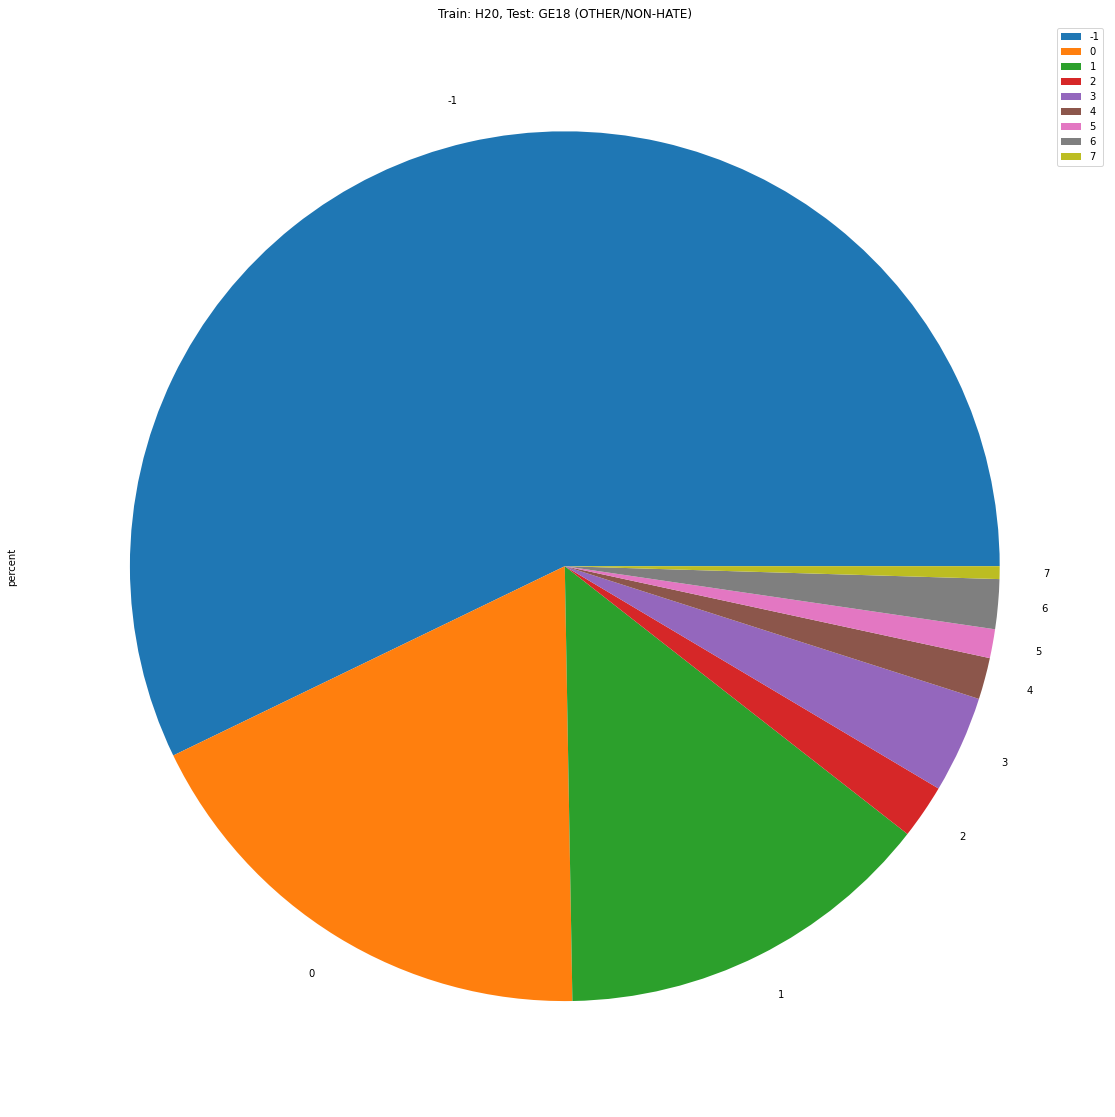

In [ ]:
plot = df_GE18_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: H20, Test: GE18 (OTHER/NON-HATE)')


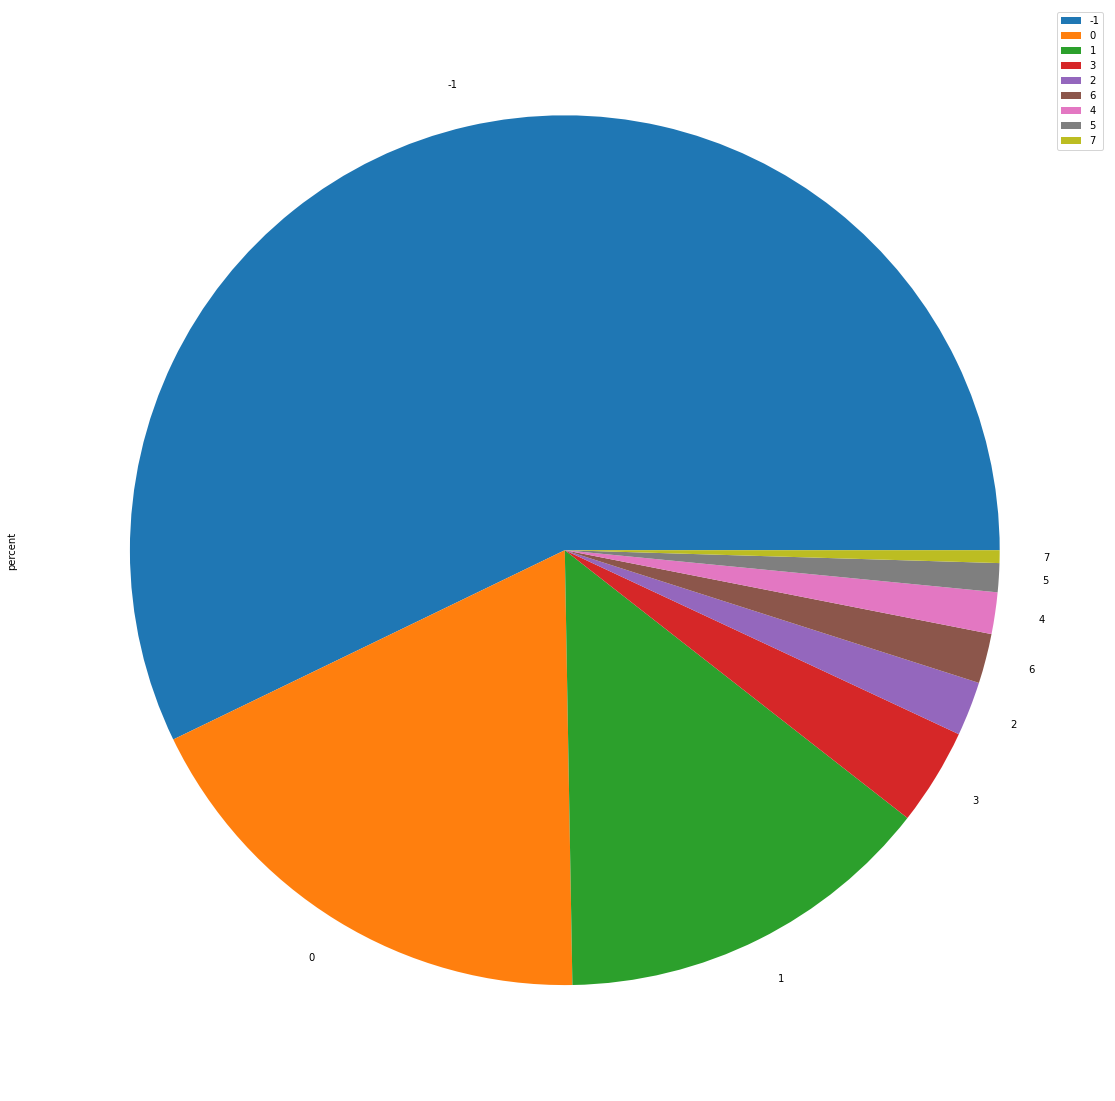

In [ ]:
plot = ge18_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### GE18_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OFFENSE'-Tweets


In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge18_test_offense = ge18_test_raw.loc[ge18_test_raw['OFF'] == 'OFFENSE']
ge18_test_offense


TWEET      OFF     CAT  pred
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE   ABUSE     1
9     @FeePatzer Frauen zu einem "Ja" zu überreden, ...  OFFENSE   ABUSE    -1
10    @IvyandWoe Ich weiß halt, wie man Frauen zum M...  OFFENSE   ABUSE    -1
11     Liebe Freunde, Gauck,das Symbol des Sklaventums!  OFFENSE   ABUSE    -1
13    wen interessiert denn die Meinung des Außenmin...  OFFENSE  INSULT    -1
...                                                 ...      ...     ...   ...
3521  @UdoUlfkotte Hauptsache den Asylanten gehts ge...  OFFENSE   ABUSE     1
3525  @ThomasMichael71 @mountainman1977 @houelle_bec...  OFFENSE   ABUSE     1
3526  @SteinbachErika Ich finde AFD Wähler besser al...  OFFENSE  INSULT     0
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE   ABUSE    -1
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE   ABUSE     0

[1202 rows x 4 columns]

In [ ]:
ge18_test_offense_pred_values = pd.DataFrame(ge18_test_offense['pred'].value_counts())
ge18_test_offense_pred_values['percent'] = (ge18_test_offense_pred_values['pred'] / ge18_test_offense_pred_values['pred'].sum()) * 100
ge18_test_offense_pred_values

pred    percent
-1   648  53.910150
 0   215  17.886855
 1   200  16.638935
 4    61   5.074875
 2    34   2.828619
 3    30   2.495840
 5    11   0.915141
 6     2   0.166389
 7     1   0.083195

In [ ]:
df1 =  train_h20_model_topics[['Topic','Name']]
ge18_test_offense_pred_values['Topic'] = ge18_test_offense_pred_values.index
df2 = ge18_test_offense_pred_values
data_frames = [df1, df2]
df_GE18_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE18_OFFENSE_merged['percent'] = df_GE18_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_GE18_OFFENSE_merged['pred'] = df_GE18_OFFENSE_merged['pred'].astype(int)
df_GE18_OFFENSE_merged


Topic                                     Name  pred    percent
0     -1                -1_arsch_scheiß_halt_pack   648  53.910150
1      0              0_porno_arsch_gratis_frauen   215  17.886855
2      1   1_deutsche_nazis_deutschland_deutschen   200  16.638935
3      2               2_grünen_grüne_grün_linken    34   2.828619
4      3        3_politiker_politik_brauchen_dumm    30   2.495840
5      4        4_islam_moslems_religion_kopftuch    61   5.074875
6      5  5_medien_journalisten_grünen_staatsfunk    11   0.915141
7      6            6_retweet_tweet_hashtag_magst     2   0.166389
8      7              7_bus_auto_wegfahren_blinkt     1   0.083195

In [ ]:
df_GE18_OFFENSE_sorted = df_GE18_OFFENSE_merged.sort_values('pred', ascending=False)
df_GE18_OFFENSE_sorted

Topic                                     Name  pred    percent
0     -1                -1_arsch_scheiß_halt_pack   648  53.910150
1      0              0_porno_arsch_gratis_frauen   215  17.886855
2      1   1_deutsche_nazis_deutschland_deutschen   200  16.638935
5      4        4_islam_moslems_religion_kopftuch    61   5.074875
3      2               2_grünen_grüne_grün_linken    34   2.828619
4      3        3_politiker_politik_brauchen_dumm    30   2.495840
6      5  5_medien_journalisten_grünen_staatsfunk    11   0.915141
7      6            6_retweet_tweet_hashtag_magst     2   0.166389
8      7              7_bus_auto_wegfahren_blinkt     1   0.083195

In [ ]:
df_GE18_OFFENSE_merged_plt = df_GE18_OFFENSE_merged.set_index('Topic')


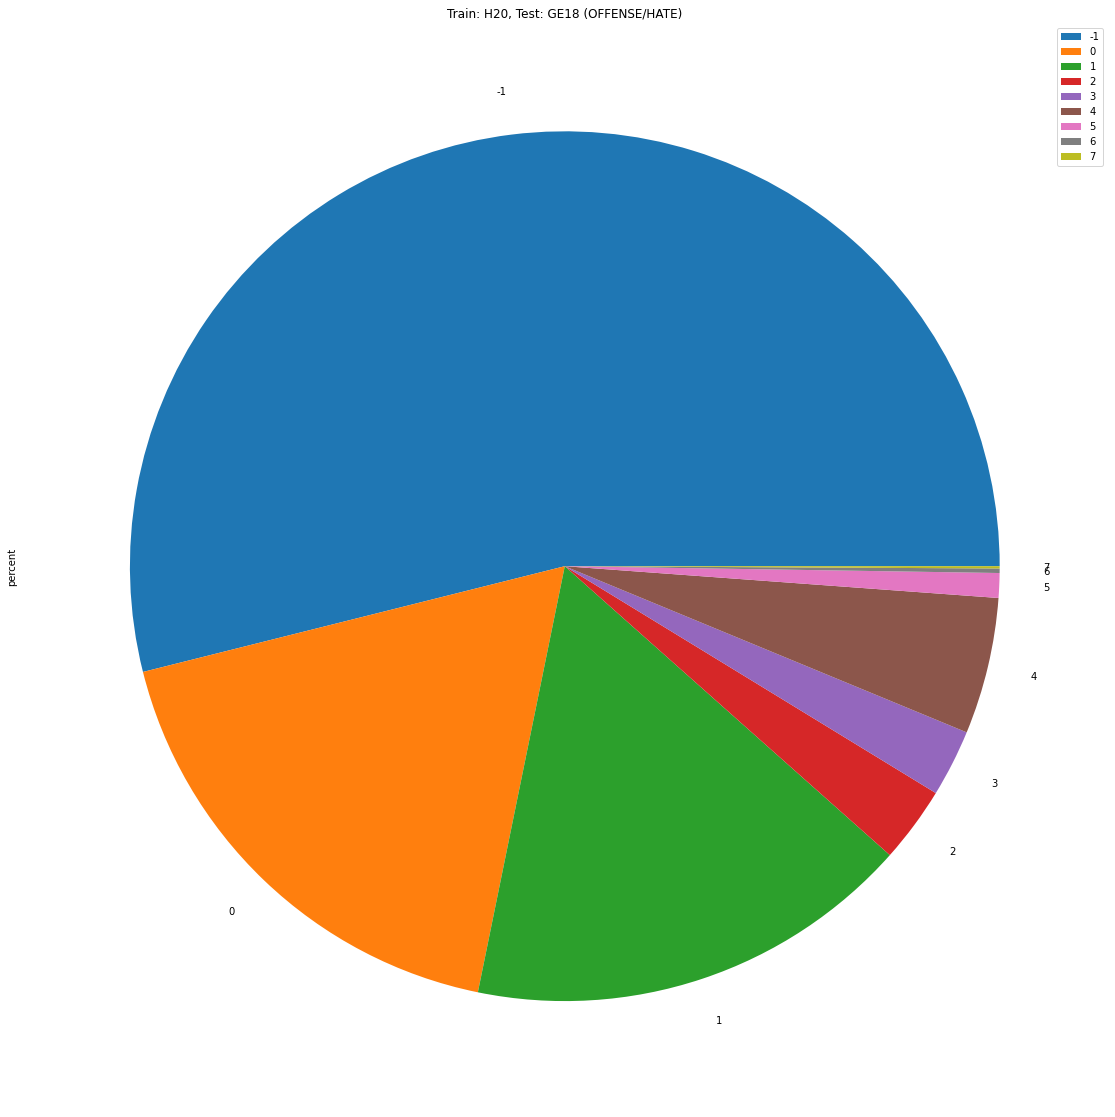

In [ ]:
plot = df_GE18_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: H20, Test: GE18 (OFFENSE/HATE)')


In [ ]:
#plot = ge18_test_offense_pred_values.plot.pie(y='percent', figsize=(20, 20))


### GE19_Test

In [ ]:
ge19_test_raw['pred'] = train_h20_pred_ge19[0]
ge19_test_raw

TWEET      OFF     CAT  pred
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE  INSULT    -1
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE   ABUSE    -1
2     @DLFNachrichten Die Gesichter, Namen, Religion...    OTHER   OTHER     4
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE   ABUSE    -1
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE    -1
...                                                 ...      ...     ...   ...
3026  Es fand aber nie eine Emanzipierungs-Phase der...    OTHER   OTHER     1
3027  Um es klar zu stellen: Ich will hier kein Whit...    OTHER   OTHER    -1
3028  Und dann habe ich da noch die McArthur-Briefe ...    OTHER   OTHER    -1
3029  al sehen wer der Ersatzmann wird. Hier könnte ...    OTHER   OTHER    -1
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...    OTHER   OTHER    -1

[3031 rows x 4 columns]

### GE19_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge19_test_other = ge19_test_raw.loc[ge19_test_raw['OFF'] == 'OTHER']
ge19_test_other


TWEET    OFF    CAT  pred
2     @DLFNachrichten Die Gesichter, Namen, Religion...  OTHER  OTHER     4
5     @aktuelle_stunde Also beim Fall Birmingham, En...  OTHER  OTHER    -1
6     @StZ_NEWS Aber bei läppischen 130.000 Euro der...  OTHER  OTHER     1
12    @BR24 Wie viele werden durch Gas Unfälle getöt...  OTHER  OTHER     7
25    @TAG24LE Wenn sich Linke Linke zu Feinden mach...  OTHER  OTHER    -1
...                                                 ...    ...    ...   ...
3026  Es fand aber nie eine Emanzipierungs-Phase der...  OTHER  OTHER     1
3027  Um es klar zu stellen: Ich will hier kein Whit...  OTHER  OTHER    -1
3028  Und dann habe ich da noch die McArthur-Briefe ...  OTHER  OTHER    -1
3029  al sehen wer der Ersatzmann wird. Hier könnte ...  OTHER  OTHER    -1
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...  OTHER  OTHER    -1

[2061 rows x 4 columns]

In [ ]:
ge19_test_other_pred_values = pd.DataFrame(ge19_test_other['pred'].value_counts())
ge19_test_other_pred_values['percent'] = (ge19_test_other_pred_values['pred'] / ge19_test_other_pred_values['pred'].sum()) * 100
ge19_test_other_pred_values

pred    percent
-1  1167  56.622999
 0   373  18.098011
 1   304  14.750121
 6    63   3.056769
 3    59   2.862688
 2    34   1.649685
 4    26   1.261524
 7    20   0.970403
 5    15   0.727802

In [ ]:
df1 =  train_h20_model_topics[['Topic','Name']]
ge19_test_other_pred_values['Topic'] = ge19_test_other_pred_values.index
df2 = ge19_test_other_pred_values
data_frames = [df1, df2]
df_GE19_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE19_OTHER_merged['percent'] = df_GE19_OTHER_merged['percent'].astype(float)

In [ ]:
df_GE19_OTHER_merged['pred'] = df_GE19_OTHER_merged['pred'].astype(int)

In [ ]:
df_GE19_OTHER_sorted = df_GE19_OTHER_merged.sort_values('pred', ascending=False)
df_GE19_OTHER_sorted

Topic                                     Name  pred    percent
0     -1                -1_arsch_scheiß_halt_pack  1167  56.622999
1      0              0_porno_arsch_gratis_frauen   373  18.098011
2      1   1_deutsche_nazis_deutschland_deutschen   304  14.750121
7      6            6_retweet_tweet_hashtag_magst    63   3.056769
4      3        3_politiker_politik_brauchen_dumm    59   2.862688
3      2               2_grünen_grüne_grün_linken    34   1.649685
5      4        4_islam_moslems_religion_kopftuch    26   1.261524
8      7              7_bus_auto_wegfahren_blinkt    20   0.970403
6      5  5_medien_journalisten_grünen_staatsfunk    15   0.727802

In [ ]:
df_GE19_OTHER_merged_plt = df_GE19_OTHER_merged.set_index('Topic')


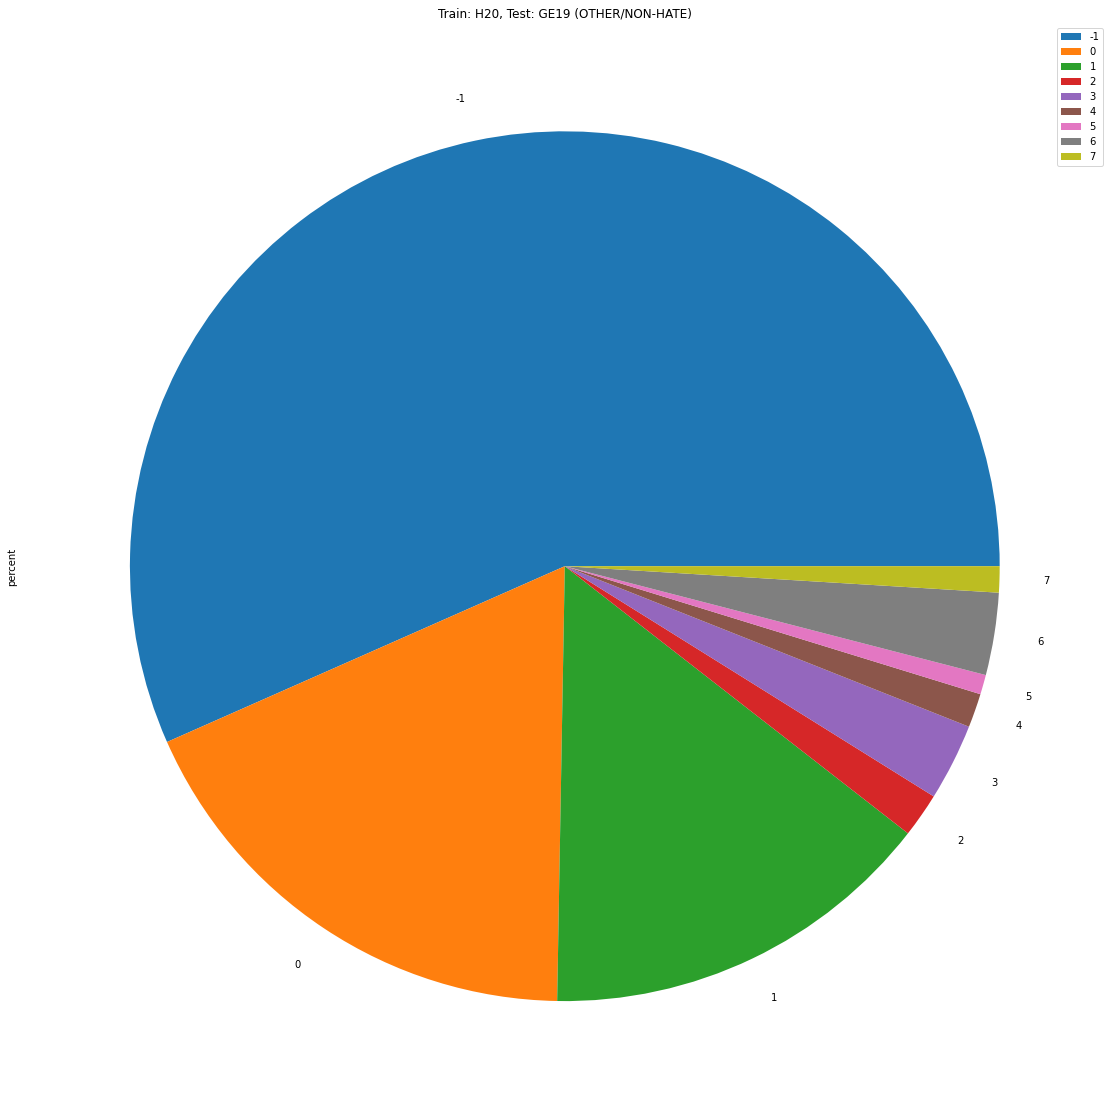

In [ ]:
plot = df_GE19_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: H20, Test: GE19 (OTHER/NON-HATE)')


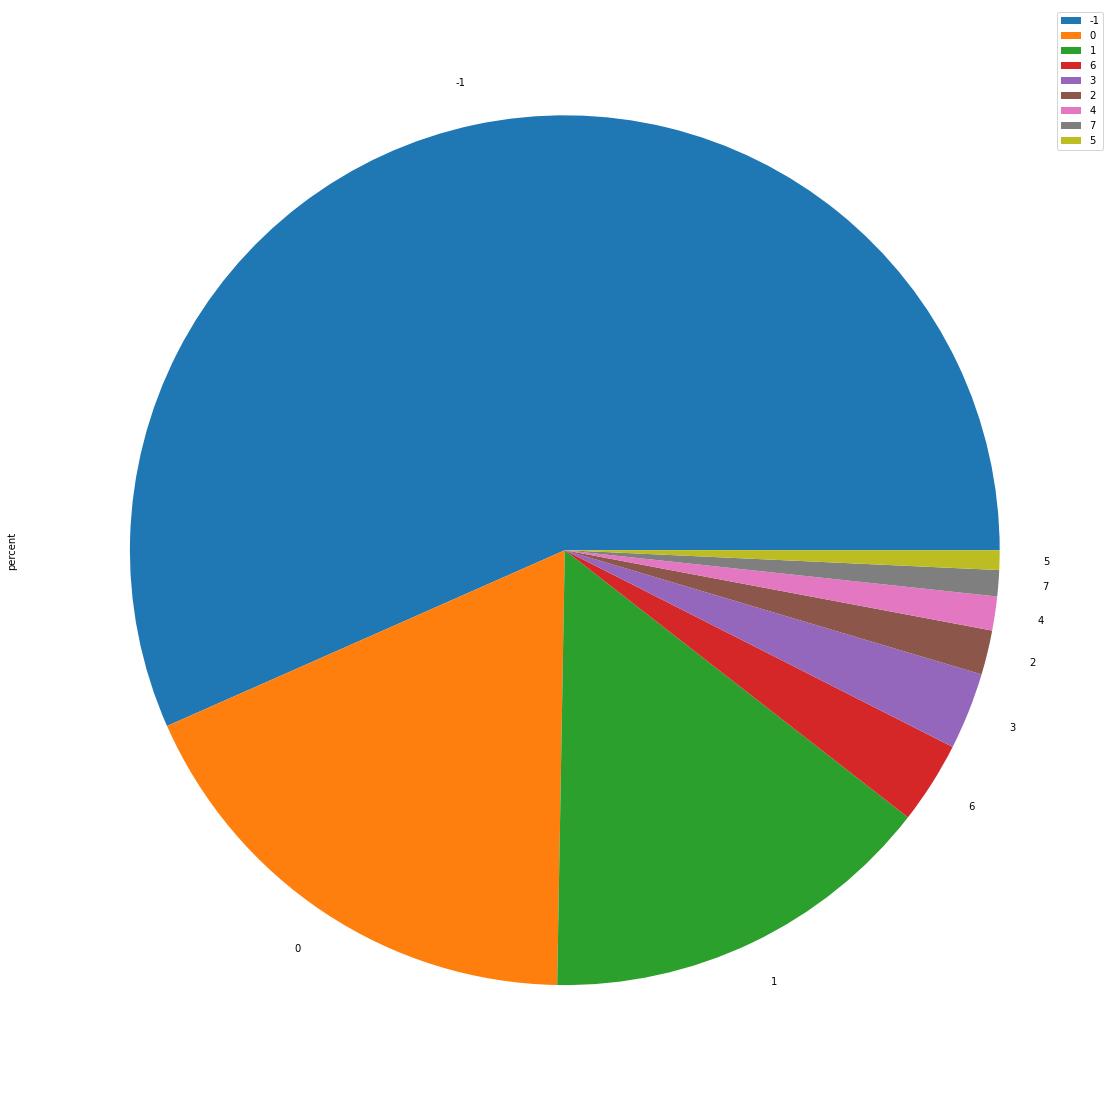

In [ ]:
plot = ge19_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### GE19_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OFFENSE'-Tweets


In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge19_test_offense = ge19_test_raw.loc[ge19_test_raw['OFF'] == 'OFFENSE']
ge19_test_offense


TWEET      OFF        CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE     INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE      ABUSE   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE      ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE      ABUSE   
7     @StZ_NEWS Schäuble wird wissen woher dieses Na...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
2889  Diese sogenannten Aktivisten sind Straftäter d...  OFFENSE      ABUSE   
2949    #Erdogan ist einfach eine Pest für die #Türkei.  OFFENSE     INSULT   
2976  @sixtus Irgend so ein charakterloser brauner M...  OFFENSE     INSULT   
2978  Das mag dem einen oder anderen harsch vorkomme...  OFFENSE     INSULT   
2988  Ich frage mich mittlerweile was Saudi Arabien ...  OFFENSE  PROFANITY   

      pred  
0       -1  
1       -1  
3       -1  
4       -1  
7        1  
...    ...  
2889    -1  
2949     1  
2976    -1  
2978     0  
2988     4  

[970 rows x 4 columns]

In [ ]:
ge19_test_offense_pred_values = pd.DataFrame(ge19_test_offense['pred'].value_counts())
ge19_test_offense_pred_values['percent'] = (ge19_test_offense_pred_values['pred'] / ge19_test_offense_pred_values['pred'].sum()) * 100
ge19_test_offense_pred_values

pred    percent
-1   525  54.123711
 1   200  20.618557
 0   138  14.226804
 3    31   3.195876
 4    24   2.474227
 5    18   1.855670
 2    18   1.855670
 6    14   1.443299
 7     2   0.206186

In [ ]:
df1 =  train_h20_model_topics[['Topic','Name']]
ge19_test_offense_pred_values['Topic'] = ge19_test_offense_pred_values.index
df2 = ge19_test_offense_pred_values
data_frames = [df1, df2]
df_GE19_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE19_OFFENSE_merged['percent'] = df_GE19_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_GE19_OFFENSE_merged['pred'] = df_GE19_OFFENSE_merged['pred'].astype(int)
df_GE19_OFFENSE_merged


Topic                                     Name  pred    percent
0     -1                -1_arsch_scheiß_halt_pack   525  54.123711
1      0              0_porno_arsch_gratis_frauen   138  14.226804
2      1   1_deutsche_nazis_deutschland_deutschen   200  20.618557
3      2               2_grünen_grüne_grün_linken    18   1.855670
4      3        3_politiker_politik_brauchen_dumm    31   3.195876
5      4        4_islam_moslems_religion_kopftuch    24   2.474227
6      5  5_medien_journalisten_grünen_staatsfunk    18   1.855670
7      6            6_retweet_tweet_hashtag_magst    14   1.443299
8      7              7_bus_auto_wegfahren_blinkt     2   0.206186

In [ ]:
df_GE19_OFFENSE_sorted = df_GE19_OFFENSE_merged.sort_values('pred', ascending=False)
df_GE19_OFFENSE_sorted

Topic                                     Name  pred    percent
0     -1                -1_arsch_scheiß_halt_pack   525  54.123711
2      1   1_deutsche_nazis_deutschland_deutschen   200  20.618557
1      0              0_porno_arsch_gratis_frauen   138  14.226804
4      3        3_politiker_politik_brauchen_dumm    31   3.195876
5      4        4_islam_moslems_religion_kopftuch    24   2.474227
3      2               2_grünen_grüne_grün_linken    18   1.855670
6      5  5_medien_journalisten_grünen_staatsfunk    18   1.855670
7      6            6_retweet_tweet_hashtag_magst    14   1.443299
8      7              7_bus_auto_wegfahren_blinkt     2   0.206186

In [ ]:
df_GE19_OFFENSE_merged_plt = df_GE19_OFFENSE_merged.set_index('Topic')


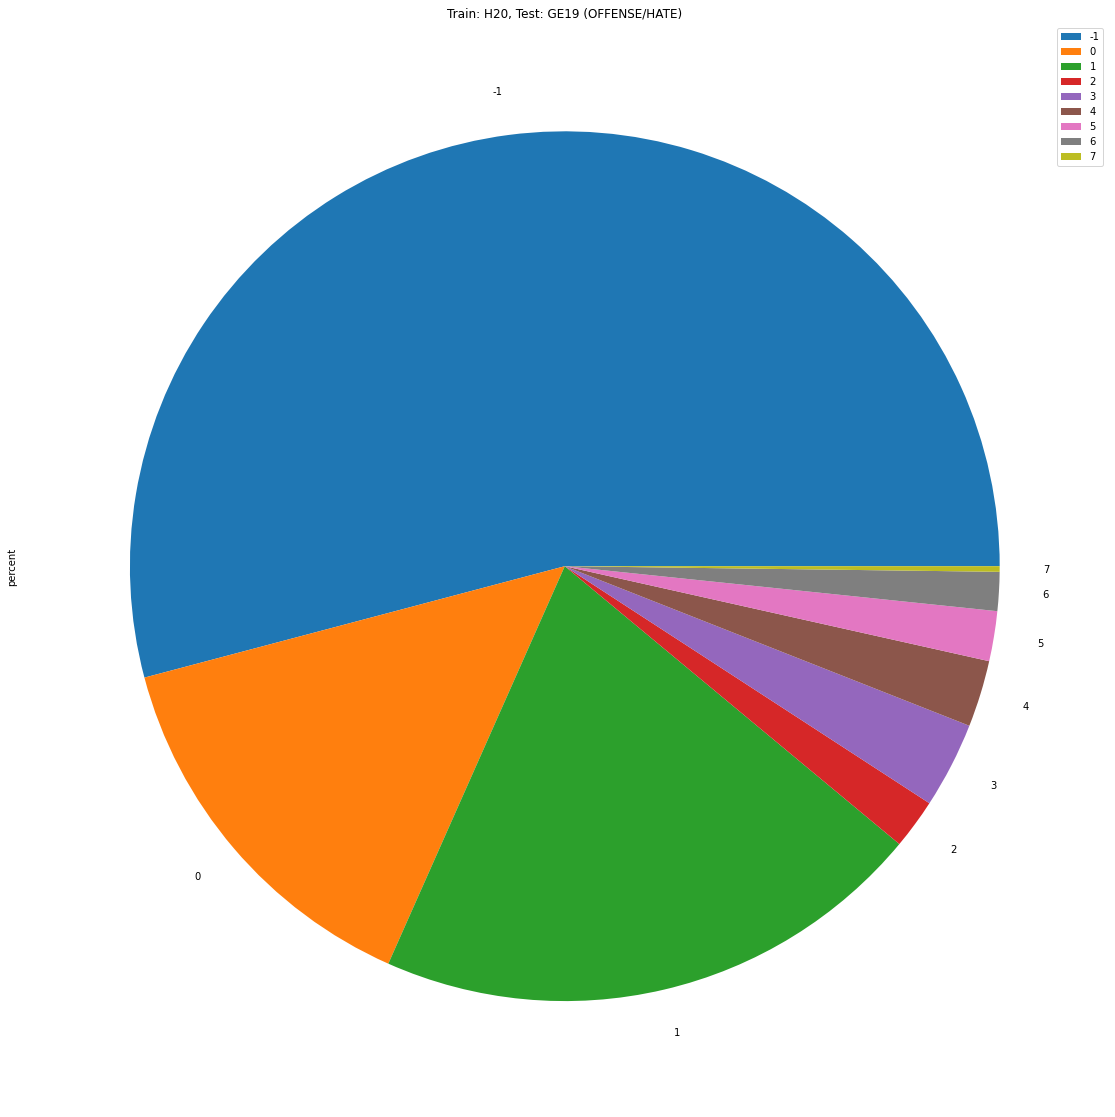

In [ ]:
plot = df_GE19_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: H20, Test: GE19 (OFFENSE/HATE)')


In [ ]:
#plot = ge19_test_offense_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H19_Test

In [ ]:
h19_test_raw['pred'] = train_h20_pred_h19[0]
h19_test_raw

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
..             ...                                                ...    ...   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  
0     HATE     2  
1     NONE     1  
2     NONE     0  
3     OFFN     3  
4     OFFN    -1  
..     ...   ...  
845   OFFN    -1  
846   OFFN     0  
847   OFFN     1  
848   OFFN    -1  
849   NONE     0  

[850 rows x 5 columns]

### H19_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h19_test_other = h19_test_raw.loc[h19_test_raw['task_1'] == 'NOT']
h19_test_other


text_id                                               text task_1  \
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
7    hasoc_de_5277  Und genau das macht er und lässt sich Scheiden...    NOT   
8    hasoc_de_5278  Dann wird das Konto gesperrt und Du musst wied...    NOT   
9    hasoc_de_5279         Dann bleib Single! https://t.co/TOP0spaU01    NOT   
..             ...                                                ...    ...   
837  hasoc_de_6107  @Uwe_Junge_MdL @Beatrix_vStorch  @lsvd  @Nicol...    NOT   
838  hasoc_de_6108  @Uwe_Junge_MdL Ihr streitet es zwar immer ab, ...    NOT   
839  hasoc_de_6109  @Uwe_Junge_MdL Oh die AFD als Vertreter der Ho...    NOT   
840  hasoc_de_6110                                   @Uwe_Junge_MdL 🤣    NOT   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  
1     NONE     1  
2     NONE     0  
7     NONE     0  
8     NONE     0  
9     NONE     0  
..     ...   ...  
837   NONE    -1  
838   NONE    -1  
839   NONE     0  
840   NONE     0  
849   NONE     0  

[714 rows x 5 columns]

In [ ]:
h19_test_other_pred_values = pd.DataFrame(h19_test_other['pred'].value_counts())
h19_test_other_pred_values['percent'] = (h19_test_other_pred_values['pred'] / h19_test_other_pred_values['pred'].sum()) * 100
h19_test_other_pred_values

pred    percent
-1   321  44.957983
 0   168  23.529412
 1   154  21.568627
 3    22   3.081232
 2    18   2.521008
 4    10   1.400560
 6     9   1.260504
 5     9   1.260504
 7     3   0.420168

In [ ]:
df1 =  train_h20_model_topics[['Topic','Name']]
h19_test_other_pred_values['Topic'] = h19_test_other_pred_values.index
df2 = h19_test_other_pred_values
data_frames = [df1, df2]
df_H19_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H19_OTHER_merged['percent'] = df_H19_OTHER_merged['percent'].astype(float)

In [ ]:
df_H19_OTHER_merged['pred'] = df_H19_OTHER_merged['pred'].astype(int)

In [ ]:
df_H19_OTHER_sorted = df_H19_OTHER_merged.sort_values('pred', ascending=False)
df_H19_OTHER_sorted

Topic                                     Name  pred    percent
0     -1                -1_arsch_scheiß_halt_pack   321  44.957983
1      0              0_porno_arsch_gratis_frauen   168  23.529412
2      1   1_deutsche_nazis_deutschland_deutschen   154  21.568627
4      3        3_politiker_politik_brauchen_dumm    22   3.081232
3      2               2_grünen_grüne_grün_linken    18   2.521008
5      4        4_islam_moslems_religion_kopftuch    10   1.400560
6      5  5_medien_journalisten_grünen_staatsfunk     9   1.260504
7      6            6_retweet_tweet_hashtag_magst     9   1.260504
8      7              7_bus_auto_wegfahren_blinkt     3   0.420168

In [ ]:
df_H19_OTHER_merged_plt = df_H19_OTHER_merged.set_index('Topic')


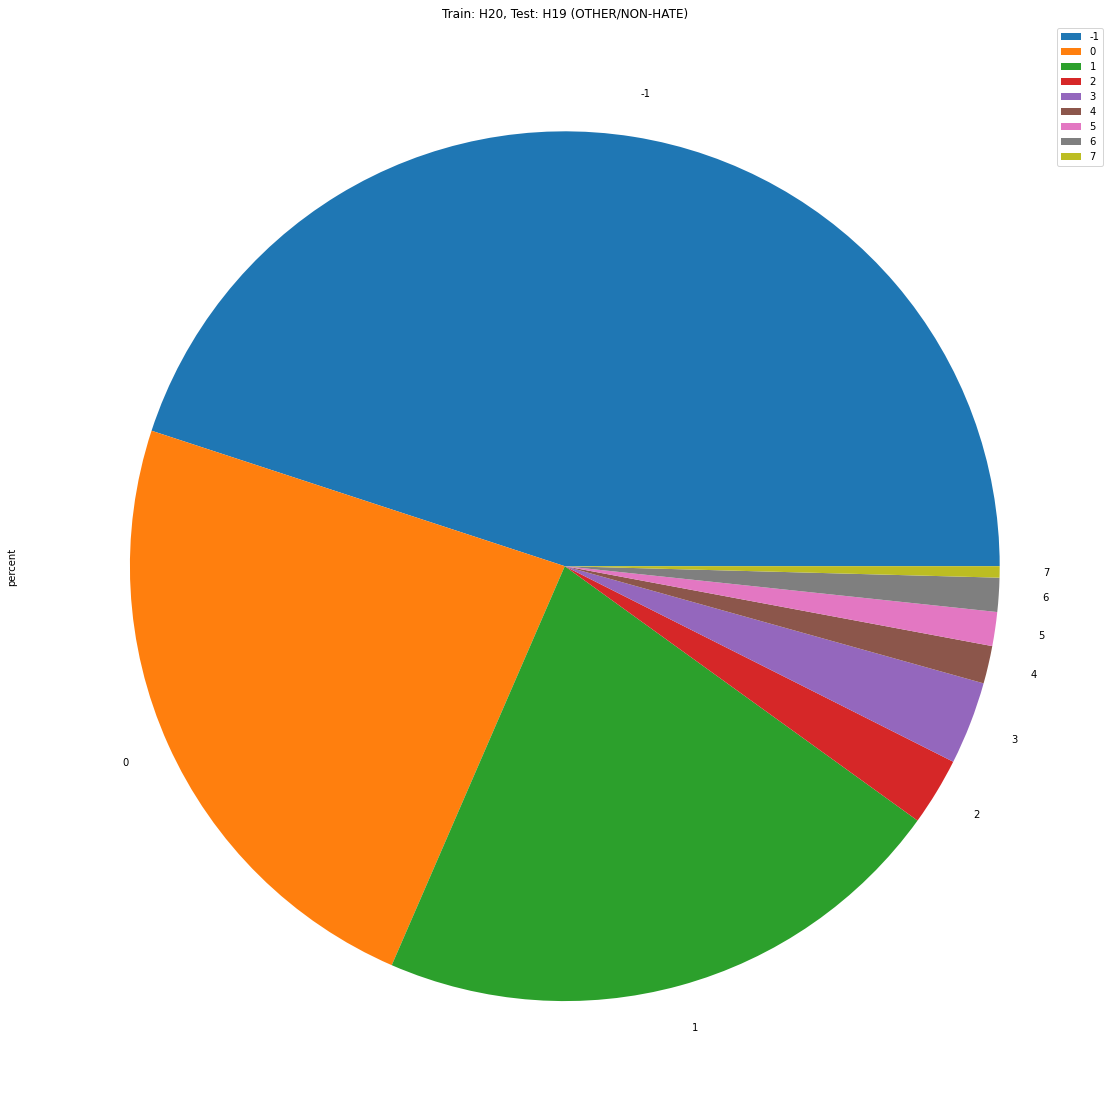

In [ ]:
plot = df_H19_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: H20, Test: H19 (OTHER/NON-HATE)')


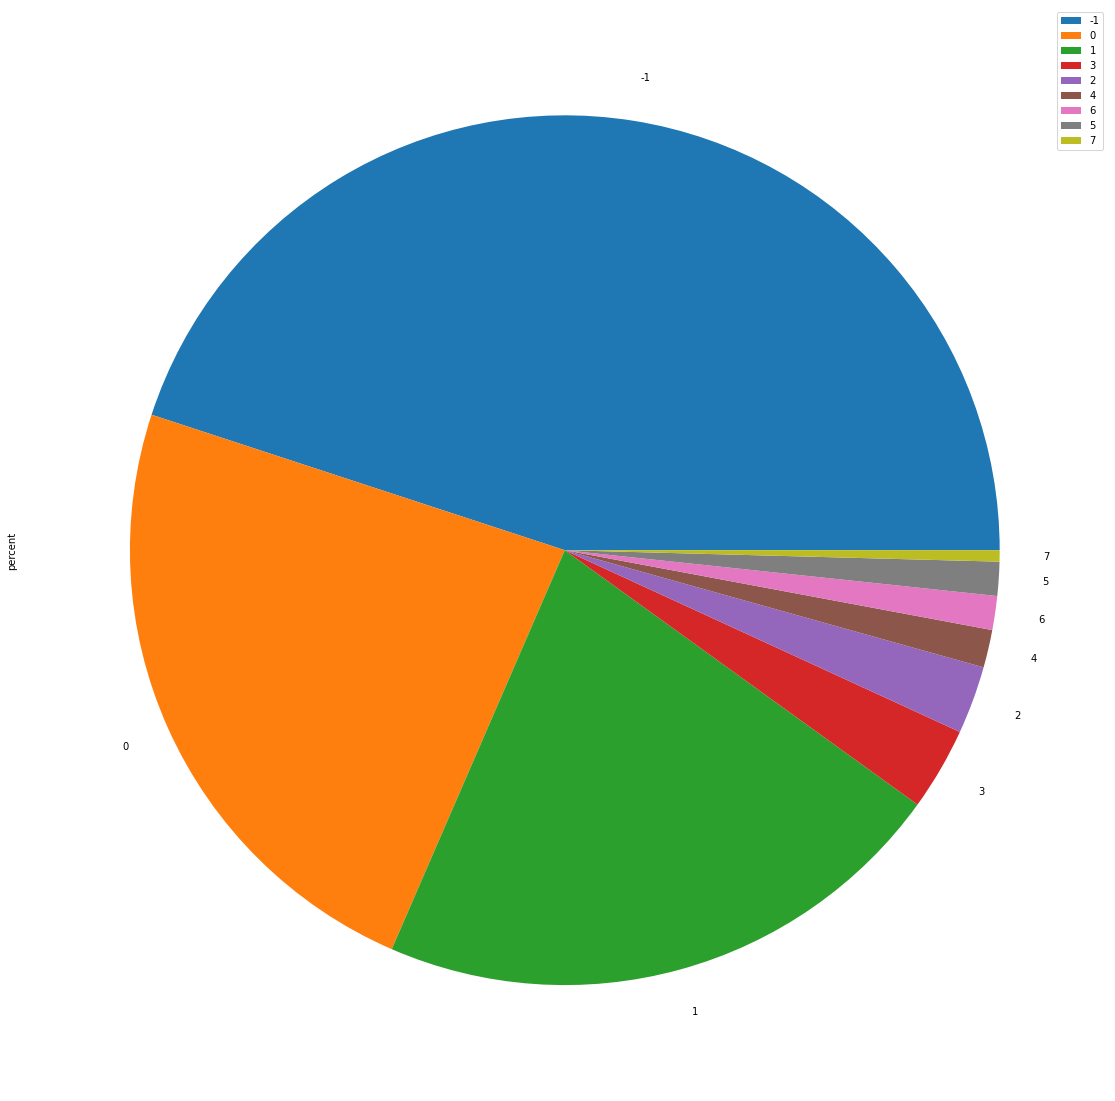

In [ ]:
plot = h19_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H19_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OFFENSE'-Tweets


In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h19_test_offense = h19_test_raw.loc[h19_test_raw['task_1'] == 'HOF']
h19_test_offense


text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
5    hasoc_de_5275  #Bundeswehr  erst überzeugen Politische Linke,...    HOF   
6    hasoc_de_5276  Du bist ein Rassist,Du erhöhst Dich über ander...    HOF   
..             ...                                                ...    ...   
844  hasoc_de_6114  Der/die/das große E ruft seine Mops wegen Unta...    HOF   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   

    task_2  pred  
0     HATE     2  
3     OFFN     3  
4     OFFN    -1  
5     HATE     3  
6     OFFN    -1  
..     ...   ...  
844   OFFN     0  
845   OFFN    -1  
846   OFFN     0  
847   OFFN     1  
848   OFFN    -1  

[136 rows x 5 columns]

In [ ]:
h19_test_offense_pred_values = pd.DataFrame(h19_test_offense['pred'].value_counts())
h19_test_offense_pred_values['percent'] = (h19_test_offense_pred_values['pred'] / h19_test_offense_pred_values['pred'].sum()) * 100
h19_test_offense_pred_values

pred    percent
-1    62  45.588235
 1    39  28.676471
 0    16  11.764706
 3     9   6.617647
 4     4   2.941176
 2     3   2.205882
 6     2   1.470588
 5     1   0.735294

In [ ]:
df1 =  train_h20_model_topics[['Topic','Name']]
h19_test_offense_pred_values['Topic'] = h19_test_offense_pred_values.index
df2 = h19_test_offense_pred_values
data_frames = [df1, df2]
df_H19_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H19_OFFENSE_merged['percent'] = df_H19_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_H19_OFFENSE_merged['pred'] = df_H19_OFFENSE_merged['pred'].astype(int)
df_H19_OFFENSE_merged


Topic                                     Name  pred    percent
0     -1                -1_arsch_scheiß_halt_pack    62  45.588235
1      0              0_porno_arsch_gratis_frauen    16  11.764706
2      1   1_deutsche_nazis_deutschland_deutschen    39  28.676471
3      2               2_grünen_grüne_grün_linken     3   2.205882
4      3        3_politiker_politik_brauchen_dumm     9   6.617647
5      4        4_islam_moslems_religion_kopftuch     4   2.941176
6      5  5_medien_journalisten_grünen_staatsfunk     1   0.735294
7      6            6_retweet_tweet_hashtag_magst     2   1.470588
8      7              7_bus_auto_wegfahren_blinkt     0   0.000000

In [ ]:
df_H19_OFFENSE_sorted = df_H19_OFFENSE_merged.sort_values('pred', ascending=False)
df_H19_OFFENSE_sorted

Topic                                     Name  pred    percent
0     -1                -1_arsch_scheiß_halt_pack    62  45.588235
2      1   1_deutsche_nazis_deutschland_deutschen    39  28.676471
1      0              0_porno_arsch_gratis_frauen    16  11.764706
4      3        3_politiker_politik_brauchen_dumm     9   6.617647
5      4        4_islam_moslems_religion_kopftuch     4   2.941176
3      2               2_grünen_grüne_grün_linken     3   2.205882
7      6            6_retweet_tweet_hashtag_magst     2   1.470588
6      5  5_medien_journalisten_grünen_staatsfunk     1   0.735294
8      7              7_bus_auto_wegfahren_blinkt     0   0.000000

In [ ]:
df_H19_OFFENSE_merged_plt = df_H19_OFFENSE_merged.set_index('Topic')


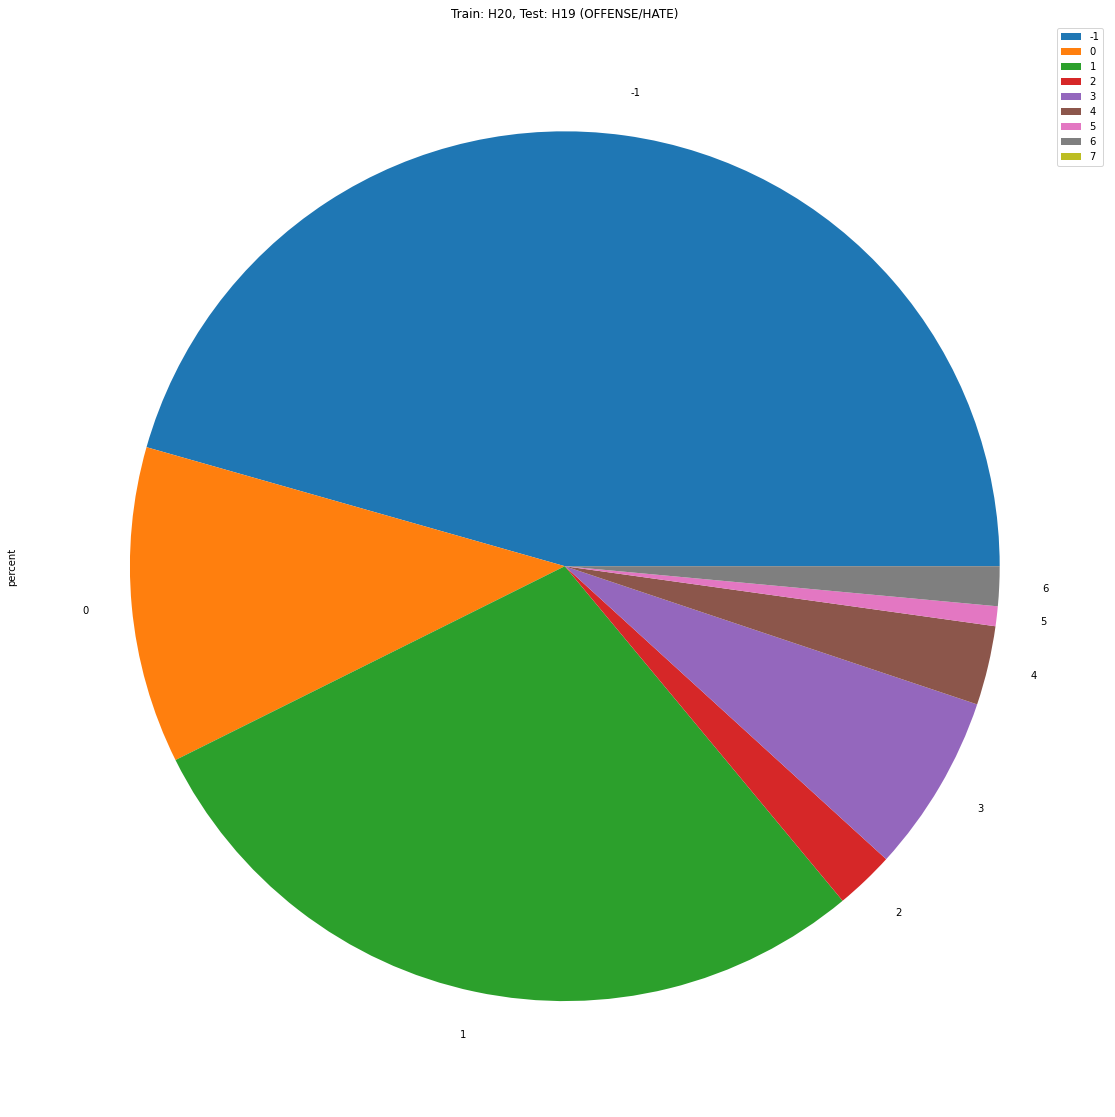

In [ ]:
plot = df_H19_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: H20, Test: H19 (OFFENSE/HATE)')


In [ ]:
#plot = h19_test_offense_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H20_Test

In [ ]:
h20_test_raw['pred'] = train_h20_pred_h20[0]
h20_test_raw

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  
0    hasoc_2020_de_1053    -1  
1     hasoc_2020_de_671     0  
2    hasoc_2020_de_2977    -1  
3    hasoc_2020_de_1746    -1  
4    hasoc_2020_de_2416    -1  
..                  ...   ...  
521   hasoc_2020_de_486     0  
522  hasoc_2020_de_3388     2  
523  hasoc_2020_de_2745     1  
524   hasoc_2020_de_236     0  
525  hasoc_2020_de_2850     2  

[526 rows x 7 columns]

### H20_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h20_test_other = h20_test_raw.loc[h20_test_raw['task1'] == 'NOT']
h20_test_other


Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  
0    hasoc_2020_de_1053    -1  
1     hasoc_2020_de_671     0  
2    hasoc_2020_de_2977    -1  
3    hasoc_2020_de_1746    -1  
4    hasoc_2020_de_2416    -1  
..                  ...   ...  
521   hasoc_2020_de_486     0  
522  hasoc_2020_de_3388     2  
523  hasoc_2020_de_2745     1  
524   hasoc_2020_de_236     0  
525  hasoc_2020_de_2850     2  

[365 rows x 7 columns]

In [ ]:
h20_test_other_pred_values = pd.DataFrame(h20_test_other['pred'].value_counts())
h20_test_other_pred_values['percent'] = (h20_test_other_pred_values['pred'] / h20_test_other_pred_values['pred'].sum()) * 100
h20_test_other_pred_values

pred    percent
-1   137  37.534247
 0   104  28.493151
 1    77  21.095890
 2    28   7.671233
 4    12   3.287671
 3     5   1.369863
 5     2   0.547945

In [ ]:
df1 =  train_h20_model_topics[['Topic','Name']]
h20_test_other_pred_values['Topic'] = h20_test_other_pred_values.index
df2 = h20_test_other_pred_values
data_frames = [df1, df2]
df_H20_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H20_OTHER_merged['percent'] = df_H20_OTHER_merged['percent'].astype(float)

In [ ]:
df_H20_OTHER_merged['pred'] = df_H20_OTHER_merged['pred'].astype(int)

In [ ]:
df_H20_OTHER_sorted = df_H20_OTHER_merged.sort_values('pred', ascending=False)
df_H20_OTHER_sorted

Topic                                     Name  pred    percent
0     -1                -1_arsch_scheiß_halt_pack   137  37.534247
1      0              0_porno_arsch_gratis_frauen   104  28.493151
2      1   1_deutsche_nazis_deutschland_deutschen    77  21.095890
3      2               2_grünen_grüne_grün_linken    28   7.671233
5      4        4_islam_moslems_religion_kopftuch    12   3.287671
4      3        3_politiker_politik_brauchen_dumm     5   1.369863
6      5  5_medien_journalisten_grünen_staatsfunk     2   0.547945
7      6            6_retweet_tweet_hashtag_magst     0   0.000000
8      7              7_bus_auto_wegfahren_blinkt     0   0.000000

In [ ]:
df_H20_OTHER_merged_plt = df_H20_OTHER_merged.set_index('Topic')


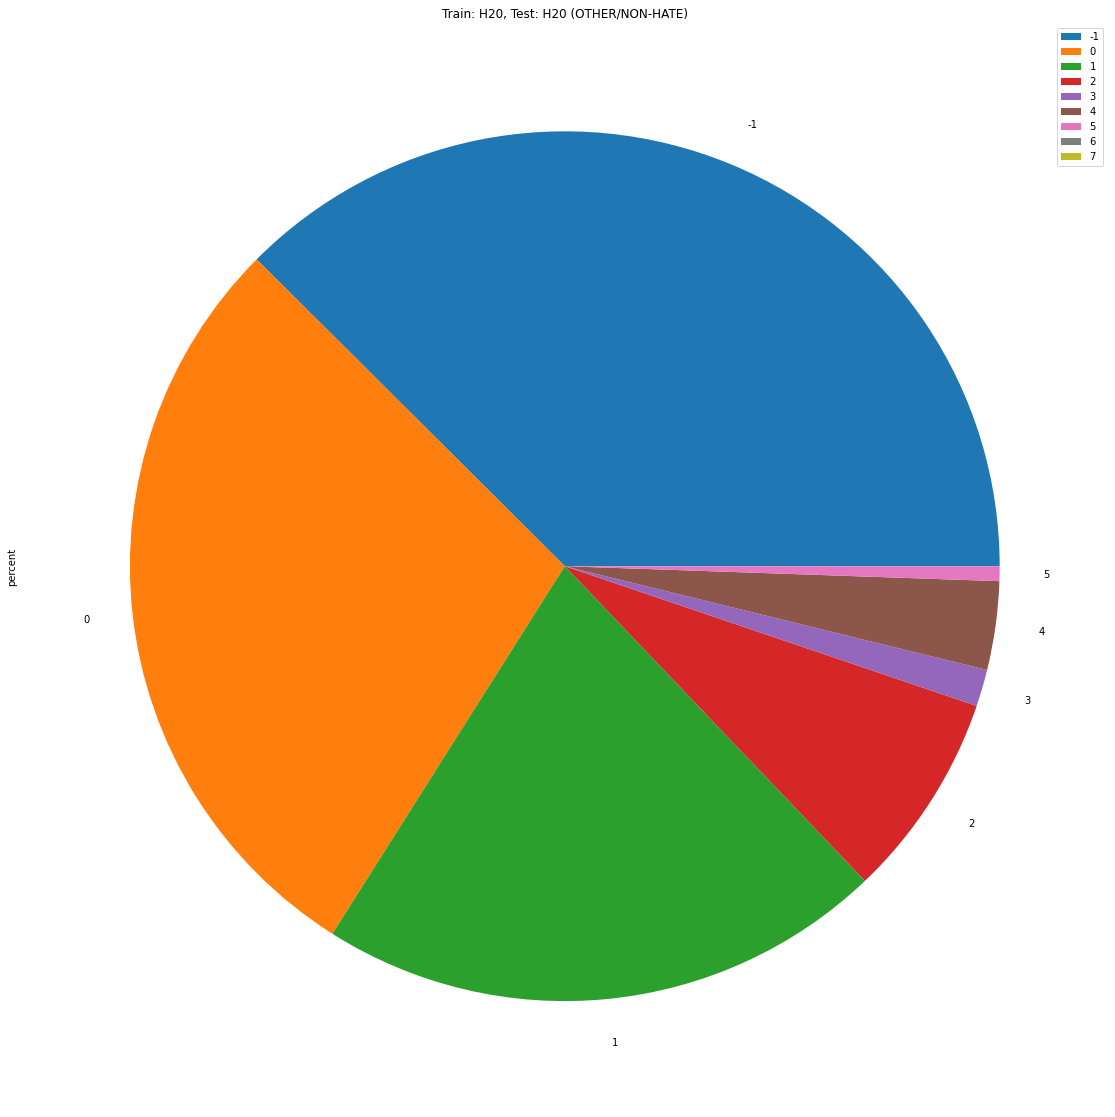

In [ ]:
plot = df_H20_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: H20, Test: H20 (OTHER/NON-HATE)')


In [ ]:
#plot = h20_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H20_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h20_test_offense = h20_test_raw.loc[h20_test_raw['task1'] == 'HOF']
h20_test_offense


Unnamed: 0             tweet_id  \
5             5  1129712298531184641   
6             6  1123981478361219073   
17           17  1126089577486323712   
21           21  1134130242786926592   
22           22  1134444350027509766   
..          ...                  ...   
500         500  1128321203075256320   
508         508  1129379774076473344   
511         511  1130096161212252162   
512         512  1124842568972288000   
517         517  1124379312264708101   

                                                  text task1 task2  \
5    RT @VonSchwer: Ein guter Patriot geht von Bord...   HOF  OFFN   
6    @yooli_derechte @MontanaBlack Mich wundert es ...   HOF  OFFN   
17   RT @CWBWElias: @TheresaGesperrt Wollte meine N...   HOF  PRFN   
21   @sgepeeti Verdursten ist aber auch ein scheiß ...   HOF  PRFN   
22                 Scheiß. Hurensohn gam @FortniteGame   HOF  PRFN   
..                                                 ...   ...   ...   
500                         @VizzionsXI halt dein maul   HOF  OFFN   
508                       Halt die fresse du hurensohn   HOF  PRFN   
511         @noelmgb_ @Sebbe2704 Richtiger Hurensohn 😂   HOF  PRFN   
512  Der Bass ist tief, die Atmosphäre sehr entspan...   HOF  PRFN   
517  RT @theunwantedpath: HABT IHR DEN ARSCH OFFEN ...   HOF  PRFN   

                     ID  pred  
5    hasoc_2020_de_1112    -1  
6    hasoc_2020_de_2938    -1  
17   hasoc_2020_de_2545    -1  
21   hasoc_2020_de_1235     0  
22   hasoc_2020_de_2487     0  
..                  ...   ...  
500  hasoc_2020_de_1958     0  
508  hasoc_2020_de_2465     0  
511   hasoc_2020_de_958     0  
512  hasoc_2020_de_2470    -1  
517   hasoc_2020_de_986    -1  

[161 rows x 7 columns]

In [ ]:
h20_test_offense_pred_values = pd.DataFrame(h20_test_offense['pred'].value_counts())
h20_test_offense_pred_values['percent'] = (h20_test_offense_pred_values['pred'] / h20_test_offense_pred_values['pred'].sum()) * 100
h20_test_offense_pred_values

pred    percent
 0    72  44.720497
-1    64  39.751553
 1    11   6.832298
 2     7   4.347826
 3     4   2.484472
 4     2   1.242236
 6     1   0.621118

In [ ]:
df1 =  train_h20_model_topics[['Topic','Name']]
h20_test_offense_pred_values['Topic'] = h20_test_offense_pred_values.index
df2 = h20_test_offense_pred_values
data_frames = [df1, df2]
df_H20_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H20_OFFENSE_merged['percent'] = df_H20_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_H20_OFFENSE_merged['pred'] = df_H20_OFFENSE_merged['pred'].astype(int)
df_H20_OFFENSE_merged


Topic                                     Name  pred    percent
0     -1                -1_arsch_scheiß_halt_pack    64  39.751553
1      0              0_porno_arsch_gratis_frauen    72  44.720497
2      1   1_deutsche_nazis_deutschland_deutschen    11   6.832298
3      2               2_grünen_grüne_grün_linken     7   4.347826
4      3        3_politiker_politik_brauchen_dumm     4   2.484472
5      4        4_islam_moslems_religion_kopftuch     2   1.242236
6      5  5_medien_journalisten_grünen_staatsfunk     0   0.000000
7      6            6_retweet_tweet_hashtag_magst     1   0.621118
8      7              7_bus_auto_wegfahren_blinkt     0   0.000000

In [ ]:
df_H20_OFFENSE_sorted = df_H20_OFFENSE_merged.sort_values('pred', ascending=False)
df_H20_OFFENSE_sorted

Topic                                     Name  pred    percent
1      0              0_porno_arsch_gratis_frauen    72  44.720497
0     -1                -1_arsch_scheiß_halt_pack    64  39.751553
2      1   1_deutsche_nazis_deutschland_deutschen    11   6.832298
3      2               2_grünen_grüne_grün_linken     7   4.347826
4      3        3_politiker_politik_brauchen_dumm     4   2.484472
5      4        4_islam_moslems_religion_kopftuch     2   1.242236
7      6            6_retweet_tweet_hashtag_magst     1   0.621118
6      5  5_medien_journalisten_grünen_staatsfunk     0   0.000000
8      7              7_bus_auto_wegfahren_blinkt     0   0.000000

In [ ]:
df_H20_OFFENSE_merged_plt = df_H20_OFFENSE_merged.set_index('Topic')


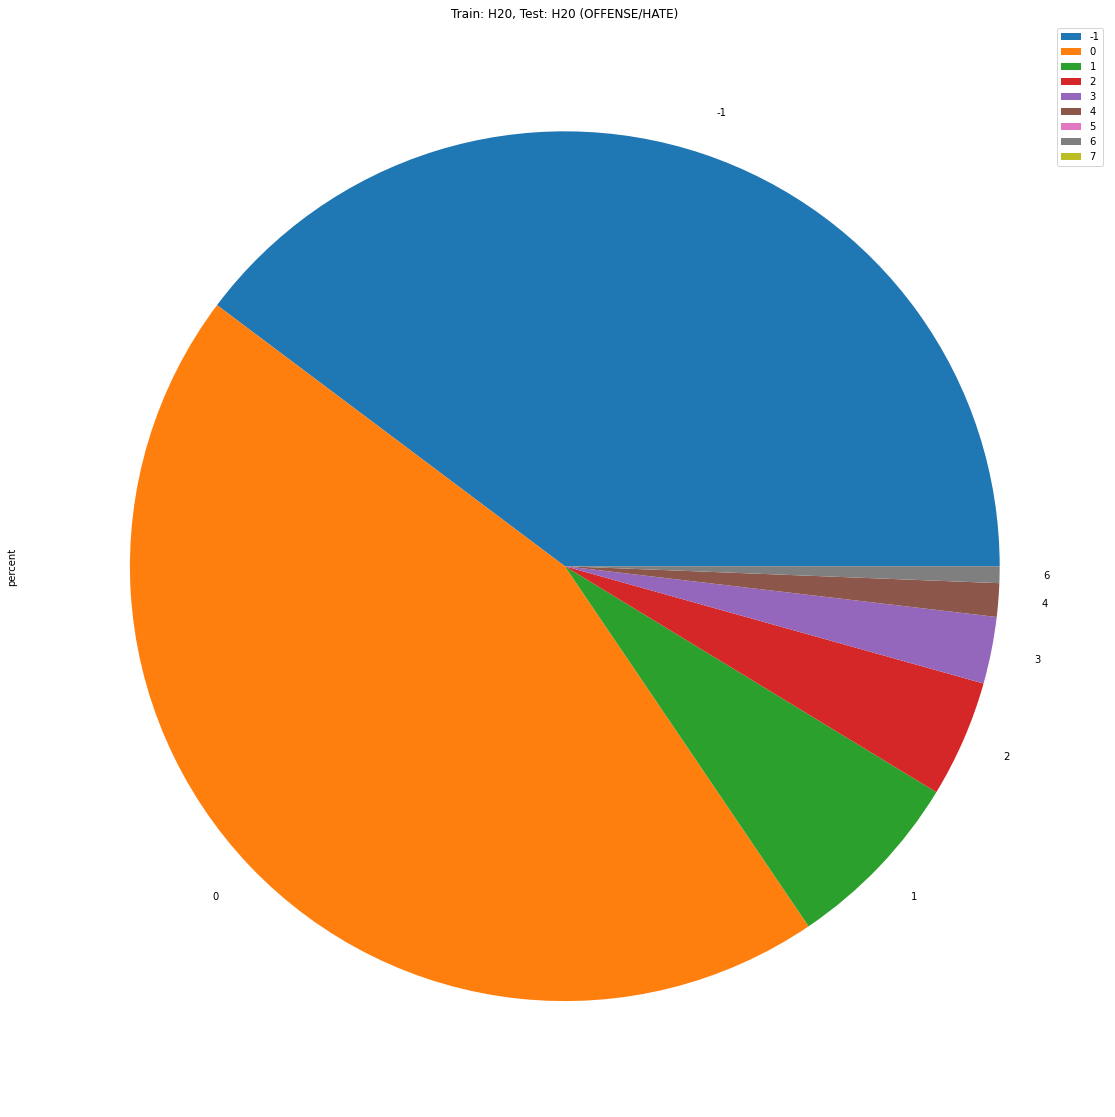

In [ ]:
plot = df_H20_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: H20, Test: H20 (OFFENSE/HATE)')


### Index richtig setzen: Kategorie OTHER bzw. NOT

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h20_model_topics[['Topic','Name']]
df1

Topic                                     Name
0     -1                -1_arsch_scheiß_halt_pack
1      0              0_porno_arsch_gratis_frauen
2      1   1_deutsche_nazis_deutschland_deutschen
3      2               2_grünen_grüne_grün_linken
4      3        3_politiker_politik_brauchen_dumm
5      4        4_islam_moslems_religion_kopftuch
6      5  5_medien_journalisten_grünen_staatsfunk
7      6            6_retweet_tweet_hashtag_magst
8      7              7_bus_auto_wegfahren_blinkt

In [ ]:
ge18_test_other_pred_values['Topic'] = ge18_test_other_pred_values.index
ge18_test_other_pred_values

pred    percent  Topic
-1  1332  57.167382     -1
 0   422  18.111588      0
 1   330  14.163090      1
 3    84   3.605150      3
 2    47   2.017167      2
 6    43   1.845494      6
 4    36   1.545064      4
 5    25   1.072961      5
 7    11   0.472103      7

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_other_pred_values 
df2 = df2.rename(columns={'pred':'predGE18', 'percent':'%GE18', 'Topic':'Topic'})

In [ ]:
ge19_test_other_pred_values['Topic'] = ge19_test_other_pred_values.index
ge19_test_other_pred_values

pred    percent  Topic
-1  1167  56.622999     -1
 0   373  18.098011      0
 1   304  14.750121      1
 6    63   3.056769      6
 3    59   2.862688      3
 2    34   1.649685      2
 4    26   1.261524      4
 7    20   0.970403      7
 5    15   0.727802      5

In [ ]:
df3 = ge19_test_other_pred_values
df3 = df3.rename(columns={'pred':'predGE19', 'percent':'%GE19', 'Topic':'Topic'})

In [ ]:
h19_test_other_pred_values['Topic'] = h19_test_other_pred_values.index
h19_test_other_pred_values

pred    percent  Topic
-1   321  44.957983     -1
 0   168  23.529412      0
 1   154  21.568627      1
 3    22   3.081232      3
 2    18   2.521008      2
 4    10   1.400560      4
 6     9   1.260504      6
 5     9   1.260504      5
 7     3   0.420168      7

In [ ]:
df4 = h19_test_other_pred_values
df4 = df4.rename(columns={'pred':'predH19', 'percent':'%H19', 'Topic':'Topic'})

In [ ]:
h20_test_other_pred_values['Topic'] = h20_test_other_pred_values.index
h20_test_other_pred_values

pred    percent  Topic
-1   137  37.534247     -1
 0   104  28.493151      0
 1    77  21.095890      1
 2    28   7.671233      2
 4    12   3.287671      4
 3     5   1.369863      3
 5     2   0.547945      5

In [ ]:
df5 = h20_test_other_pred_values
df5 = df5.rename(columns={'pred':'predH20', 'percent':'%H20', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']] = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']].astype(float).round(2)
df_OTHER_merged
#df_to_round = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE18', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                     Name  predGE18  %GE18  predGE19  \
0     -1                -1_arsch_scheiß_halt_pack      1332  57.17      1167   
1      0              0_porno_arsch_gratis_frauen       422  18.11       373   
2      1   1_deutsche_nazis_deutschland_deutschen       330  14.16       304   
3      2               2_grünen_grüne_grün_linken        47   2.02        34   
4      3        3_politiker_politik_brauchen_dumm        84   3.61        59   
5      4        4_islam_moslems_religion_kopftuch        36   1.55        26   
6      5  5_medien_journalisten_grünen_staatsfunk        25   1.07        15   
7      6            6_retweet_tweet_hashtag_magst        43   1.85        63   
8      7              7_bus_auto_wegfahren_blinkt        11   0.47        20   

   %GE19  predH19   %H19 predH20   %H20  
0  56.62      321  44.96   137.0  37.53  
1  18.10      168  23.53   104.0  28.49  
2  14.75      154  21.57    77.0  21.10  
3   1.65       18   2.52    28.0   7.67  
4   2.86       22   3.08     5.0   1.37  
5   1.26       10   1.40    12.0   3.29  
6   0.73        9   1.26     2.0   0.55  
7   3.06        9   1.26       0   0.00  
8   0.97        3   0.42       0   0.00

In [ ]:
df_OTHER_merged

Topic                                     Name  predGE18  %GE18  predGE19  \
0     -1                -1_arsch_scheiß_halt_pack      1332  57.17      1167   
1      0              0_porno_arsch_gratis_frauen       422  18.11       373   
2      1   1_deutsche_nazis_deutschland_deutschen       330  14.16       304   
3      2               2_grünen_grüne_grün_linken        47   2.02        34   
4      3        3_politiker_politik_brauchen_dumm        84   3.61        59   
5      4        4_islam_moslems_religion_kopftuch        36   1.55        26   
6      5  5_medien_journalisten_grünen_staatsfunk        25   1.07        15   
7      6            6_retweet_tweet_hashtag_magst        43   1.85        63   
8      7              7_bus_auto_wegfahren_blinkt        11   0.47        20   

   %GE19  predH19   %H19 predH20   %H20  
0  56.62      321  44.96   137.0  37.53  
1  18.10      168  23.53   104.0  28.49  
2  14.75      154  21.57    77.0  21.10  
3   1.65       18   2.52    28.0   7.67  
4   2.86       22   3.08     5.0   1.37  
5   1.26       10   1.40    12.0   3.29  
6   0.73        9   1.26     2.0   0.55  
7   3.06        9   1.26       0   0.00  
8   0.97        3   0.42       0   0.00

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_OTHER_merged = df_OTHER_merged.astype({"predGE18": int, "predGE19":int, "predH19":int, "predH20":int})
df_OTHER_merged

Topic                                     Name  predGE18  %GE18  predGE19  \
0     -1                -1_arsch_scheiß_halt_pack      1332  57.17      1167   
1      0              0_porno_arsch_gratis_frauen       422  18.11       373   
2      1   1_deutsche_nazis_deutschland_deutschen       330  14.16       304   
3      2               2_grünen_grüne_grün_linken        47   2.02        34   
4      3        3_politiker_politik_brauchen_dumm        84   3.61        59   
5      4        4_islam_moslems_religion_kopftuch        36   1.55        26   
6      5  5_medien_journalisten_grünen_staatsfunk        25   1.07        15   
7      6            6_retweet_tweet_hashtag_magst        43   1.85        63   
8      7              7_bus_auto_wegfahren_blinkt        11   0.47        20   

   %GE19  predH19   %H19  predH20   %H20  
0  56.62      321  44.96      137  37.53  
1  18.10      168  23.53      104  28.49  
2  14.75      154  21.57       77  21.10  
3   1.65       18   2.52       28   7.67  
4   2.86       22   3.08        5   1.37  
5   1.26       10   1.40       12   3.29  
6   0.73        9   1.26        2   0.55  
7   3.06        9   1.26        0   0.00  
8   0.97        3   0.42        0   0.00

In [ ]:
df_OTHER_percent = df_OTHER_merged[['Topic','%GE18','%GE19','%H19','%H20','Name']]
df_OTHER_percent

Topic  %GE18  %GE19   %H19   %H20                                     Name
0     -1  57.17  56.62  44.96  37.53                -1_arsch_scheiß_halt_pack
1      0  18.11  18.10  23.53  28.49              0_porno_arsch_gratis_frauen
2      1  14.16  14.75  21.57  21.10   1_deutsche_nazis_deutschland_deutschen
3      2   2.02   1.65   2.52   7.67               2_grünen_grüne_grün_linken
4      3   3.61   2.86   3.08   1.37        3_politiker_politik_brauchen_dumm
5      4   1.55   1.26   1.40   3.29        4_islam_moslems_religion_kopftuch
6      5   1.07   0.73   1.26   0.55  5_medien_journalisten_grünen_staatsfunk
7      6   1.85   3.06   1.26   0.00            6_retweet_tweet_hashtag_magst
8      7   0.47   0.97   0.42   0.00              7_bus_auto_wegfahren_blinkt

### Index richtig setzen: Kategorie HATE bzw. OFFENSE

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h20_model_topics[['Topic','Name']]
df1

Topic                                     Name
0     -1                -1_arsch_scheiß_halt_pack
1      0              0_porno_arsch_gratis_frauen
2      1   1_deutsche_nazis_deutschland_deutschen
3      2               2_grünen_grüne_grün_linken
4      3        3_politiker_politik_brauchen_dumm
5      4        4_islam_moslems_religion_kopftuch
6      5  5_medien_journalisten_grünen_staatsfunk
7      6            6_retweet_tweet_hashtag_magst
8      7              7_bus_auto_wegfahren_blinkt

In [ ]:
ge18_test_offense_pred_values['Topic'] = ge18_test_offense_pred_values.index
ge18_test_offense_pred_values

pred    percent  Topic
-1   648  53.910150     -1
 0   215  17.886855      0
 1   200  16.638935      1
 4    61   5.074875      4
 2    34   2.828619      2
 3    30   2.495840      3
 5    11   0.915141      5
 6     2   0.166389      6
 7     1   0.083195      7

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_offense_pred_values 
df2 = df2.rename(columns={'pred':'predGE18', 'percent':'%GE18', 'Topic':'Topic'})

In [ ]:
ge19_test_offense_pred_values['Topic'] = ge19_test_offense_pred_values.index
ge19_test_offense_pred_values

pred    percent  Topic
-1   525  54.123711     -1
 1   200  20.618557      1
 0   138  14.226804      0
 3    31   3.195876      3
 4    24   2.474227      4
 5    18   1.855670      5
 2    18   1.855670      2
 6    14   1.443299      6
 7     2   0.206186      7

In [ ]:
df3 = ge19_test_offense_pred_values
df3 = df3.rename(columns={'pred':'predGE19', 'percent':'%GE19', 'Topic':'Topic'})

In [ ]:
h19_test_offense_pred_values['Topic'] = h19_test_offense_pred_values.index
h19_test_offense_pred_values

pred    percent  Topic
-1    62  45.588235     -1
 1    39  28.676471      1
 0    16  11.764706      0
 3     9   6.617647      3
 4     4   2.941176      4
 2     3   2.205882      2
 6     2   1.470588      6
 5     1   0.735294      5

In [ ]:
df4 = h19_test_offense_pred_values
df4 = df4.rename(columns={'pred':'predH19', 'percent':'%H19', 'Topic':'Topic'})

In [ ]:
h20_test_offense_pred_values['Topic'] = h20_test_offense_pred_values.index
h20_test_offense_pred_values

pred    percent  Topic
 0    72  44.720497      0
-1    64  39.751553     -1
 1    11   6.832298      1
 2     7   4.347826      2
 3     4   2.484472      3
 4     2   1.242236      4
 6     1   0.621118      6

In [ ]:
df5 = h20_test_offense_pred_values
df5 = df5.rename(columns={'pred':'predH20', 'percent':'%H20', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_OFFENSE_merged[['%GE18', '%GE19','%H19', '%H20']] = df_OFFENSE_merged[['%GE18', '%GE19','%H19', '%H20']].astype(float).round(2)
df_OFFENSE_merged

Topic                                     Name  predGE18  %GE18  predGE19  \
0     -1                -1_arsch_scheiß_halt_pack       648  53.91       525   
1      0              0_porno_arsch_gratis_frauen       215  17.89       138   
2      1   1_deutsche_nazis_deutschland_deutschen       200  16.64       200   
3      2               2_grünen_grüne_grün_linken        34   2.83        18   
4      3        3_politiker_politik_brauchen_dumm        30   2.50        31   
5      4        4_islam_moslems_religion_kopftuch        61   5.07        24   
6      5  5_medien_journalisten_grünen_staatsfunk        11   0.92        18   
7      6            6_retweet_tweet_hashtag_magst         2   0.17        14   
8      7              7_bus_auto_wegfahren_blinkt         1   0.08         2   

   %GE19 predH19   %H19 predH20   %H20  
0  54.12    62.0  45.59    64.0  39.75  
1  14.23    16.0  11.76    72.0  44.72  
2  20.62    39.0  28.68    11.0   6.83  
3   1.86     3.0   2.21     7.0   4.35  
4   3.20     9.0   6.62     4.0   2.48  
5   2.47     4.0   2.94     2.0   1.24  
6   1.86     1.0   0.74       0   0.00  
7   1.44     2.0   1.47     1.0   0.62  
8   0.21       0   0.00       0   0.00

In [ ]:
df_OFFENSE_merged

Topic                                     Name  predGE18  %GE18  predGE19  \
0     -1                -1_arsch_scheiß_halt_pack       648  53.91       525   
1      0              0_porno_arsch_gratis_frauen       215  17.89       138   
2      1   1_deutsche_nazis_deutschland_deutschen       200  16.64       200   
3      2               2_grünen_grüne_grün_linken        34   2.83        18   
4      3        3_politiker_politik_brauchen_dumm        30   2.50        31   
5      4        4_islam_moslems_religion_kopftuch        61   5.07        24   
6      5  5_medien_journalisten_grünen_staatsfunk        11   0.92        18   
7      6            6_retweet_tweet_hashtag_magst         2   0.17        14   
8      7              7_bus_auto_wegfahren_blinkt         1   0.08         2   

   %GE19 predH19   %H19 predH20   %H20  
0  54.12    62.0  45.59    64.0  39.75  
1  14.23    16.0  11.76    72.0  44.72  
2  20.62    39.0  28.68    11.0   6.83  
3   1.86     3.0   2.21     7.0   4.35  
4   3.20     9.0   6.62     4.0   2.48  
5   2.47     4.0   2.94     2.0   1.24  
6   1.86     1.0   0.74       0   0.00  
7   1.44     2.0   1.47     1.0   0.62  
8   0.21       0   0.00       0   0.00

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_OFFENSE_merged = df_OFFENSE_merged.astype({"predGE18": int, "predGE19":int, "predH19":int, "predH20":int})
df_OFFENSE_merged

Topic                                     Name  predGE18  %GE18  predGE19  \
0     -1                -1_arsch_scheiß_halt_pack       648  53.91       525   
1      0              0_porno_arsch_gratis_frauen       215  17.89       138   
2      1   1_deutsche_nazis_deutschland_deutschen       200  16.64       200   
3      2               2_grünen_grüne_grün_linken        34   2.83        18   
4      3        3_politiker_politik_brauchen_dumm        30   2.50        31   
5      4        4_islam_moslems_religion_kopftuch        61   5.07        24   
6      5  5_medien_journalisten_grünen_staatsfunk        11   0.92        18   
7      6            6_retweet_tweet_hashtag_magst         2   0.17        14   
8      7              7_bus_auto_wegfahren_blinkt         1   0.08         2   

   %GE19  predH19   %H19  predH20   %H20  
0  54.12       62  45.59       64  39.75  
1  14.23       16  11.76       72  44.72  
2  20.62       39  28.68       11   6.83  
3   1.86        3   2.21        7   4.35  
4   3.20        9   6.62        4   2.48  
5   2.47        4   2.94        2   1.24  
6   1.86        1   0.74        0   0.00  
7   1.44        2   1.47        1   0.62  
8   0.21        0   0.00        0   0.00

In [ ]:
df_OFFENSE_percent = df_OFFENSE_merged[['Topic','%GE18','%GE19','%H19','%H20','Name']]
df_OFFENSE_percent

Topic  %GE18  %GE19   %H19   %H20                                     Name
0     -1  53.91  54.12  45.59  39.75                -1_arsch_scheiß_halt_pack
1      0  17.89  14.23  11.76  44.72              0_porno_arsch_gratis_frauen
2      1  16.64  20.62  28.68   6.83   1_deutsche_nazis_deutschland_deutschen
3      2   2.83   1.86   2.21   4.35               2_grünen_grüne_grün_linken
4      3   2.50   3.20   6.62   2.48        3_politiker_politik_brauchen_dumm
5      4   5.07   2.47   2.94   1.24        4_islam_moslems_religion_kopftuch
6      5   0.92   1.86   0.74   0.00  5_medien_journalisten_grünen_staatsfunk
7      6   0.17   1.44   1.47   0.62            6_retweet_tweet_hashtag_magst
8      7   0.08   0.21   0.00   0.00              7_bus_auto_wegfahren_blinkt

### Gegenüberstellung von OTHER- und HATE-Anteilen

In [ ]:
df_OTHER_percent

Topic  %GE18  %GE19   %H19   %H20                                     Name
0     -1  57.17  56.62  44.96  37.53                -1_arsch_scheiß_halt_pack
1      0  18.11  18.10  23.53  28.49              0_porno_arsch_gratis_frauen
2      1  14.16  14.75  21.57  21.10   1_deutsche_nazis_deutschland_deutschen
3      2   2.02   1.65   2.52   7.67               2_grünen_grüne_grün_linken
4      3   3.61   2.86   3.08   1.37        3_politiker_politik_brauchen_dumm
5      4   1.55   1.26   1.40   3.29        4_islam_moslems_religion_kopftuch
6      5   1.07   0.73   1.26   0.55  5_medien_journalisten_grünen_staatsfunk
7      6   1.85   3.06   1.26   0.00            6_retweet_tweet_hashtag_magst
8      7   0.47   0.97   0.42   0.00              7_bus_auto_wegfahren_blinkt

In [ ]:
train_h20_df_OTHER_percent_plt = df_OTHER_percent.set_index('Name')

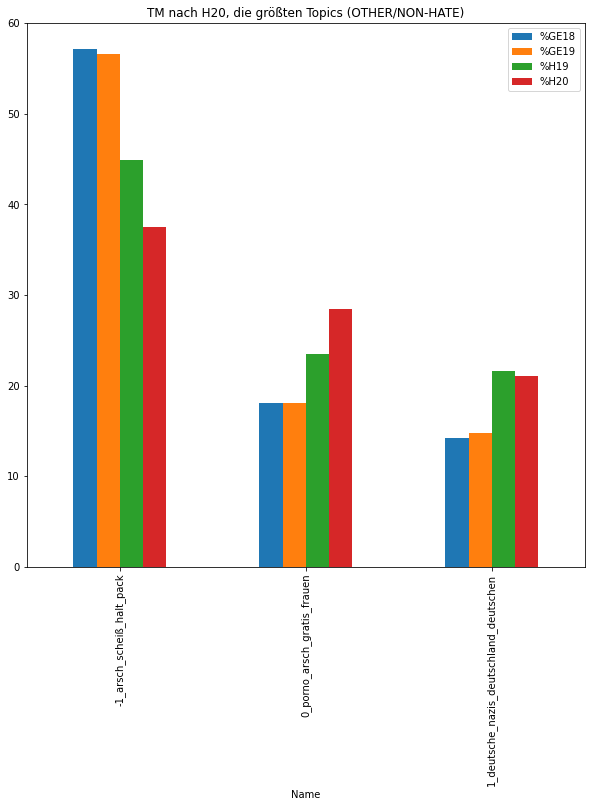

In [ ]:
train_h20_df_OTHER_percent_plt[0:3].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach H20, die größten Topics (OTHER/NON-HATE)")

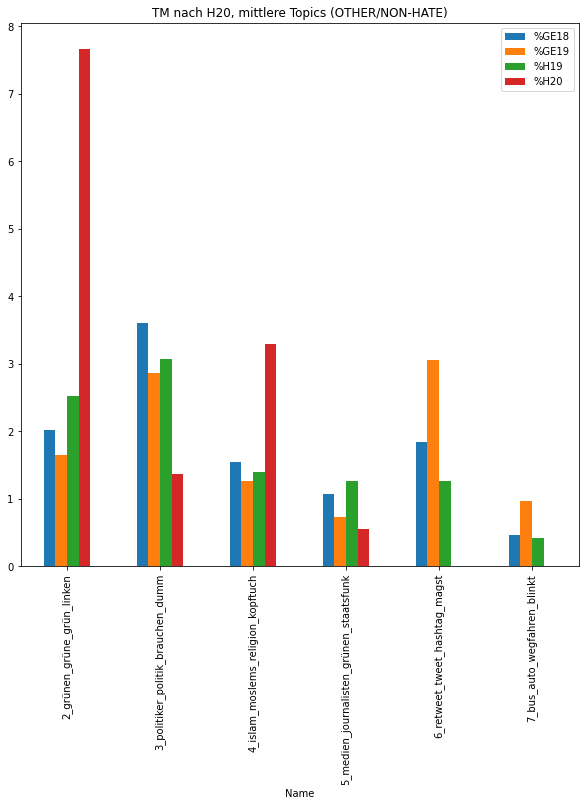

In [ ]:
train_h20_df_OTHER_percent_plt[3:].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach H20, mittlere Topics (OTHER/NON-HATE)")

In [ ]:
#train_ge19_df_OTHER_percent_plt[17:].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM nach H20, kleine Topics (OTHER/NON-HATE)")



In [ ]:
df_OFFENSE_percent

Topic  %GE18  %GE19   %H19   %H20                                     Name
0     -1  53.91  54.12  45.59  39.75                -1_arsch_scheiß_halt_pack
1      0  17.89  14.23  11.76  44.72              0_porno_arsch_gratis_frauen
2      1  16.64  20.62  28.68   6.83   1_deutsche_nazis_deutschland_deutschen
3      2   2.83   1.86   2.21   4.35               2_grünen_grüne_grün_linken
4      3   2.50   3.20   6.62   2.48        3_politiker_politik_brauchen_dumm
5      4   5.07   2.47   2.94   1.24        4_islam_moslems_religion_kopftuch
6      5   0.92   1.86   0.74   0.00  5_medien_journalisten_grünen_staatsfunk
7      6   0.17   1.44   1.47   0.62            6_retweet_tweet_hashtag_magst
8      7   0.08   0.21   0.00   0.00              7_bus_auto_wegfahren_blinkt

In [ ]:
train_h20_df_OFFENSE_percent_plt = df_OFFENSE_percent.set_index('Name')

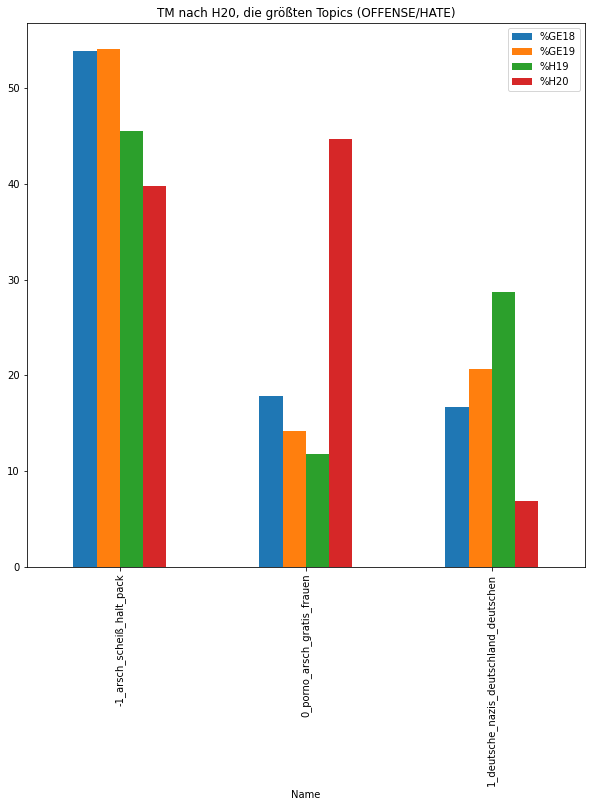

In [ ]:
train_h20_df_OFFENSE_percent_plt[0:3].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach H20, die größten Topics (OFFENSE/HATE)")


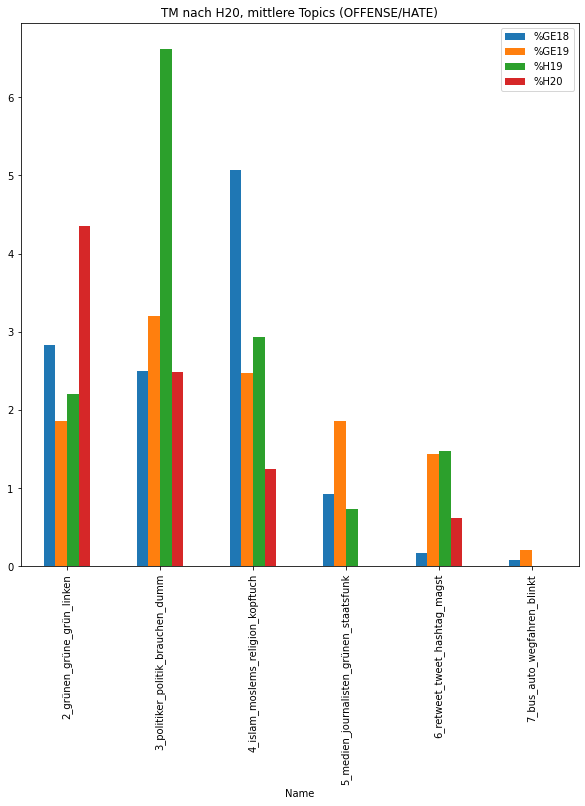

In [ ]:
train_h20_df_OFFENSE_percent_plt[3:].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach H20, mittlere Topics (OFFENSE/HATE)")


In [ ]:
#train_ge19_df_OFFENSE_percent_plt[17:].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM nach H20, kleine Topics (OFFENSE/HATE)")

## Klassifikation HASOCOne, trainiert auf HASOC2020


### Test GE2018

In [ ]:
train_h20_class_ge18 = pd.read_csv('/content/submission_DE_A_HASOCOne_HASOC2020_GermEval2018.csv')
train_h20_class_ge18


index_col task1  index_col.1
0             0   NOT            0
1             1   NOT            1
2             2   NOT            2
3             3   NOT            3
4             4   NOT            4
...         ...   ...          ...
3527       3527   NOT         3527
3528       3528   NOT         3528
3529       3529   HOF         3529
3530       3530   NOT         3530
3531       3531   NOT         3531

[3532 rows x 3 columns]

In [ ]:
ge18_test_class_values = pd.DataFrame(train_h20_class_ge18['task1'].value_counts())
ge18_test_class_values

task1
NOT   3029
HOF    503

In [ ]:
ge18_test_class_values['task1']

NOT    3029
HOF     503
Name: task1, dtype: int64

In [ ]:
ge18_test_raw['class'] = train_h20_class_ge18['task1']
ge18_test_raw

TWEET      OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...    OTHER  OTHER     0   
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...    OTHER  OTHER     4   
2     #Merkel rollt dem Emir von #Katar, der islamis...    OTHER  OTHER    -1   
3     „Merle ist kein junges unschuldiges Mädchen“ K...    OTHER  OTHER     0   
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE  ABUSE     1   
...                                                 ...      ...    ...   ...   
3527  @schlabonski tja, es können einen nicht alle L...    OTHER  OTHER    -1   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE  ABUSE    -1   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE  ABUSE     0   
3530  @stephanweil was ist nun mit kostenlosen Kitas...    OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...    OTHER  OTHER    -1   

     class  
0      NOT  
1      NOT  
2      NOT  
3      NOT  
4      NOT  
...    ...  
3527   NOT  
3528   NOT  
3529   HOF  
3530   NOT  
3531   NOT  

[3532 rows x 5 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge18_test_true_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 'HOF')]
ge18_test_true_pos

TWEET      OFF     CAT  \
11     Liebe Freunde, Gauck,das Symbol des Sklaventums!  OFFENSE   ABUSE   
62    @Westkurvenfan @DietmarAmann1 @Die_Gruenen @ce...  OFFENSE   ABUSE   
77    @DietmarAmann1 @Die_Gruenen @cem_oezdemir Ich ...  OFFENSE   ABUSE   
80    @Wjanka634 @FeePatzer Und Deine sind extrem doof.  OFFENSE  INSULT   
85    "@Reiterfee: @WHetzler @DanielMindon Tauber, i...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
3505  @JoeHellBack @ThomasMichael71 @alexa_jung60 @T...  OFFENSE   ABUSE   
3514  wie immer die Moderatorin der @AktuelleStunde ...  OFFENSE  INSULT   
3517  @Alltags_Kotze Dein Feminismus und Genderquats...  OFFENSE   ABUSE   
3526  @SteinbachErika Ich finde AFD Wähler besser al...  OFFENSE  INSULT   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE   ABUSE   

      pred class  
11      -1   HOF  
62      -1   HOF  
77       2   HOF  
80       0   HOF  
85      -1   HOF  
...    ...   ...  
3505     4   HOF  
3514     0   HOF  
3517     0   HOF  
3526     0   HOF  
3529     0   HOF  

[327 rows x 5 columns]

In [ ]:
ge18_test_pred_values_true_pos = pd.DataFrame(ge18_test_true_pos['pred'].value_counts())
ge18_test_pred_values_true_pos['percent'] = (ge18_test_pred_values_true_pos['pred'] / ge18_test_pred_values_true_pos['pred'].sum()) * 100
ge18_test_pred_values_true_pos

pred    percent
-1   183  55.963303
 0    70  21.406728
 1    48  14.678899
 4    12   3.669725
 3     7   2.140673
 2     6   1.834862
 6     1   0.305810

In [ ]:
ge18_test_false_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 'HOF')]
ge18_test_false_pos

TWEET    OFF    CAT  pred  \
12    @mountainman1977 @StapelChipsYT Au ja. Ich ste...  OTHER  OTHER     0   
36                         Achtung Harry Potter ! Redet  OTHER  OTHER    -1   
51    @WlerNr ich mache einen neuen Tweet auf, damit...  OTHER  OTHER     6   
64    @JoeHellBack @ThomasMichael71 @alexa_jung60 @T...  OTHER  OTHER     0   
72    @ZDFWATCH @jorg_radek Schäm Dich, Leute anzupö...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
3393  @HaraldRostock @anna_IIna ..ich freue mich auc...  OTHER  OTHER     0   
3434  @AfD_Support |LBR| Na dann Gute Nach Deutschland.  OTHER  OTHER     1   
3454  @RogueFirstLady die First Lady von @realDonald...  OTHER  OTHER     0   
3462  @rico_caviezel @Reifenstahl Stimmt. Ich bin De...  OTHER  OTHER     0   
3522  Heil dir im Siegerkranz,Herrscher des Vaterlan...  OTHER  OTHER     1   

     class  
12     HOF  
36     HOF  
51     HOF  
64     HOF  
72     HOF  
...    ...  
3393   HOF  
3434   HOF  
3454   HOF  
3462   HOF  
3522   HOF  

[176 rows x 5 columns]

In [ ]:
ge18_test_pred_values_false_pos = pd.DataFrame(ge18_test_false_pos['pred'].value_counts())
ge18_test_pred_values_false_pos['percent'] = (ge18_test_pred_values_false_pos['pred'] / ge18_test_pred_values_false_pos['pred'].sum()) * 100
ge18_test_pred_values_false_pos

pred    percent
-1   105  59.659091
 0    49  27.840909
 1    13   7.386364
 6     4   2.272727
 2     2   1.136364
 3     2   1.136364
 4     1   0.568182

In [ ]:
ge18_test_true_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 'NOT')]
ge18_test_true_neg

TWEET    OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...  OTHER  OTHER     0   
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...  OTHER  OTHER     4   
2     #Merkel rollt dem Emir von #Katar, der islamis...  OTHER  OTHER    -1   
3     „Merle ist kein junges unschuldiges Mädchen“ K...  OTHER  OTHER     0   
5     @_StultaMundi Die Bibel enthält ebenfalls Gese...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
3523  @rspctfl @everlast_fs @m8Flo @BolzAndrea @Inne...  OTHER  OTHER    -1   
3524  #Grüne bestehen auf Sanktionen gegen #Russland...  OTHER  OTHER    -1   
3527  @schlabonski tja, es können einen nicht alle L...  OTHER  OTHER    -1   
3530  @stephanweil was ist nun mit kostenlosen Kitas...  OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...  OTHER  OTHER    -1   

     class  
0      NOT  
1      NOT  
2      NOT  
3      NOT  
5      NOT  
...    ...  
3523   NOT  
3524   NOT  
3527   NOT  
3530   NOT  
3531   NOT  

[2154 rows x 5 columns]

In [ ]:
ge18_test_pred_values_true_neg = pd.DataFrame(ge18_test_true_neg['pred'].value_counts())
ge18_test_pred_values_true_neg['percent'] = (ge18_test_pred_values_true_neg['pred'] / ge18_test_pred_values_true_neg['pred'].sum()) * 100
ge18_test_pred_values_true_neg

pred    percent
-1  1227  56.963788
 0   373  17.316620
 1   317  14.716806
 3    82   3.806871
 2    45   2.089136
 6    39   1.810585
 4    35   1.624884
 5    25   1.160631
 7    11   0.510678

In [ ]:
ge18_test_false_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 'NOT')]
ge18_test_false_neg

TWEET      OFF     CAT  \
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE   ABUSE   
9     @FeePatzer Frauen zu einem "Ja" zu überreden, ...  OFFENSE   ABUSE   
10    @IvyandWoe Ich weiß halt, wie man Frauen zum M...  OFFENSE   ABUSE   
13    wen interessiert denn die Meinung des Außenmin...  OFFENSE  INSULT   
15    @LWaff @UnzufriedenerB |LBR| Laßt doch endlich...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
3513  Deutschland geht unter und Merkel ist der Tote...  OFFENSE  INSULT   
3519    Feminismus ist der Islamismus der Weiblichkeit.  OFFENSE   ABUSE   
3521  @UdoUlfkotte Hauptsache den Asylanten gehts ge...  OFFENSE   ABUSE   
3525  @ThomasMichael71 @mountainman1977 @houelle_bec...  OFFENSE   ABUSE   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE   ABUSE   

      pred class  
4        1   NOT  
9       -1   NOT  
10      -1   NOT  
13      -1   NOT  
15       1   NOT  
...    ...   ...  
3513     1   NOT  
3519     4   NOT  
3521     1   NOT  
3525     1   NOT  
3528    -1   NOT  

[875 rows x 5 columns]

In [ ]:
ge18_test_pred_values_false_neg = pd.DataFrame(ge18_test_false_neg['pred'].value_counts())
ge18_test_pred_values_false_neg['percent'] = (ge18_test_pred_values_false_neg['pred'] / ge18_test_pred_values_false_neg['pred'].sum()) * 100
ge18_test_pred_values_false_neg

pred    percent
-1   465  53.142857
 1   152  17.371429
 0   145  16.571429
 4    49   5.600000
 2    28   3.200000
 3    23   2.628571
 5    11   1.257143
 6     1   0.114286
 7     1   0.114286

In [ ]:
ge18_test_raw['cat_bin_actual'] = ge18_test_raw['OFF'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)
ge18_test_raw['cat_bin_predicted'] = ge18_test_raw['class'].map({'HOF': 1, 'NOT': 0}).astype(int)


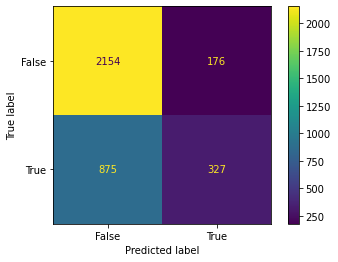

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = ge18_test_raw['cat_bin_actual']
predicted = ge18_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.7024348810872028

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.6500994035785288

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.2720465890183028

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.9244635193133047

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.38357771260997064

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.7024348810872028, 'Precision': 0.6500994035785288, 'Sensitivity_recall': 0.2720465890183028, 'Specificity': 0.9244635193133047, 'F1_score': 0.38357771260997064}


### TEST GE2018 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h20_model_topics[['Topic','Name']]
df1

Topic                                     Name
0     -1                -1_arsch_scheiß_halt_pack
1      0              0_porno_arsch_gratis_frauen
2      1   1_deutsche_nazis_deutschland_deutschen
3      2               2_grünen_grüne_grün_linken
4      3        3_politiker_politik_brauchen_dumm
5      4        4_islam_moslems_religion_kopftuch
6      5  5_medien_journalisten_grünen_staatsfunk
7      6            6_retweet_tweet_hashtag_magst
8      7              7_bus_auto_wegfahren_blinkt

In [ ]:
ge18_test_pred_values_true_pos['Topic'] = ge18_test_pred_values_true_pos.index
ge18_test_pred_values_true_pos

pred    percent  Topic
-1   183  55.963303     -1
 0    70  21.406728      0
 1    48  14.678899      1
 4    12   3.669725      4
 3     7   2.140673      3
 2     6   1.834862      2
 6     1   0.305810      6

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE18TP', 'percent':'%GE18TP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_pos['Topic'] = ge18_test_pred_values_false_pos.index
ge18_test_pred_values_false_pos

pred    percent  Topic
-1   105  59.659091     -1
 0    49  27.840909      0
 1    13   7.386364      1
 6     4   2.272727      6
 2     2   1.136364      2
 3     2   1.136364      3
 4     1   0.568182      4

In [ ]:
df3 = ge18_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE18FP', 'percent':'%GE18FP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_true_neg['Topic'] = ge18_test_pred_values_true_neg.index
ge18_test_pred_values_true_neg

pred    percent  Topic
-1  1227  56.963788     -1
 0   373  17.316620      0
 1   317  14.716806      1
 3    82   3.806871      3
 2    45   2.089136      2
 6    39   1.810585      6
 4    35   1.624884      4
 5    25   1.160631      5
 7    11   0.510678      7

In [ ]:
df4 = ge18_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE18TN', 'percent':'%GE18TN', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_neg['Topic'] = ge18_test_pred_values_false_neg.index
ge18_test_pred_values_false_neg

pred    percent  Topic
-1   465  53.142857     -1
 1   152  17.371429      1
 0   145  16.571429      0
 4    49   5.600000      4
 2    28   3.200000      2
 3    23   2.628571      3
 5    11   1.257143      5
 6     1   0.114286      6
 7     1   0.114286      7

In [ ]:
df5 = ge18_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE18FN', 'percent':'%GE18FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']] = df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']].astype(float).round(2)
df_merged
#df_to_round = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE18', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                     Name predGE18TP  %GE18TP  \
0     -1                -1_arsch_scheiß_halt_pack      183.0    55.96   
1      0              0_porno_arsch_gratis_frauen       70.0    21.41   
2      1   1_deutsche_nazis_deutschland_deutschen       48.0    14.68   
3      2               2_grünen_grüne_grün_linken        6.0     1.83   
4      3        3_politiker_politik_brauchen_dumm        7.0     2.14   
5      4        4_islam_moslems_religion_kopftuch       12.0     3.67   
6      5  5_medien_journalisten_grünen_staatsfunk          0     0.00   
7      6            6_retweet_tweet_hashtag_magst        1.0     0.31   
8      7              7_bus_auto_wegfahren_blinkt          0     0.00   

  predGE18FP  %GE18FP  predGE18TN  %GE18TN  predGE18FN  %GE18FN  
0      105.0    59.66        1227    56.96         465    53.14  
1       49.0    27.84         373    17.32         145    16.57  
2       13.0     7.39         317    14.72         152    17.37  
3        2.0     1.14          45     2.09          28     3.20  
4        2.0     1.14          82     3.81          23     2.63  
5        1.0     0.57          35     1.62          49     5.60  
6          0     0.00          25     1.16          11     1.26  
7        4.0     2.27          39     1.81           1     0.11  
8          0     0.00          11     0.51           1     0.11

In [ ]:
df_merged

Topic                                     Name predGE18TP  %GE18TP  \
0     -1                -1_arsch_scheiß_halt_pack      183.0    55.96   
1      0              0_porno_arsch_gratis_frauen       70.0    21.41   
2      1   1_deutsche_nazis_deutschland_deutschen       48.0    14.68   
3      2               2_grünen_grüne_grün_linken        6.0     1.83   
4      3        3_politiker_politik_brauchen_dumm        7.0     2.14   
5      4        4_islam_moslems_religion_kopftuch       12.0     3.67   
6      5  5_medien_journalisten_grünen_staatsfunk          0     0.00   
7      6            6_retweet_tweet_hashtag_magst        1.0     0.31   
8      7              7_bus_auto_wegfahren_blinkt          0     0.00   

  predGE18FP  %GE18FP  predGE18TN  %GE18TN  predGE18FN  %GE18FN  
0      105.0    59.66        1227    56.96         465    53.14  
1       49.0    27.84         373    17.32         145    16.57  
2       13.0     7.39         317    14.72         152    17.37  
3        2.0     1.14          45     2.09          28     3.20  
4        2.0     1.14          82     3.81          23     2.63  
5        1.0     0.57          35     1.62          49     5.60  
6          0     0.00          25     1.16          11     1.26  
7        4.0     2.27          39     1.81           1     0.11  
8          0     0.00          11     0.51           1     0.11

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE18TP": int, "predGE18TN":int, "predGE18FP":int, "predGE18FN":int})
df_merged

Topic                                     Name  predGE18TP  %GE18TP  \
0     -1                -1_arsch_scheiß_halt_pack         183    55.96   
1      0              0_porno_arsch_gratis_frauen          70    21.41   
2      1   1_deutsche_nazis_deutschland_deutschen          48    14.68   
3      2               2_grünen_grüne_grün_linken           6     1.83   
4      3        3_politiker_politik_brauchen_dumm           7     2.14   
5      4        4_islam_moslems_religion_kopftuch          12     3.67   
6      5  5_medien_journalisten_grünen_staatsfunk           0     0.00   
7      6            6_retweet_tweet_hashtag_magst           1     0.31   
8      7              7_bus_auto_wegfahren_blinkt           0     0.00   

   predGE18FP  %GE18FP  predGE18TN  %GE18TN  predGE18FN  %GE18FN  
0         105    59.66        1227    56.96         465    53.14  
1          49    27.84         373    17.32         145    16.57  
2          13     7.39         317    14.72         152    17.37  
3           2     1.14          45     2.09          28     3.20  
4           2     1.14          82     3.81          23     2.63  
5           1     0.57          35     1.62          49     5.60  
6           0     0.00          25     1.16          11     1.26  
7           4     2.27          39     1.81           1     0.11  
8           0     0.00          11     0.51           1     0.11

In [ ]:
df_percent = df_merged[['Topic','%GE18TP', '%GE18TN','%GE18FP', '%GE18FN','Name']]
df_percent

Topic  %GE18TP  %GE18TN  %GE18FP  %GE18FN  \
0     -1    55.96    56.96    59.66    53.14   
1      0    21.41    17.32    27.84    16.57   
2      1    14.68    14.72     7.39    17.37   
3      2     1.83     2.09     1.14     3.20   
4      3     2.14     3.81     1.14     2.63   
5      4     3.67     1.62     0.57     5.60   
6      5     0.00     1.16     0.00     1.26   
7      6     0.31     1.81     2.27     0.11   
8      7     0.00     0.51     0.00     0.11   

                                      Name  
0                -1_arsch_scheiß_halt_pack  
1              0_porno_arsch_gratis_frauen  
2   1_deutsche_nazis_deutschland_deutschen  
3               2_grünen_grüne_grün_linken  
4        3_politiker_politik_brauchen_dumm  
5        4_islam_moslems_religion_kopftuch  
6  5_medien_journalisten_grünen_staatsfunk  
7            6_retweet_tweet_hashtag_magst  
8              7_bus_auto_wegfahren_blinkt

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

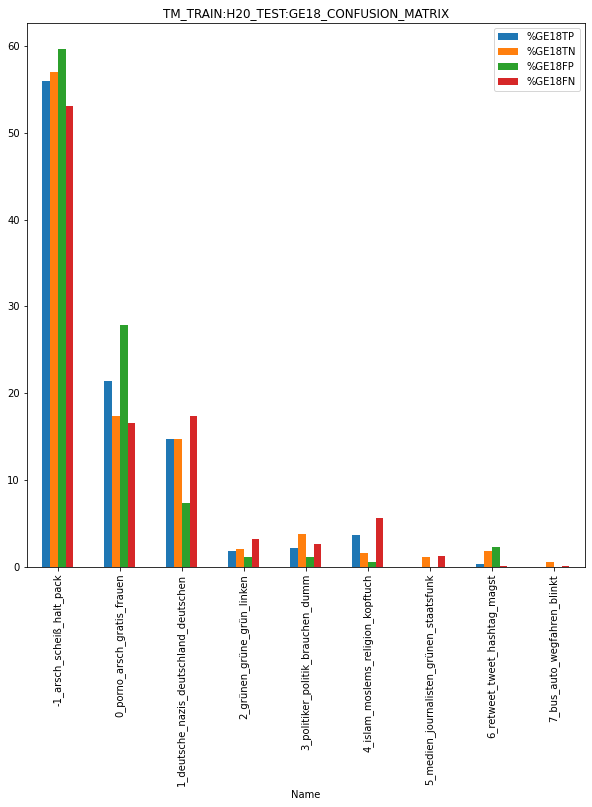

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX.plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:GE18_CONFUSION_MATRIX")

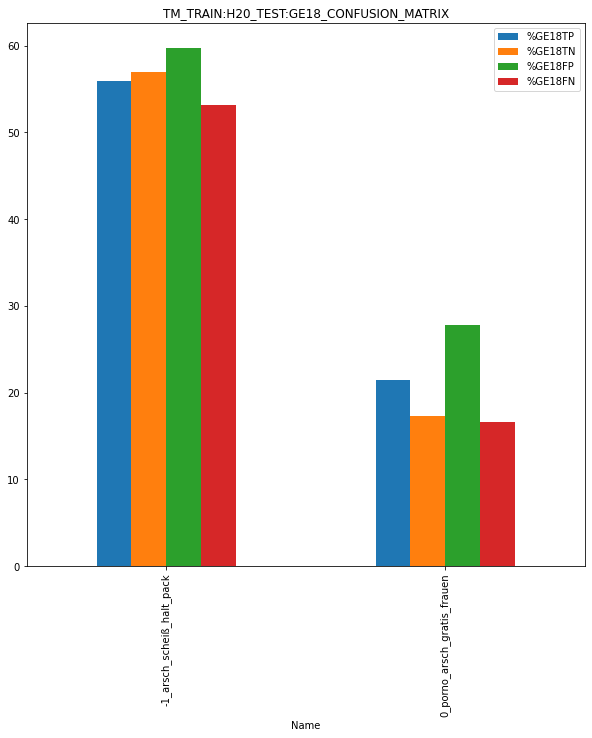

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:GE18_CONFUSION_MATRIX")

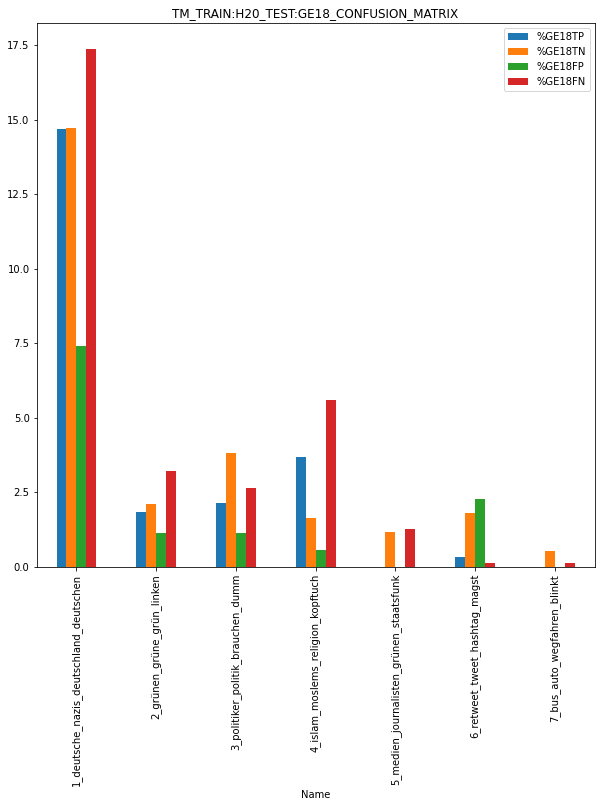

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:GE18_CONFUSION_MATRIX")

In [ ]:
#test_ge18_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:H20_TEST:GE18_CONFUSION_MATRIX")

### Test GE2019

In [ ]:
train_h20_class_ge19 = pd.read_csv('/content/submission_DE_A_HASOCOne_HASOC2020_GermEval2019.csv')
train_h20_class_ge19

index_col task1  index_col.1
0             0   NOT            0
1             1   NOT            1
2             2   NOT            2
3             3   NOT            3
4             4   NOT            4
...         ...   ...          ...
3026       3026   NOT         3026
3027       3027   NOT         3027
3028       3028   NOT         3028
3029       3029   NOT         3029
3030       3030   NOT         3030

[3031 rows x 3 columns]

In [ ]:
ge19_test_class_values = pd.DataFrame(train_h20_class_ge19['task1'].value_counts())
ge19_test_class_values

task1
NOT   2823
HOF    208

In [ ]:

ge19_test_raw['class'] = train_h20_class_ge19['task1']
ge19_test_raw

TWEET      OFF     CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE  INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE   ABUSE   
2     @DLFNachrichten Die Gesichter, Namen, Religion...    OTHER   OTHER   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE   ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
3026  Es fand aber nie eine Emanzipierungs-Phase der...    OTHER   OTHER   
3027  Um es klar zu stellen: Ich will hier kein Whit...    OTHER   OTHER   
3028  Und dann habe ich da noch die McArthur-Briefe ...    OTHER   OTHER   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...    OTHER   OTHER   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...    OTHER   OTHER   

      pred class  
0       -1   NOT  
1       -1   NOT  
2        4   NOT  
3       -1   NOT  
4       -1   NOT  
...    ...   ...  
3026     1   NOT  
3027    -1   NOT  
3028    -1   NOT  
3029    -1   NOT  
3030    -1   NOT  

[3031 rows x 5 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge19_test_true_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 'HOF')]
ge19_test_true_pos

TWEET      OFF        CAT  \
104   @welt @cem_oezdemir Die ganze Politik von Grün...  OFFENSE     INSULT   
107   @vmedick @SPIEGELONLINE @DerSPIEGEL Die Nahles...  OFFENSE     INSULT   
116   Südländer überfallen 22-jährigen in Neunkriche...  OFFENSE      ABUSE   
136   Einen Konservativen machst du stinksauer, wenn...  OFFENSE      ABUSE   
158   Frauen sind sündige Sexobjekte, welche Männer ...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
2848     @bestdamnalex <U+0001F913> Geh furzen du Godik  OFFENSE  PROFANITY   
2852  War lächerlich, ist lächerlich und wird lächer...  OFFENSE     INSULT   
2870  eine Fresse wie viel Fritierfett hat #markusla...  OFFENSE  PROFANITY   
2886  Ich kann nachvollziehen dass seriöse Medien ka...  OFFENSE     INSULT   
2949    #Erdogan ist einfach eine Pest für die #Türkei.  OFFENSE     INSULT   

      pred class  
104      1   HOF  
107     -1   HOF  
116     -1   HOF  
136     -1   HOF  
158      4   HOF  
...    ...   ...  
2848     0   HOF  
2852    -1   HOF  
2870     0   HOF  
2886    -1   HOF  
2949     1   HOF  

[120 rows x 5 columns]

In [ ]:
ge19_test_pred_values_true_pos = pd.DataFrame(ge19_test_true_pos['pred'].value_counts())
ge19_test_pred_values_true_pos['percent'] = (ge19_test_pred_values_true_pos['pred'] / ge19_test_pred_values_true_pos['pred'].sum()) * 100
ge19_test_pred_values_true_pos

pred    percent
-1    74  61.666667
 1    19  15.833333
 0    15  12.500000
 4     3   2.500000
 3     3   2.500000
 2     2   1.666667
 5     2   1.666667
 6     2   1.666667

In [ ]:
ge19_test_false_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 'HOF')]
ge19_test_false_pos

TWEET    OFF    CAT  pred  \
157   @katharina_munz Der arme Kerl wird für seine s...  OTHER  OTHER    -1   
181   @GeorgKleine @ApartmentNr9 @Mont1701 @ihrseidd...  OTHER  OTHER     4   
225   @ostmann1977 @RegSprecher Da dröhnt sein Schwe...  OTHER  OTHER    -1   
287   Sie begreift den Bundestag als Versorgungszent...  OTHER  OTHER     3   
363            DAS WAR DOCH SOOOO KLAR ... *kotz* #fcsp  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
2873  #markuslanz klar, und O_Sudermann macht fleißi...  OTHER  OTHER    -1   
2915  “@Protestfoto_ffm: Laut Polizei keine #afd-ler...  OTHER  OTHER    -1   
2942  Heute: 15h #Frankfurt #HBF: Demo Weg mit dem #...  OTHER  OTHER    -1   
2997  @spdde hätte bspw. Punkte sammeln können, inde...  OTHER  OTHER     3   
3009  @realJohr Pariser Frauen sind nur im Regen sch...  OTHER  OTHER     1   

     class  
157    HOF  
181    HOF  
225    HOF  
287    HOF  
363    HOF  
...    ...  
2873   HOF  
2915   HOF  
2942   HOF  
2997   HOF  
3009   HOF  

[88 rows x 5 columns]

In [ ]:
ge19_test_pred_values_false_pos = pd.DataFrame(ge19_test_false_pos['pred'].value_counts())
ge19_test_pred_values_false_pos['percent'] = (ge19_test_pred_values_false_pos['pred'] / ge19_test_pred_values_false_pos['pred'].sum()) * 100
ge19_test_pred_values_false_pos

pred    percent
-1    51  57.954545
 0    19  21.590909
 1    14  15.909091
 4     2   2.272727
 3     2   2.272727

In [ ]:
ge19_test_true_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 'NOT')]
ge19_test_true_neg

TWEET    OFF    CAT  pred  \
2     @DLFNachrichten Die Gesichter, Namen, Religion...  OTHER  OTHER     4   
5     @aktuelle_stunde Also beim Fall Birmingham, En...  OTHER  OTHER    -1   
6     @StZ_NEWS Aber bei läppischen 130.000 Euro der...  OTHER  OTHER     1   
12    @BR24 Wie viele werden durch Gas Unfälle getöt...  OTHER  OTHER     7   
25    @TAG24LE Wenn sich Linke Linke zu Feinden mach...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
3026  Es fand aber nie eine Emanzipierungs-Phase der...  OTHER  OTHER     1   
3027  Um es klar zu stellen: Ich will hier kein Whit...  OTHER  OTHER    -1   
3028  Und dann habe ich da noch die McArthur-Briefe ...  OTHER  OTHER    -1   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...  OTHER  OTHER    -1   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...  OTHER  OTHER    -1   

     class  
2      NOT  
5      NOT  
6      NOT  
12     NOT  
25     NOT  
...    ...  
3026   NOT  
3027   NOT  
3028   NOT  
3029   NOT  
3030   NOT  

[1973 rows x 5 columns]

In [ ]:
ge19_test_pred_values_true_neg = pd.DataFrame(ge19_test_true_neg['pred'].value_counts())
ge19_test_pred_values_true_neg['percent'] = (ge19_test_pred_values_true_neg['pred'] / ge19_test_pred_values_true_neg['pred'].sum()) * 100
ge19_test_pred_values_true_neg

pred    percent
-1  1116  56.563609
 0   354  17.942220
 1   290  14.698429
 6    63   3.193107
 3    57   2.889002
 2    34   1.723264
 4    24   1.216422
 7    20   1.013685
 5    15   0.760264

In [ ]:
ge19_test_false_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 'NOT')]
ge19_test_false_neg

TWEET      OFF        CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE     INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE      ABUSE   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE      ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE      ABUSE   
7     @StZ_NEWS Schäuble wird wissen woher dieses Na...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
2888  Einfach nur peinlich wie sich sogenannte Aktiv...  OFFENSE     INSULT   
2889  Diese sogenannten Aktivisten sind Straftäter d...  OFFENSE      ABUSE   
2976  @sixtus Irgend so ein charakterloser brauner M...  OFFENSE     INSULT   
2978  Das mag dem einen oder anderen harsch vorkomme...  OFFENSE     INSULT   
2988  Ich frage mich mittlerweile was Saudi Arabien ...  OFFENSE  PROFANITY   

      pred class  
0       -1   NOT  
1       -1   NOT  
3       -1   NOT  
4       -1   NOT  
7        1   NOT  
...    ...   ...  
2888    -1   NOT  
2889    -1   NOT  
2976    -1   NOT  
2978     0   NOT  
2988     4   NOT  

[850 rows x 5 columns]

In [ ]:
ge19_test_pred_values_false_neg = pd.DataFrame(ge19_test_false_neg['pred'].value_counts())
ge19_test_pred_values_false_neg['percent'] = (ge19_test_pred_values_false_neg['pred'] / ge19_test_pred_values_false_neg['pred'].sum()) * 100
ge19_test_pred_values_false_neg

pred    percent
-1   451  53.058824
 1   181  21.294118
 0   123  14.470588
 3    28   3.294118
 4    21   2.470588
 5    16   1.882353
 2    16   1.882353
 6    12   1.411765
 7     2   0.235294

In [ ]:
ge19_test_raw['cat_bin_actual'] = ge19_test_raw['OFF'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)
ge19_test_raw['cat_bin_predicted'] = ge19_test_raw['class'].map({'HOF': 1, 'NOT': 0}).astype(int)


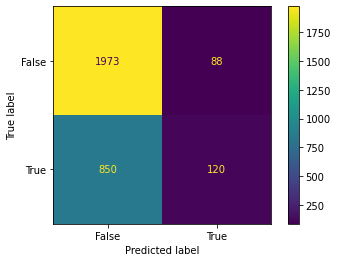

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
#import matplotlib.pyplot as plt
#import numpy
#from sklearn import metrics

actual = ge19_test_raw['cat_bin_actual']
predicted = ge19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.6905311778290993

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.5769230769230769

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.12371134020618557

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.9573022804463852

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.2037351443123939

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.6905311778290993, 'Precision': 0.5769230769230769, 'Sensitivity_recall': 0.12371134020618557, 'Specificity': 0.9573022804463852, 'F1_score': 0.2037351443123939}


### TEST GE2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h20_model_topics[['Topic','Name']]
df1

Topic                                     Name
0     -1                -1_arsch_scheiß_halt_pack
1      0              0_porno_arsch_gratis_frauen
2      1   1_deutsche_nazis_deutschland_deutschen
3      2               2_grünen_grüne_grün_linken
4      3        3_politiker_politik_brauchen_dumm
5      4        4_islam_moslems_religion_kopftuch
6      5  5_medien_journalisten_grünen_staatsfunk
7      6            6_retweet_tweet_hashtag_magst
8      7              7_bus_auto_wegfahren_blinkt

In [ ]:
ge19_test_pred_values_true_pos['Topic'] = ge19_test_pred_values_true_pos.index
ge19_test_pred_values_true_pos

pred    percent  Topic
-1    74  61.666667     -1
 1    19  15.833333      1
 0    15  12.500000      0
 4     3   2.500000      4
 3     3   2.500000      3
 2     2   1.666667      2
 5     2   1.666667      5
 6     2   1.666667      6

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE19TP', 'percent':'%GE19TP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_pos['Topic'] = ge19_test_pred_values_false_pos.index
ge19_test_pred_values_false_pos

pred    percent  Topic
-1    51  57.954545     -1
 0    19  21.590909      0
 1    14  15.909091      1
 4     2   2.272727      4
 3     2   2.272727      3

In [ ]:
df3 = ge19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE19FP', 'percent':'%GE19FP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_true_neg['Topic'] = ge19_test_pred_values_true_neg.index
ge19_test_pred_values_true_neg

pred    percent  Topic
-1  1116  56.563609     -1
 0   354  17.942220      0
 1   290  14.698429      1
 6    63   3.193107      6
 3    57   2.889002      3
 2    34   1.723264      2
 4    24   1.216422      4
 7    20   1.013685      7
 5    15   0.760264      5

In [ ]:
df4 = ge19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE19TN', 'percent':'%GE19TN', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_neg['Topic'] = ge19_test_pred_values_false_neg.index
ge19_test_pred_values_false_neg

pred    percent  Topic
-1   451  53.058824     -1
 1   181  21.294118      1
 0   123  14.470588      0
 3    28   3.294118      3
 4    21   2.470588      4
 5    16   1.882353      5
 2    16   1.882353      2
 6    12   1.411765      6
 7     2   0.235294      7

In [ ]:
df5 = ge19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE19FN', 'percent':'%GE19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']] = df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%GE19', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE19', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                     Name predGE19TP  %GE19TP  \
0     -1                -1_arsch_scheiß_halt_pack       74.0    61.67   
1      0              0_porno_arsch_gratis_frauen       15.0    12.50   
2      1   1_deutsche_nazis_deutschland_deutschen       19.0    15.83   
3      2               2_grünen_grüne_grün_linken        2.0     1.67   
4      3        3_politiker_politik_brauchen_dumm        3.0     2.50   
5      4        4_islam_moslems_religion_kopftuch        3.0     2.50   
6      5  5_medien_journalisten_grünen_staatsfunk        2.0     1.67   
7      6            6_retweet_tweet_hashtag_magst        2.0     1.67   
8      7              7_bus_auto_wegfahren_blinkt          0     0.00   

  predGE19FP  %GE19FP  predGE19TN  %GE19TN  predGE19FN  %GE19FN  
0       51.0    57.95        1116    56.56         451    53.06  
1       19.0    21.59         354    17.94         123    14.47  
2       14.0    15.91         290    14.70         181    21.29  
3          0     0.00          34     1.72          16     1.88  
4        2.0     2.27          57     2.89          28     3.29  
5        2.0     2.27          24     1.22          21     2.47  
6          0     0.00          15     0.76          16     1.88  
7          0     0.00          63     3.19          12     1.41  
8          0     0.00          20     1.01           2     0.24

In [ ]:
df_merged

Topic                                     Name predGE19TP  %GE19TP  \
0     -1                -1_arsch_scheiß_halt_pack       74.0    61.67   
1      0              0_porno_arsch_gratis_frauen       15.0    12.50   
2      1   1_deutsche_nazis_deutschland_deutschen       19.0    15.83   
3      2               2_grünen_grüne_grün_linken        2.0     1.67   
4      3        3_politiker_politik_brauchen_dumm        3.0     2.50   
5      4        4_islam_moslems_religion_kopftuch        3.0     2.50   
6      5  5_medien_journalisten_grünen_staatsfunk        2.0     1.67   
7      6            6_retweet_tweet_hashtag_magst        2.0     1.67   
8      7              7_bus_auto_wegfahren_blinkt          0     0.00   

  predGE19FP  %GE19FP  predGE19TN  %GE19TN  predGE19FN  %GE19FN  
0       51.0    57.95        1116    56.56         451    53.06  
1       19.0    21.59         354    17.94         123    14.47  
2       14.0    15.91         290    14.70         181    21.29  
3          0     0.00          34     1.72          16     1.88  
4        2.0     2.27          57     2.89          28     3.29  
5        2.0     2.27          24     1.22          21     2.47  
6          0     0.00          15     0.76          16     1.88  
7          0     0.00          63     3.19          12     1.41  
8          0     0.00          20     1.01           2     0.24

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE19TP": int, "predGE19TN":int, "predGE19FP":int, "predGE19FN":int})
df_merged

Topic                                     Name  predGE19TP  %GE19TP  \
0     -1                -1_arsch_scheiß_halt_pack          74    61.67   
1      0              0_porno_arsch_gratis_frauen          15    12.50   
2      1   1_deutsche_nazis_deutschland_deutschen          19    15.83   
3      2               2_grünen_grüne_grün_linken           2     1.67   
4      3        3_politiker_politik_brauchen_dumm           3     2.50   
5      4        4_islam_moslems_religion_kopftuch           3     2.50   
6      5  5_medien_journalisten_grünen_staatsfunk           2     1.67   
7      6            6_retweet_tweet_hashtag_magst           2     1.67   
8      7              7_bus_auto_wegfahren_blinkt           0     0.00   

   predGE19FP  %GE19FP  predGE19TN  %GE19TN  predGE19FN  %GE19FN  
0          51    57.95        1116    56.56         451    53.06  
1          19    21.59         354    17.94         123    14.47  
2          14    15.91         290    14.70         181    21.29  
3           0     0.00          34     1.72          16     1.88  
4           2     2.27          57     2.89          28     3.29  
5           2     2.27          24     1.22          21     2.47  
6           0     0.00          15     0.76          16     1.88  
7           0     0.00          63     3.19          12     1.41  
8           0     0.00          20     1.01           2     0.24

In [ ]:
df_percent = df_merged[['Topic','%GE19TP', '%GE19TN','%GE19FP', '%GE19FN','Name']]
df_percent

Topic  %GE19TP  %GE19TN  %GE19FP  %GE19FN  \
0     -1    61.67    56.56    57.95    53.06   
1      0    12.50    17.94    21.59    14.47   
2      1    15.83    14.70    15.91    21.29   
3      2     1.67     1.72     0.00     1.88   
4      3     2.50     2.89     2.27     3.29   
5      4     2.50     1.22     2.27     2.47   
6      5     1.67     0.76     0.00     1.88   
7      6     1.67     3.19     0.00     1.41   
8      7     0.00     1.01     0.00     0.24   

                                      Name  
0                -1_arsch_scheiß_halt_pack  
1              0_porno_arsch_gratis_frauen  
2   1_deutsche_nazis_deutschland_deutschen  
3               2_grünen_grüne_grün_linken  
4        3_politiker_politik_brauchen_dumm  
5        4_islam_moslems_religion_kopftuch  
6  5_medien_journalisten_grünen_staatsfunk  
7            6_retweet_tweet_hashtag_magst  
8              7_bus_auto_wegfahren_blinkt

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

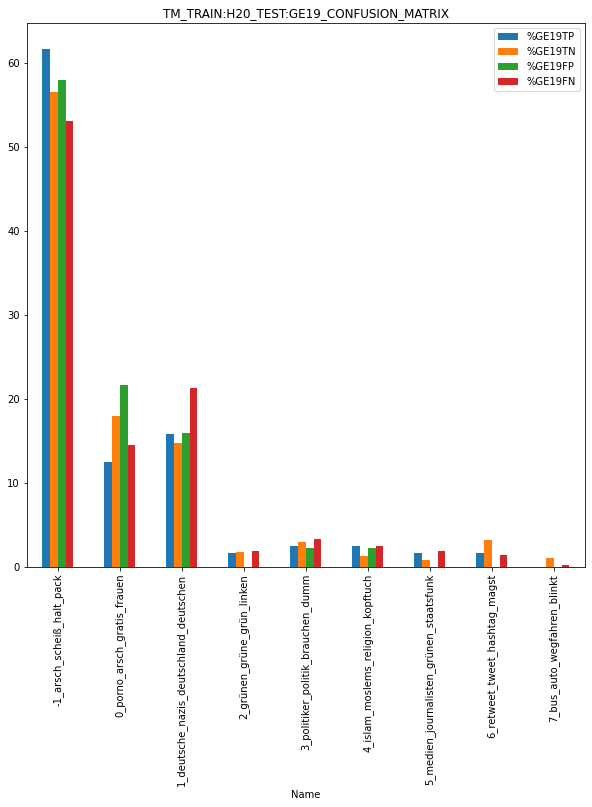

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX.plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:GE19_CONFUSION_MATRIX")

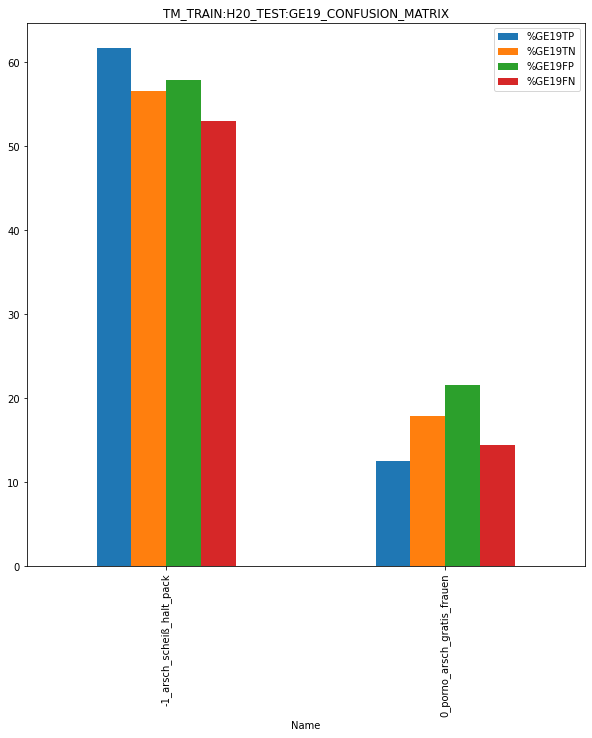

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:GE19_CONFUSION_MATRIX")

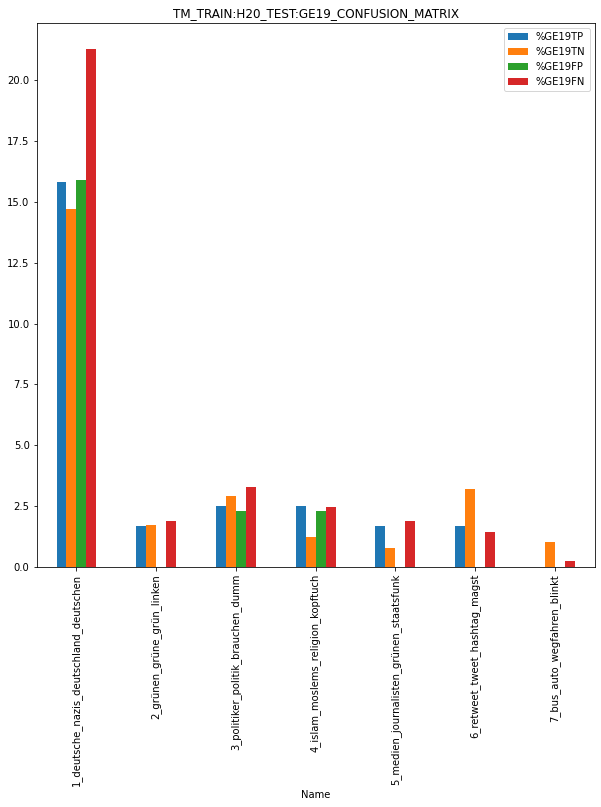

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:GE19_CONFUSION_MATRIX")

In [ ]:
#test_ge19_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:H20_TEST:GE19_CONFUSION_MATRIX")

### Test H2019

In [ ]:
train_h20_class_h19 = pd.read_csv('/content/submission_DE_A_HASOCOne_german_task_a_HASOC2020_HASOC2019.csv')
train_h20_class_h19


text_id task1  index_col
0          0   NOT          0
1          1   NOT          1
2          2   NOT          2
3          3   NOT          3
4          4   NOT          4
..       ...   ...        ...
845      845   NOT        845
846      846   NOT        846
847      847   NOT        847
848      848   NOT        848
849      849   NOT        849

[850 rows x 3 columns]

In [ ]:
h19_test_class_values = pd.DataFrame(train_h20_class_h19['task1'].value_counts())
h19_test_class_values

task1
NOT    828
HOF     22

In [ ]:

h19_test_raw['class'] = train_h20_class_h19['task1']
h19_test_raw

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
..             ...                                                ...    ...   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred class  
0     HATE     2   NOT  
1     NONE     1   NOT  
2     NONE     0   NOT  
3     OFFN     3   NOT  
4     OFFN    -1   NOT  
..     ...   ...   ...  
845   OFFN    -1   NOT  
846   OFFN     0   NOT  
847   OFFN     1   NOT  
848   OFFN    -1   NOT  
849   NONE     0   NOT  

[850 rows x 6 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h19_test_true_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 'HOF')]
h19_test_true_pos

text_id                                               text task_1  \
61   hasoc_de_5331  @Kurzkommentar @manu_mie @Ralf_Stegner Bei uns...    HOF   
78   hasoc_de_5348  Dreimal sagen,'Allah Akbars ' und dann noch 'i...    HOF   
392  hasoc_de_5662  Was für eine widerliche Scheisse!    Ich hab n...    HOF   
417  hasoc_de_5687  Heute sage ich, es war 89 falsch die Stasi-Unt...    HOF   
553  hasoc_de_5823  Nach tagelanger Skandalisierung von #Gauland's...    HOF   
609  hasoc_de_5879  'Wo sind die Kinder?“  “Auf der AfD-Demo: Stro...    HOF   
618  hasoc_de_5888  Die ersten Prognosen deuten an, dass es bei de...    HOF   
643  hasoc_de_5913  @Uwe_Junge_MdL Nach dem der Neoliberalismus  u...    HOF   
706  hasoc_de_5976  @Uwe_Junge_MdL Tja, wenn Leute wie Sie an der ...    HOF   
720  hasoc_de_5990  @Uwe_Junge_MdL War da nicht mal was in deinem ...    HOF   

    task_2  pred class  
61    HATE     1   HOF  
78    HATE     4   HOF  
392   HATE    -1   HOF  
417   PRFN     1   HOF  
553   OFFN    -1   HOF  
609   PRFN     1   HOF  
618   PRFN     1   HOF  
643   PRFN     3   HOF  
706   HATE    -1   HOF  
720   OFFN    -1   HOF

In [ ]:
h19_test_pred_values_true_pos = pd.DataFrame(h19_test_true_pos['pred'].value_counts())
h19_test_pred_values_true_pos['percent'] = (h19_test_pred_values_true_pos['pred'] / h19_test_pred_values_true_pos['pred'].sum()) * 100
h19_test_pred_values_true_pos

pred  percent
 1     4     40.0
-1     4     40.0
 4     1     10.0
 3     1     10.0

In [ ]:
h19_test_false_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 'HOF')]
h19_test_false_pos

text_id                                               text task_1  \
42   hasoc_de_5312                                           Logisch!    NOT   
131  hasoc_de_5401  @BlondJedi @akk Die 'oben'haben von nix Ahnung...    NOT   
146  hasoc_de_5416                  @BlondJedi Die husten denen was..    NOT   
217  hasoc_de_5487  @Ralf64904117 In Bayern sagt man oft 'Der hat ...    NOT   
219  hasoc_de_5489  2/2   SO EINFACH IST BIN ICH AB HEUTE 25.........    NOT   
249  hasoc_de_5519                          @mainwasser Schön ne... 😂    NOT   
296  hasoc_de_5566  Jedes Land hat seine Tradition,durch die heiße...    NOT   
305  hasoc_de_5575  @XYEinzelfall @tantegerd1   Ist mir auch schon...    NOT   
318  hasoc_de_5588  Zur Dresdner Montag Demonstration,sollten alte...    NOT   
473  hasoc_de_5743  Ein linker deutscher Bundespräsident wirbt für...    NOT   
538  hasoc_de_5808  Kriminell &amp; auch noch dumm, aber in D trot...    NOT   
680  hasoc_de_5950  @Uwe_Junge_MdL @IlonaAbels Will blabla fordere...    NOT   

    task_2  pred class  
42    NONE     0   HOF  
131   NONE    -1   HOF  
146   NONE     0   HOF  
217   NONE    -1   HOF  
219   NONE    -1   HOF  
249   NONE    -1   HOF  
296   NONE     1   HOF  
305   NONE     0   HOF  
318   NONE    -1   HOF  
473   NONE     1   HOF  
538   NONE    -1   HOF  
680   NONE    -1   HOF

In [ ]:
h19_test_pred_values_false_pos = pd.DataFrame(h19_test_false_pos['pred'].value_counts())
h19_test_pred_values_false_pos['percent'] = (h19_test_pred_values_false_pos['pred'] / h19_test_pred_values_false_pos['pred'].sum()) * 100
h19_test_pred_values_false_pos

pred    percent
-1     7  58.333333
 0     3  25.000000
 1     2  16.666667

In [ ]:
h19_test_true_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 'NOT')]
h19_test_true_neg

text_id                                               text task_1  \
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
7    hasoc_de_5277  Und genau das macht er und lässt sich Scheiden...    NOT   
8    hasoc_de_5278  Dann wird das Konto gesperrt und Du musst wied...    NOT   
9    hasoc_de_5279         Dann bleib Single! https://t.co/TOP0spaU01    NOT   
..             ...                                                ...    ...   
837  hasoc_de_6107  @Uwe_Junge_MdL @Beatrix_vStorch  @lsvd  @Nicol...    NOT   
838  hasoc_de_6108  @Uwe_Junge_MdL Ihr streitet es zwar immer ab, ...    NOT   
839  hasoc_de_6109  @Uwe_Junge_MdL Oh die AFD als Vertreter der Ho...    NOT   
840  hasoc_de_6110                                   @Uwe_Junge_MdL 🤣    NOT   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred class  
1     NONE     1   NOT  
2     NONE     0   NOT  
7     NONE     0   NOT  
8     NONE     0   NOT  
9     NONE     0   NOT  
..     ...   ...   ...  
837   NONE    -1   NOT  
838   NONE    -1   NOT  
839   NONE     0   NOT  
840   NONE     0   NOT  
849   NONE     0   NOT  

[702 rows x 6 columns]

In [ ]:
h19_test_pred_values_true_neg = pd.DataFrame(h19_test_true_neg['pred'].value_counts())
h19_test_pred_values_true_neg['percent'] = (h19_test_pred_values_true_neg['pred'] / h19_test_pred_values_true_neg['pred'].sum()) * 100
h19_test_pred_values_true_neg

pred    percent
-1   314  44.729345
 0   165  23.504274
 1   152  21.652422
 3    22   3.133903
 2    18   2.564103
 4    10   1.424501
 6     9   1.282051
 5     9   1.282051
 7     3   0.427350

In [ ]:
h19_test_false_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 'NOT')]
h19_test_false_neg

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
5    hasoc_de_5275  #Bundeswehr  erst überzeugen Politische Linke,...    HOF   
6    hasoc_de_5276  Du bist ein Rassist,Du erhöhst Dich über ander...    HOF   
..             ...                                                ...    ...   
844  hasoc_de_6114  Der/die/das große E ruft seine Mops wegen Unta...    HOF   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   

    task_2  pred class  
0     HATE     2   NOT  
3     OFFN     3   NOT  
4     OFFN    -1   NOT  
5     HATE     3   NOT  
6     OFFN    -1   NOT  
..     ...   ...   ...  
844   OFFN     0   NOT  
845   OFFN    -1   NOT  
846   OFFN     0   NOT  
847   OFFN     1   NOT  
848   OFFN    -1   NOT  

[126 rows x 6 columns]

In [ ]:
h19_test_pred_values_false_neg = pd.DataFrame(h19_test_false_neg['pred'].value_counts())
h19_test_pred_values_false_neg['percent'] = (h19_test_pred_values_false_neg['pred'] / h19_test_pred_values_false_neg['pred'].sum()) * 100
h19_test_pred_values_false_neg

pred    percent
-1    58  46.031746
 1    35  27.777778
 0    16  12.698413
 3     8   6.349206
 2     3   2.380952
 4     3   2.380952
 6     2   1.587302
 5     1   0.793651

In [ ]:
h19_test_raw['cat_bin_actual'] = h19_test_raw['task_1'].map({'HOF': 1, 'NOT': 0}).astype(int)
h19_test_raw['cat_bin_predicted'] = h19_test_raw['class'].map({'HOF': 1, 'NOT': 0}).astype(int)


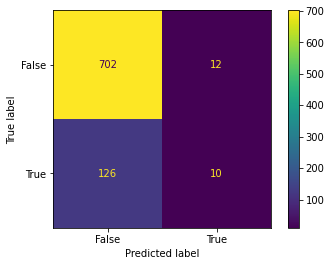

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h19_test_raw['cat_bin_actual']
predicted = h19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.8376470588235294

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.45454545454545453

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.07352941176470588

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.9831932773109243

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.12658227848101267

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.8376470588235294, 'Precision': 0.45454545454545453, 'Sensitivity_recall': 0.07352941176470588, 'Specificity': 0.9831932773109243, 'F1_score': 0.12658227848101267}


### TEST H2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h20_model_topics[['Topic','Name']]
df1

Topic                                     Name
0     -1                -1_arsch_scheiß_halt_pack
1      0              0_porno_arsch_gratis_frauen
2      1   1_deutsche_nazis_deutschland_deutschen
3      2               2_grünen_grüne_grün_linken
4      3        3_politiker_politik_brauchen_dumm
5      4        4_islam_moslems_religion_kopftuch
6      5  5_medien_journalisten_grünen_staatsfunk
7      6            6_retweet_tweet_hashtag_magst
8      7              7_bus_auto_wegfahren_blinkt

In [ ]:
h19_test_pred_values_true_pos['Topic'] = h19_test_pred_values_true_pos.index
h19_test_pred_values_true_pos

pred  percent  Topic
 1     4     40.0      1
-1     4     40.0     -1
 4     1     10.0      4
 3     1     10.0      3

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH19TP', 'percent':'%H19TP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_pos['Topic'] = h19_test_pred_values_false_pos.index
h19_test_pred_values_false_pos

pred    percent  Topic
-1     7  58.333333     -1
 0     3  25.000000      0
 1     2  16.666667      1

In [ ]:
df3 = h19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH19FP', 'percent':'%H19FP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_true_neg['Topic'] = h19_test_pred_values_true_neg.index
h19_test_pred_values_true_neg

pred    percent  Topic
-1   314  44.729345     -1
 0   165  23.504274      0
 1   152  21.652422      1
 3    22   3.133903      3
 2    18   2.564103      2
 4    10   1.424501      4
 6     9   1.282051      6
 5     9   1.282051      5
 7     3   0.427350      7

In [ ]:
df4 = h19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH19TN', 'percent':'%H19TN', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_neg['Topic'] = h19_test_pred_values_false_neg.index
h19_test_pred_values_false_neg

pred    percent  Topic
-1    58  46.031746     -1
 1    35  27.777778      1
 0    16  12.698413      0
 3     8   6.349206      3
 2     3   2.380952      2
 4     3   2.380952      4
 6     2   1.587302      6
 5     1   0.793651      5

In [ ]:
df5 = h19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH19FN', 'percent':'%H19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']] = df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H19', '%H19','%H19', '%H20']]
#df_to_round = df_to_round[['%H19', '%H19','%H19', '%H20']].round(2)
#df_to_round

Topic                                     Name predH19TP  %H19TP predH19FP  \
0     -1                -1_arsch_scheiß_halt_pack       4.0    40.0       7.0   
1      0              0_porno_arsch_gratis_frauen         0     0.0       3.0   
2      1   1_deutsche_nazis_deutschland_deutschen       4.0    40.0       2.0   
3      2               2_grünen_grüne_grün_linken         0     0.0         0   
4      3        3_politiker_politik_brauchen_dumm       1.0    10.0         0   
5      4        4_islam_moslems_religion_kopftuch       1.0    10.0         0   
6      5  5_medien_journalisten_grünen_staatsfunk         0     0.0         0   
7      6            6_retweet_tweet_hashtag_magst         0     0.0         0   
8      7              7_bus_auto_wegfahren_blinkt         0     0.0         0   

   %H19FP  predH19TN  %H19TN predH19FN  %H19FN  
0   58.33        314   44.73      58.0   46.03  
1   25.00        165   23.50      16.0   12.70  
2   16.67        152   21.65      35.0   27.78  
3    0.00         18    2.56       3.0    2.38  
4    0.00         22    3.13       8.0    6.35  
5    0.00         10    1.42       3.0    2.38  
6    0.00          9    1.28       1.0    0.79  
7    0.00          9    1.28       2.0    1.59  
8    0.00          3    0.43         0    0.00

In [ ]:
df_merged

Topic                                     Name predH19TP  %H19TP predH19FP  \
0     -1                -1_arsch_scheiß_halt_pack       4.0    40.0       7.0   
1      0              0_porno_arsch_gratis_frauen         0     0.0       3.0   
2      1   1_deutsche_nazis_deutschland_deutschen       4.0    40.0       2.0   
3      2               2_grünen_grüne_grün_linken         0     0.0         0   
4      3        3_politiker_politik_brauchen_dumm       1.0    10.0         0   
5      4        4_islam_moslems_religion_kopftuch       1.0    10.0         0   
6      5  5_medien_journalisten_grünen_staatsfunk         0     0.0         0   
7      6            6_retweet_tweet_hashtag_magst         0     0.0         0   
8      7              7_bus_auto_wegfahren_blinkt         0     0.0         0   

   %H19FP  predH19TN  %H19TN predH19FN  %H19FN  
0   58.33        314   44.73      58.0   46.03  
1   25.00        165   23.50      16.0   12.70  
2   16.67        152   21.65      35.0   27.78  
3    0.00         18    2.56       3.0    2.38  
4    0.00         22    3.13       8.0    6.35  
5    0.00         10    1.42       3.0    2.38  
6    0.00          9    1.28       1.0    0.79  
7    0.00          9    1.28       2.0    1.59  
8    0.00          3    0.43         0    0.00

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH19TP": int, "predH19TN":int, "predH19FP":int, "predH19FN":int})
df_merged

Topic                                     Name  predH19TP  %H19TP  \
0     -1                -1_arsch_scheiß_halt_pack          4    40.0   
1      0              0_porno_arsch_gratis_frauen          0     0.0   
2      1   1_deutsche_nazis_deutschland_deutschen          4    40.0   
3      2               2_grünen_grüne_grün_linken          0     0.0   
4      3        3_politiker_politik_brauchen_dumm          1    10.0   
5      4        4_islam_moslems_religion_kopftuch          1    10.0   
6      5  5_medien_journalisten_grünen_staatsfunk          0     0.0   
7      6            6_retweet_tweet_hashtag_magst          0     0.0   
8      7              7_bus_auto_wegfahren_blinkt          0     0.0   

   predH19FP  %H19FP  predH19TN  %H19TN  predH19FN  %H19FN  
0          7   58.33        314   44.73         58   46.03  
1          3   25.00        165   23.50         16   12.70  
2          2   16.67        152   21.65         35   27.78  
3          0    0.00         18    2.56          3    2.38  
4          0    0.00         22    3.13          8    6.35  
5          0    0.00         10    1.42          3    2.38  
6          0    0.00          9    1.28          1    0.79  
7          0    0.00          9    1.28          2    1.59  
8          0    0.00          3    0.43          0    0.00

In [ ]:
df_percent = df_merged[['Topic','%H19TP', '%H19TN','%H19FP', '%H19FN','Name']]
df_percent

Topic  %H19TP  %H19TN  %H19FP  %H19FN  \
0     -1    40.0   44.73   58.33   46.03   
1      0     0.0   23.50   25.00   12.70   
2      1    40.0   21.65   16.67   27.78   
3      2     0.0    2.56    0.00    2.38   
4      3    10.0    3.13    0.00    6.35   
5      4    10.0    1.42    0.00    2.38   
6      5     0.0    1.28    0.00    0.79   
7      6     0.0    1.28    0.00    1.59   
8      7     0.0    0.43    0.00    0.00   

                                      Name  
0                -1_arsch_scheiß_halt_pack  
1              0_porno_arsch_gratis_frauen  
2   1_deutsche_nazis_deutschland_deutschen  
3               2_grünen_grüne_grün_linken  
4        3_politiker_politik_brauchen_dumm  
5        4_islam_moslems_religion_kopftuch  
6  5_medien_journalisten_grünen_staatsfunk  
7            6_retweet_tweet_hashtag_magst  
8              7_bus_auto_wegfahren_blinkt

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

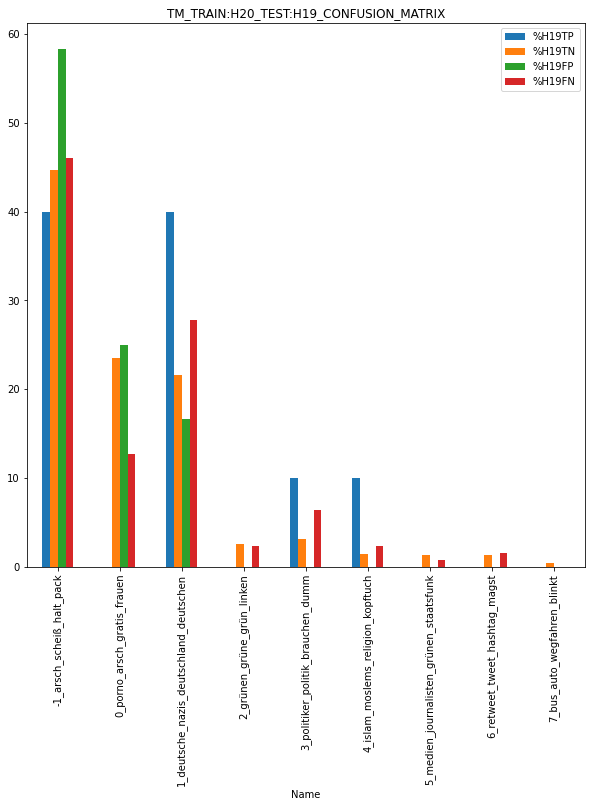

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX.plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:H19_CONFUSION_MATRIX")

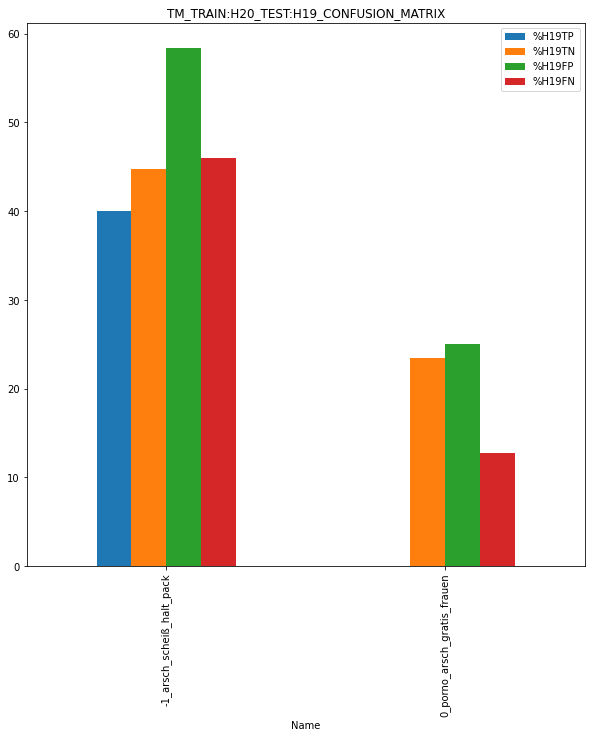

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:H19_CONFUSION_MATRIX")

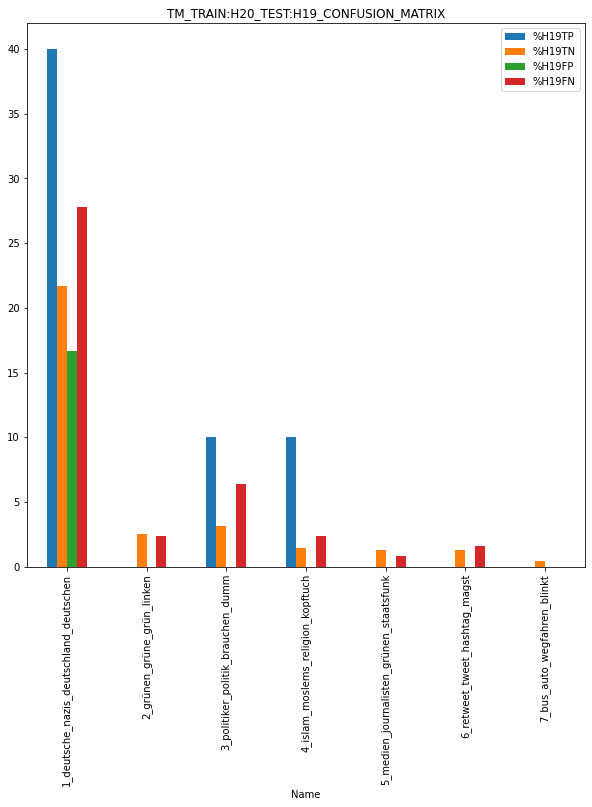

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:H19_CONFUSION_MATRIX")

In [ ]:
#test_h19_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:H20_TEST:H19_CONFUSION_MATRIX")

### Test H2020

In [ ]:
train_h20_class_h20 = pd.read_csv('/content/submission_DE_A_HASOCOne_HASOC2020.csv')
train_h20_class_h20

tweet_id task1                  ID
0    1129095874242650112   NOT  hasoc_2020_de_1053
1    1129004308396236800   NOT   hasoc_2020_de_671
2    1130896929355907080   NOT  hasoc_2020_de_2977
3    1132251534329307136   NOT  hasoc_2020_de_1746
4    1124941869115498496   NOT  hasoc_2020_de_2416
..                   ...   ...                 ...
521  1124809878546128897   HOF   hasoc_2020_de_486
522  1132433240000798720   NOT  hasoc_2020_de_3388
523  1127366294255357958   NOT  hasoc_2020_de_2745
524  1124362090460975105   NOT   hasoc_2020_de_236
525  1131487097293103104   NOT  hasoc_2020_de_2850

[526 rows x 3 columns]

In [ ]:
h20_test_class_values = pd.DataFrame(train_h20_class_h20['task1'].value_counts())
h20_test_class_values

task1
NOT    383
HOF    143

In [ ]:

h20_test_raw['class'] = train_h20_class_h20['task1']
h20_test_raw

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred class  
0    hasoc_2020_de_1053    -1   NOT  
1     hasoc_2020_de_671     0   NOT  
2    hasoc_2020_de_2977    -1   NOT  
3    hasoc_2020_de_1746    -1   NOT  
4    hasoc_2020_de_2416    -1   NOT  
..                  ...   ...   ...  
521   hasoc_2020_de_486     0   HOF  
522  hasoc_2020_de_3388     2   NOT  
523  hasoc_2020_de_2745     1   NOT  
524   hasoc_2020_de_236     0   NOT  
525  hasoc_2020_de_2850     2   NOT  

[526 rows x 8 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h20_test_true_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 'HOF')]
h20_test_true_pos

Unnamed: 0             tweet_id  \
6             6  1123981478361219073   
17           17  1126089577486323712   
21           21  1134130242786926592   
22           22  1134444350027509766   
25           25  1131517942175289344   
..          ...                  ...   
496         496  1131274676741836800   
500         500  1128321203075256320   
508         508  1129379774076473344   
511         511  1130096161212252162   
512         512  1124842568972288000   

                                                  text task1 task2  \
6    @yooli_derechte @MontanaBlack Mich wundert es ...   HOF  OFFN   
17   RT @CWBWElias: @TheresaGesperrt Wollte meine N...   HOF  PRFN   
21   @sgepeeti Verdursten ist aber auch ein scheiß ...   HOF  PRFN   
22                 Scheiß. Hurensohn gam @FortniteGame   HOF  PRFN   
25   RT @Symon634: Ich ficke deine enkeltochter du ...   HOF  PRFN   
..                                                 ...   ...   ...   
496  RT @can65schalke: „Göt“ ist türkisch und heißt...   HOF  PRFN   
500                         @VizzionsXI halt dein maul   HOF  OFFN   
508                       Halt die fresse du hurensohn   HOF  PRFN   
511         @noelmgb_ @Sebbe2704 Richtiger Hurensohn 😂   HOF  PRFN   
512  Der Bass ist tief, die Atmosphäre sehr entspan...   HOF  PRFN   

                     ID  pred class  
6    hasoc_2020_de_2938    -1   HOF  
17   hasoc_2020_de_2545    -1   HOF  
21   hasoc_2020_de_1235     0   HOF  
22   hasoc_2020_de_2487     0   HOF  
25   hasoc_2020_de_2382     0   HOF  
..                  ...   ...   ...  
496  hasoc_2020_de_1993     0   HOF  
500  hasoc_2020_de_1958     0   HOF  
508  hasoc_2020_de_2465     0   HOF  
511   hasoc_2020_de_958     0   HOF  
512  hasoc_2020_de_2470    -1   HOF  

[100 rows x 8 columns]

In [ ]:
h20_test_pred_values_true_pos = pd.DataFrame(h20_test_true_pos['pred'].value_counts())
h20_test_pred_values_true_pos['percent'] = (h20_test_pred_values_true_pos['pred'] / h20_test_pred_values_true_pos['pred'].sum()) * 100
h20_test_pred_values_true_pos

pred  percent
 0    56     56.0
-1    35     35.0
 1     4      4.0
 3     2      2.0
 2     2      2.0
 6     1      1.0

In [ ]:
h20_test_false_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 'HOF')]
h20_test_false_pos

Unnamed: 0             tweet_id  \
20           20  1129770037290708992   
23           23  1131658451371864064   
29           29  1125995239200710661   
36           36  1134052321015554048   
44           44  1123961328907976711   
46           46  1134450297575825408   
51           51  1134603335124901889   
79           79  1128883487283527680   
91           91  1124239105074835456   
101         101  1126911531063619586   
107         107  1124749757392531456   
125         125  1129112609511366658   
127         127  1127954864183676929   
128         128  1124004148549246982   
130         130  1126839556781826048   
136         136  1131613672974028801   
144         144  1129316461061857280   
148         148  1129729230902824960   
157         157  1127363349870673926   
171         171  1129441363236409345   
200         200  1124066777909145601   
210         210  1131717423273582592   
216         216  1132333700753055744   
234         234  1130849416271654912   
237         237  1130051500250750977   
275         275  1131582098270302208   
297         297  1124743692454113280   
307         307  1125055937415454721   
343         343  1132922828523745280   
351         351  1130224649516855296   
364         364  1123929376708538368   
366         366  1127309721508220929   
374         374  1125703122687614979   
377         377  1125720873015611392   
378         378  1126219605108776960   
385         385  1131555326015266817   
404         404  1128768500426784771   
420         420  1124968024790978561   
439         439  1126865968335065088   
443         443  1132644280579887104   
469         469  1131493820758142977   
509         509  1124686842840981505   
521         521  1124809878546128897   

                                                  text task1 task2  \
20   Wäre ich froh, wenn die scheiß Saison schon vo...   NOT  NONE   
23   Was haben Almans fürn Problem mit #gntm? Schau...   NOT  NONE   
29   @NicolasJanzen Och ne nicht am arsch der Welt ...   NOT  NONE   
36      @AmIFabNow ASHIE! DU BIST SO FIES DER ARME TYP   NOT  NONE   
44   @robdoubleyoo @mialleixa34 Idiot! Hitler was v...   NOT  NONE   
46   RT @master_dlx: So ihr Lieben! Jetzt gibts mal...   NOT  NONE   
51   Ich hab' ja schon viel scheiß durch, mit meine...   NOT  NONE   
79   RT @Fern_Schreiber: "In meiner Klasse warn hal...   NOT  NONE   
91   @FliegenderElf Er ist der süßeste einfach und ...   NOT  NONE   
101  @_fakuum Jedem das seine\nIch hör halt eher so...   NOT  NONE   
107  RT @NebelNiek: Der Kopf will schlafen 😴🛏️🌙 abe...   NOT  NONE   
125  RT @lanaaloveless: Aber eher auf dem Gesicht n...   NOT  NONE   
127  RT @Ninchen_ohne_Ka: Du merkst, dass du am Ars...   NOT  NONE   
128  @FrauElo ein sempfglas! wie damals, bei meiner...   NOT  NONE   
130  @drunkenraindrop Ich hab gefragt ob du dumm bist?   NOT  NONE   
136  Man redet den ganzen Tag nicht soviel, quak qu...   NOT  NONE   
144  RT @NaechsteRunde: Ja, die hab ich mal gewählt...   NOT  NONE   
148  RT @Adele66661: @SirSchnee Das Schreddern von ...   NOT  NONE   
157  RT @mimini97: @claudia_kade @welt Der Islam is...   NOT  NONE   
171  wie fancy sich deutsche immer vorkommen, wenn ...   NOT  NONE   
200                               @demutsch Arsch? 🤔🤔🤔   NOT  NONE   
210  fetter arsch fickt deutsche gynkologe porno po...   NOT  NONE   
216  RT @chrisJcsgo: @fazeniko @ESLCS Thanks mit de...   NOT  NONE   
234  unsere Kinder + Enkel @watch_union @FridayForF...   NOT  NONE   
237     @MerleTheWizard JA DANN BEWEG DEINEN ARSCH MAN   NOT  NONE   
275  RT @katharinalotter: Genial. Mit Trigger-Warnu...   NOT  NONE   
297  Ich sehe schon das dumme arrogante Grinsen der...   NOT  NONE   
307      @SawsanChebli Hat dir dein Papi Maas geholfen   NOT  NONE   
343  RT @IQ_Stimulator: Die Linken haben es geschaf...   NOT  NONE   
351                        Warum bin ich so dumm junge   NOT  NONE   
364  RT @DrThomasBruns: Wo sind unsere linken Femin...   NOT  NONE   
366 

In [ ]:
h20_test_pred_values_false_pos = pd.DataFrame(h20_test_false_pos['pred'].value_counts())
h20_test_pred_values_false_pos['percent'] = (h20_test_pred_values_false_pos['pred'] / h20_test_pred_values_false_pos['pred'].sum()) * 100
h20_test_pred_values_false_pos

pred    percent
-1    18  41.860465
 0    15  34.883721
 1     8  18.604651
 2     1   2.325581
 4     1   2.325581

In [ ]:
h20_test_true_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 'NOT')]
h20_test_true_neg

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
520         520  1123589659047731201   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
520        Einfach einladend 😉 https://t.co/kRHAoshmxY   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred class  
0    hasoc_2020_de_1053    -1   NOT  
1     hasoc_2020_de_671     0   NOT  
2    hasoc_2020_de_2977    -1   NOT  
3    hasoc_2020_de_1746    -1   NOT  
4    hasoc_2020_de_2416    -1   NOT  
..                  ...   ...   ...  
520  hasoc_2020_de_2794     0   NOT  
522  hasoc_2020_de_3388     2   NOT  
523  hasoc_2020_de_2745     1   NOT  
524   hasoc_2020_de_236     0   NOT  
525  hasoc_2020_de_2850     2   NOT  

[322 rows x 8 columns]

In [ ]:
h20_test_pred_values_true_neg = pd.DataFrame(h20_test_true_neg['pred'].value_counts())
h20_test_pred_values_true_neg['percent'] = (h20_test_pred_values_true_neg['pred'] / h20_test_pred_values_true_neg['pred'].sum()) * 100
h20_test_pred_values_true_neg

pred    percent
-1   119  36.956522
 0    89  27.639752
 1    69  21.428571
 2    27   8.385093
 4    11   3.416149
 3     5   1.552795
 5     2   0.621118

In [ ]:
h20_test_false_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 'NOT')]
h20_test_false_neg

Unnamed: 0             tweet_id  \
5             5  1129712298531184641   
24           24  1124210944534614016   
35           35  1132234136364769280   
37           37  1129807773473091586   
43           43  1132986556778733569   
..          ...                  ...   
485         485  1132868847797710853   
492         492  1130047717005242371   
497         497  1134619244107370496   
498         498  1129818645109116928   
517         517  1124379312264708101   

                                                  text task1 task2  \
5    RT @VonSchwer: Ein guter Patriot geht von Bord...   HOF  OFFN   
24   @HyperBushido fr ich streu den scheiß überall ...   HOF  PRFN   
35   @IslamiQde Der #Islam gehört nicht zu Deutschl...   HOF  HATE   
37   @PandabrchenThe1 Keine Ahnung, die sind richti...   HOF  PRFN   
43   @Julia42833681 @eva_leisner @SPIEGELONLINE Als...   HOF  HATE   
..                                                 ...   ...   ...   
485  @RablPeter Genau deswegen ist die #ÖVP erfolgr...   HOF  HATE   
492  @Ralf_Stegner obacht ralle!\ndumm und korrupt ...   HOF  HATE   
497  RT @maxotte_says: #Harvard war mal eine #Elite...   HOF  OFFN   
498  @ChHuegel @ManfredWeber Man kann doch den über...   HOF  HATE   
517  RT @theunwantedpath: HABT IHR DEN ARSCH OFFEN ...   HOF  PRFN   

                     ID  pred class  
5    hasoc_2020_de_1112    -1   NOT  
24   hasoc_2020_de_1691     0   NOT  
35   hasoc_2020_de_1850     1   NOT  
37    hasoc_2020_de_675     0   NOT  
43   hasoc_2020_de_2132     2   NOT  
..                  ...   ...   ...  
485  hasoc_2020_de_2258     0   NOT  
492  hasoc_2020_de_2676    -1   NOT  
497  hasoc_2020_de_1606    -1   NOT  
498  hasoc_2020_de_2580     2   NOT  
517   hasoc_2020_de_986    -1   NOT  

[61 rows x 8 columns]

In [ ]:
h20_test_pred_values_false_neg = pd.DataFrame(h20_test_false_neg['pred'].value_counts())
h20_test_pred_values_false_neg['percent'] = (h20_test_pred_values_false_neg['pred'] / h20_test_pred_values_false_neg['pred'].sum()) * 100
h20_test_pred_values_false_neg

pred    percent
-1    29  47.540984
 0    16  26.229508
 1     7  11.475410
 2     5   8.196721
 4     2   3.278689
 3     2   3.278689

In [ ]:
h20_test_raw['cat_bin_actual'] = h20_test_raw['task1'].map({'HOF': 1, 'NOT': 0}).astype(int)
h20_test_raw['cat_bin_predicted'] = h20_test_raw['class'].map({'HOF': 1, 'NOT': 0}).astype(int)


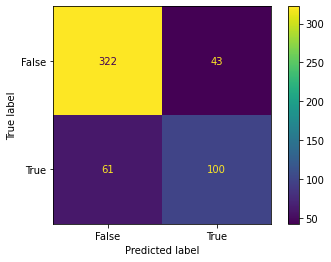

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h20_test_raw['cat_bin_actual']
predicted = h20_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.8022813688212928

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.6993006993006993

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.6211180124223602

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.8821917808219178

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.6578947368421052

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.8022813688212928, 'Precision': 0.6993006993006993, 'Sensitivity_recall': 0.6211180124223602, 'Specificity': 0.8821917808219178, 'F1_score': 0.6578947368421052}


### TEST H2020 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h20_model_topics[['Topic','Name']]
df1

Topic                                     Name
0     -1                -1_arsch_scheiß_halt_pack
1      0              0_porno_arsch_gratis_frauen
2      1   1_deutsche_nazis_deutschland_deutschen
3      2               2_grünen_grüne_grün_linken
4      3        3_politiker_politik_brauchen_dumm
5      4        4_islam_moslems_religion_kopftuch
6      5  5_medien_journalisten_grünen_staatsfunk
7      6            6_retweet_tweet_hashtag_magst
8      7              7_bus_auto_wegfahren_blinkt

In [ ]:
h20_test_pred_values_true_pos['Topic'] = h20_test_pred_values_true_pos.index
h20_test_pred_values_true_pos

pred  percent  Topic
 0    56     56.0      0
-1    35     35.0     -1
 1     4      4.0      1
 3     2      2.0      3
 2     2      2.0      2
 6     1      1.0      6

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h20_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH20TP', 'percent':'%H20TP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_pos['Topic'] = h20_test_pred_values_false_pos.index
h20_test_pred_values_false_pos

pred    percent  Topic
-1    18  41.860465     -1
 0    15  34.883721      0
 1     8  18.604651      1
 2     1   2.325581      2
 4     1   2.325581      4

In [ ]:
df3 = h20_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH20FP', 'percent':'%H20FP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_true_neg['Topic'] = h20_test_pred_values_true_neg.index
h20_test_pred_values_true_neg

pred    percent  Topic
-1   119  36.956522     -1
 0    89  27.639752      0
 1    69  21.428571      1
 2    27   8.385093      2
 4    11   3.416149      4
 3     5   1.552795      3
 5     2   0.621118      5

In [ ]:
df4 = h20_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH20TN', 'percent':'%H20TN', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_neg['Topic'] = h20_test_pred_values_false_neg.index
h20_test_pred_values_false_neg

pred    percent  Topic
-1    29  47.540984     -1
 0    16  26.229508      0
 1     7  11.475410      1
 2     5   8.196721      2
 4     2   3.278689      4
 3     2   3.278689      3

In [ ]:
df5 = h20_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH20FN', 'percent':'%H20FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']] = df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H20', '%H20','%H20', '%H20']]
#df_to_round = df_to_round[['%H20', '%H20','%H20', '%H20']].round(2)
#df_to_round

Topic                                     Name predH20TP  %H20TP predH20FP  \
0     -1                -1_arsch_scheiß_halt_pack      35.0    35.0      18.0   
1      0              0_porno_arsch_gratis_frauen      56.0    56.0      15.0   
2      1   1_deutsche_nazis_deutschland_deutschen       4.0     4.0       8.0   
3      2               2_grünen_grüne_grün_linken       2.0     2.0       1.0   
4      3        3_politiker_politik_brauchen_dumm       2.0     2.0         0   
5      4        4_islam_moslems_religion_kopftuch         0     0.0       1.0   
6      5  5_medien_journalisten_grünen_staatsfunk         0     0.0         0   
7      6            6_retweet_tweet_hashtag_magst       1.0     1.0         0   
8      7              7_bus_auto_wegfahren_blinkt         0     0.0         0   

   %H20FP predH20TN  %H20TN predH20FN  %H20FN  
0   41.86     119.0   36.96      29.0   47.54  
1   34.88      89.0   27.64      16.0   26.23  
2   18.60      69.0   21.43       7.0   11.48  
3    2.33      27.0    8.39       5.0    8.20  
4    0.00       5.0    1.55       2.0    3.28  
5    2.33      11.0    3.42       2.0    3.28  
6    0.00       2.0    0.62         0    0.00  
7    0.00         0    0.00         0    0.00  
8    0.00         0    0.00         0    0.00

In [ ]:
df_merged

Topic                                     Name predH20TP  %H20TP predH20FP  \
0     -1                -1_arsch_scheiß_halt_pack      35.0    35.0      18.0   
1      0              0_porno_arsch_gratis_frauen      56.0    56.0      15.0   
2      1   1_deutsche_nazis_deutschland_deutschen       4.0     4.0       8.0   
3      2               2_grünen_grüne_grün_linken       2.0     2.0       1.0   
4      3        3_politiker_politik_brauchen_dumm       2.0     2.0         0   
5      4        4_islam_moslems_religion_kopftuch         0     0.0       1.0   
6      5  5_medien_journalisten_grünen_staatsfunk         0     0.0         0   
7      6            6_retweet_tweet_hashtag_magst       1.0     1.0         0   
8      7              7_bus_auto_wegfahren_blinkt         0     0.0         0   

   %H20FP predH20TN  %H20TN predH20FN  %H20FN  
0   41.86     119.0   36.96      29.0   47.54  
1   34.88      89.0   27.64      16.0   26.23  
2   18.60      69.0   21.43       7.0   11.48  
3    2.33      27.0    8.39       5.0    8.20  
4    0.00       5.0    1.55       2.0    3.28  
5    2.33      11.0    3.42       2.0    3.28  
6    0.00       2.0    0.62         0    0.00  
7    0.00         0    0.00         0    0.00  
8    0.00         0    0.00         0    0.00

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH20TP": int, "predH20TN":int, "predH20FP":int, "predH20FN":int})
df_merged

Topic                                     Name  predH20TP  %H20TP  \
0     -1                -1_arsch_scheiß_halt_pack         35    35.0   
1      0              0_porno_arsch_gratis_frauen         56    56.0   
2      1   1_deutsche_nazis_deutschland_deutschen          4     4.0   
3      2               2_grünen_grüne_grün_linken          2     2.0   
4      3        3_politiker_politik_brauchen_dumm          2     2.0   
5      4        4_islam_moslems_religion_kopftuch          0     0.0   
6      5  5_medien_journalisten_grünen_staatsfunk          0     0.0   
7      6            6_retweet_tweet_hashtag_magst          1     1.0   
8      7              7_bus_auto_wegfahren_blinkt          0     0.0   

   predH20FP  %H20FP  predH20TN  %H20TN  predH20FN  %H20FN  
0         18   41.86        119   36.96         29   47.54  
1         15   34.88         89   27.64         16   26.23  
2          8   18.60         69   21.43          7   11.48  
3          1    2.33         27    8.39          5    8.20  
4          0    0.00          5    1.55          2    3.28  
5          1    2.33         11    3.42          2    3.28  
6          0    0.00          2    0.62          0    0.00  
7          0    0.00          0    0.00          0    0.00  
8          0    0.00          0    0.00          0    0.00

In [ ]:
df_percent = df_merged[['Topic','%H20TP', '%H20TN','%H20FP', '%H20FN','Name']]
df_percent

Topic  %H20TP  %H20TN  %H20FP  %H20FN  \
0     -1    35.0   36.96   41.86   47.54   
1      0    56.0   27.64   34.88   26.23   
2      1     4.0   21.43   18.60   11.48   
3      2     2.0    8.39    2.33    8.20   
4      3     2.0    1.55    0.00    3.28   
5      4     0.0    3.42    2.33    3.28   
6      5     0.0    0.62    0.00    0.00   
7      6     1.0    0.00    0.00    0.00   
8      7     0.0    0.00    0.00    0.00   

                                      Name  
0                -1_arsch_scheiß_halt_pack  
1              0_porno_arsch_gratis_frauen  
2   1_deutsche_nazis_deutschland_deutschen  
3               2_grünen_grüne_grün_linken  
4        3_politiker_politik_brauchen_dumm  
5        4_islam_moslems_religion_kopftuch  
6  5_medien_journalisten_grünen_staatsfunk  
7            6_retweet_tweet_hashtag_magst  
8              7_bus_auto_wegfahren_blinkt

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

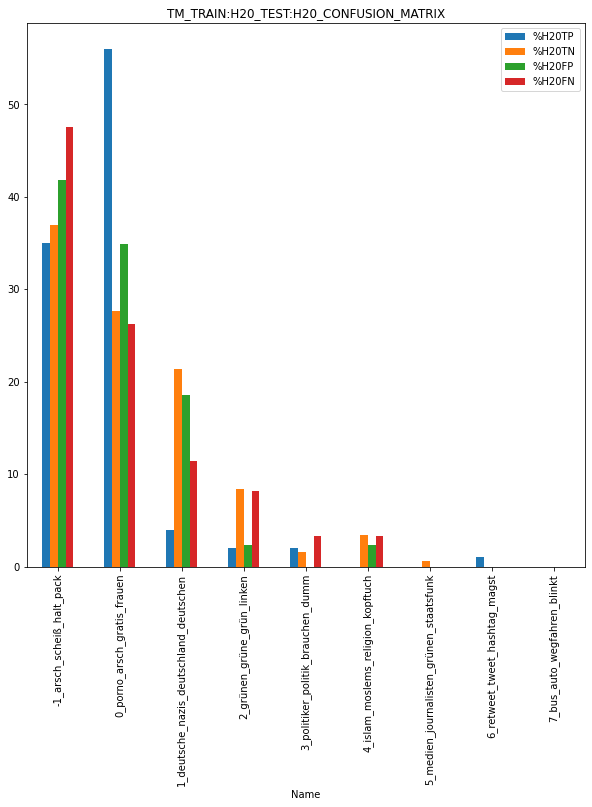

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX.plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:H20_CONFUSION_MATRIX")

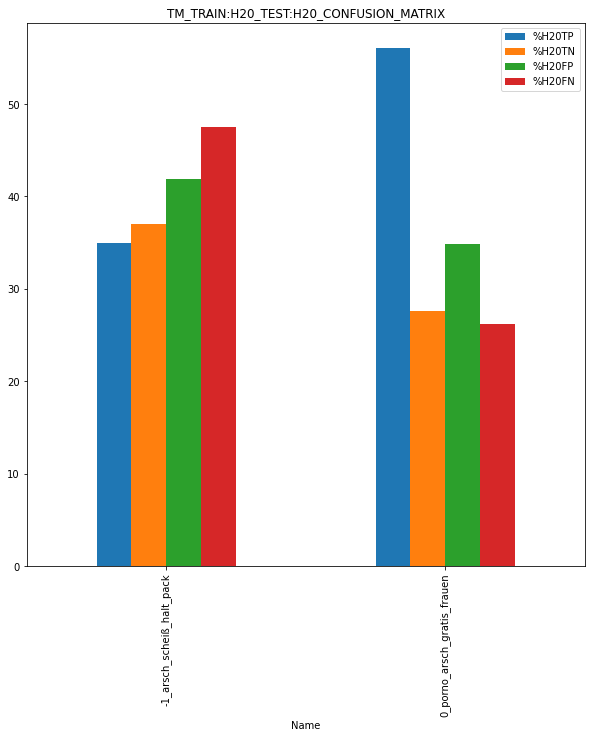

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:H20_CONFUSION_MATRIX")

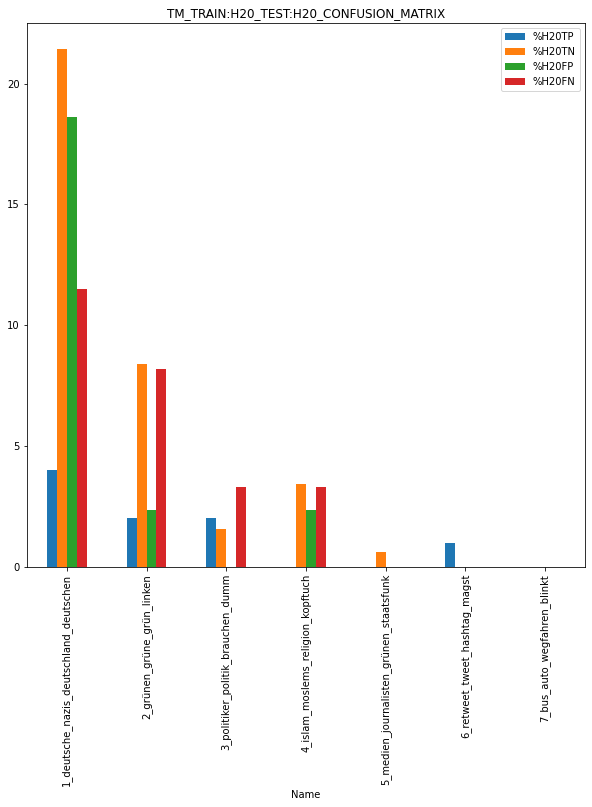

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:H20_CONFUSION_MATRIX")

In [ ]:
#test_h20_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:H20_TEST:H20_CONFUSION_MATRIX")

## Klassifikation ML_Geeks, trainiert auf HASOC2020

### Test GE2018

In [ ]:
train_h20_class_ge18 = pd.read_csv('/content/NSIT_Train_HASOC2020_Test_GermEval2018_Task_A_submission_DE_A.csv')
train_h20_class_ge18


task1
0         0
1         1
2         1
3         1
4         1
...     ...
3527      1
3528      1
3529      1
3530      1
3531      1

[3532 rows x 1 columns]

In [ ]:
train_h20_class_ge18['task1'] = train_h20_class_ge18['task1'].map({0: 1, 1: 0}).astype(int)
train_h20_class_ge18

task1
0         1
1         0
2         0
3         0
4         0
...     ...
3527      0
3528      0
3529      0
3530      0
3531      0

[3532 rows x 1 columns]

In [ ]:
ge18_test_class_values = pd.DataFrame(train_h20_class_ge18['task1'].value_counts())
ge18_test_class_values

task1
0   3037
1    495

In [ ]:
ge18_test_class_values['task1']

0    3037
1     495
Name: task1, dtype: int64

In [ ]:
ge18_test_raw['class'] = train_h20_class_ge18['task1']
ge18_test_raw

TWEET      OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...    OTHER  OTHER     0   
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...    OTHER  OTHER     4   
2     #Merkel rollt dem Emir von #Katar, der islamis...    OTHER  OTHER    -1   
3     „Merle ist kein junges unschuldiges Mädchen“ K...    OTHER  OTHER     0   
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE  ABUSE     1   
...                                                 ...      ...    ...   ...   
3527  @schlabonski tja, es können einen nicht alle L...    OTHER  OTHER    -1   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE  ABUSE    -1   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE  ABUSE     0   
3530  @stephanweil was ist nun mit kostenlosen Kitas...    OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...    OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
0         1               0                  1  
1         0               0                  0  
2         0               0                  0  
3         0               0                  0  
4         0               1                  0  
...     ...             ...                ...  
3527      0               0                  0  
3528      0               1                  0  
3529      0               1                  0  
3530      0               0                  0  
3531      0               0                  0  

[3532 rows x 7 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge18_test_true_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 1)]
ge18_test_true_pos

TWEET      OFF     CAT  \
35    der Dummschwätzer Herr #Dobrindt gehört nicht ...  OFFENSE  INSULT   
69    @Karl_Lauterbach Da erkennt man, mit was für j...  OFFENSE   ABUSE   
77    @DietmarAmann1 @Die_Gruenen @cem_oezdemir Ich ...  OFFENSE   ABUSE   
96    Terror wird durch Gegenterror beantwortet werden!  OFFENSE   ABUSE   
128           Der Abschaum regiert,die Ostküste jubelt.  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
3473  #Kanzleramtsminister #Altmaier schwitzt wie ei...  OFFENSE  INSULT   
3491  @Schminkflinte @SawsanChebli Mir doch egal, ob...  OFFENSE   ABUSE   
3497  @AfD_Support |LBR| Nur Jauche durch die Asylan...  OFFENSE   ABUSE   
3514  wie immer die Moderatorin der @AktuelleStunde ...  OFFENSE  INSULT   
3517  @Alltags_Kotze Dein Feminismus und Genderquats...  OFFENSE   ABUSE   

      pred  class  cat_bin_actual  cat_bin_predicted  
35       0      1               1                  1  
69      -1      1               1                  1  
77       2      1               1                  1  
96      -1      1               1                  1  
128     -1      1               1                  1  
...    ...    ...             ...                ...  
3473     0      1               1                  1  
3491     0      1               1                  1  
3497    -1      1               1                  1  
3514     0      1               1                  1  
3517     0      1               1                  1  

[243 rows x 7 columns]

In [ ]:
ge18_test_pred_values_true_pos = pd.DataFrame(ge18_test_true_pos['pred'].value_counts())
ge18_test_pred_values_true_pos['percent'] = (ge18_test_pred_values_true_pos['pred'] / ge18_test_pred_values_true_pos['pred'].sum()) * 100
ge18_test_pred_values_true_pos

pred    percent
-1   128  52.674897
 0    46  18.930041
 1    33  13.580247
 4    12   4.938272
 3    11   4.526749
 2    10   4.115226
 5     2   0.823045
 6     1   0.411523

In [ ]:
ge18_test_false_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 1)]
ge18_test_false_pos

TWEET    OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...  OTHER  OTHER     0   
24    Ĺièbe Freunde, die Parole muss lauten:Freiheit...  OTHER  OTHER     1   
39    Wann wird der Mensch wieder als Mensch gesehen...  OTHER  OTHER     0   
43    @Tevsa Aber mit Spinnern kann man umgehen, sol...  OTHER  OTHER    -1   
72    @ZDFWATCH @jorg_radek Schäm Dich, Leute anzupö...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
3485  Auf der #Compact-Konfernz in #Leipzig spricht ...  OTHER  OTHER    -1   
3487  @oadiakosmos @Schnubb36 @3rd_stone_f_sun @Scho...  OTHER  OTHER     1   
3494  Egal welche Partei, egal welcher Glaube, Haupt...  OTHER  OTHER     1   
3502  Ein frühes Shabbat Shalom! |LBR| (bin gleich i...  OTHER  OTHER    -1   
3520           @gabonn Wer lacht denn da so dreckig ???  OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
0         1               0                  1  
24        1               0                  1  
39        1               0                  1  
43        1               0                  1  
72        1               0                  1  
...     ...             ...                ...  
3485      1               0                  1  
3487      1               0                  1  
3494      1               0                  1  
3502      1               0                  1  
3520      1               0                  1  

[252 rows x 7 columns]

In [ ]:
ge18_test_pred_values_false_pos = pd.DataFrame(ge18_test_false_pos['pred'].value_counts())
ge18_test_pred_values_false_pos['percent'] = (ge18_test_pred_values_false_pos['pred'] / ge18_test_pred_values_false_pos['pred'].sum()) * 100
ge18_test_pred_values_false_pos

pred    percent
-1   139  55.158730
 0    50  19.841270
 1    45  17.857143
 3     6   2.380952
 6     4   1.587302
 2     4   1.587302
 5     2   0.793651
 7     1   0.396825
 4     1   0.396825

In [ ]:
ge18_test_true_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 0)]
ge18_test_true_neg

TWEET    OFF    CAT  pred  \
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...  OTHER  OTHER     4   
2     #Merkel rollt dem Emir von #Katar, der islamis...  OTHER  OTHER    -1   
3     „Merle ist kein junges unschuldiges Mädchen“ K...  OTHER  OTHER     0   
5     @_StultaMundi Die Bibel enthält ebenfalls Gese...  OTHER  OTHER    -1   
6     @Thueringen_ @Miquwarchar @Pontifex_de Man mun...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
3523  @rspctfl @everlast_fs @m8Flo @BolzAndrea @Inne...  OTHER  OTHER    -1   
3524  #Grüne bestehen auf Sanktionen gegen #Russland...  OTHER  OTHER    -1   
3527  @schlabonski tja, es können einen nicht alle L...  OTHER  OTHER    -1   
3530  @stephanweil was ist nun mit kostenlosen Kitas...  OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...  OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
1         0               0                  0  
2         0               0                  0  
3         0               0                  0  
5         0               0                  0  
6         0               0                  0  
...     ...             ...                ...  
3523      0               0                  0  
3524      0               0                  0  
3527      0               0                  0  
3530      0               0                  0  
3531      0               0                  0  

[2078 rows x 7 columns]

In [ ]:
ge18_test_pred_values_true_neg = pd.DataFrame(ge18_test_true_neg['pred'].value_counts())
ge18_test_pred_values_true_neg['percent'] = (ge18_test_pred_values_true_neg['pred'] / ge18_test_pred_values_true_neg['pred'].sum()) * 100
ge18_test_pred_values_true_neg

pred    percent
-1  1193  57.410972
 0   372  17.901829
 1   285  13.715111
 3    78   3.753609
 2    43   2.069297
 6    39   1.876805
 4    35   1.684312
 5    23   1.106833
 7    10   0.481232

In [ ]:
ge18_test_false_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 0)]
ge18_test_false_neg

TWEET      OFF     CAT  \
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE   ABUSE   
9     @FeePatzer Frauen zu einem "Ja" zu überreden, ...  OFFENSE   ABUSE   
10    @IvyandWoe Ich weiß halt, wie man Frauen zum M...  OFFENSE   ABUSE   
11     Liebe Freunde, Gauck,das Symbol des Sklaventums!  OFFENSE   ABUSE   
13    wen interessiert denn die Meinung des Außenmin...  OFFENSE  INSULT   
...                                                 ...      ...     ...   
3521  @UdoUlfkotte Hauptsache den Asylanten gehts ge...  OFFENSE   ABUSE   
3525  @ThomasMichael71 @mountainman1977 @houelle_bec...  OFFENSE   ABUSE   
3526  @SteinbachErika Ich finde AFD Wähler besser al...  OFFENSE  INSULT   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE   ABUSE   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE   ABUSE   

      pred  class  cat_bin_actual  cat_bin_predicted  
4        1      0               1                  0  
9       -1      0               1                  0  
10      -1      0               1                  0  
11      -1      0               1                  0  
13      -1      0               1                  0  
...    ...    ...             ...                ...  
3521     1      0               1                  0  
3525     1      0               1                  0  
3526     0      0               1                  0  
3528    -1      0               1                  0  
3529     0      0               1                  0  

[959 rows x 7 columns]

In [ ]:
ge18_test_pred_values_false_neg = pd.DataFrame(ge18_test_false_neg['pred'].value_counts())
ge18_test_pred_values_false_neg['percent'] = (ge18_test_pred_values_false_neg['pred'] / ge18_test_pred_values_false_neg['pred'].sum()) * 100
ge18_test_pred_values_false_neg

pred    percent
-1   520  54.223149
 0   169  17.622523
 1   167  17.413973
 4    49   5.109489
 2    24   2.502607
 3    19   1.981230
 5     9   0.938478
 7     1   0.104275
 6     1   0.104275

In [ ]:
ge18_test_raw['cat_bin_actual'] = ge18_test_raw['OFF'].map({'OTHER': 0, 'OFFENSE': 1}).astype(int)
#ge18_test_raw['cat_bin_predicted'] = ge18_test_raw['class'].map({1: 1, 0: 0}).astype(int)
ge18_test_raw['cat_bin_predicted'] = ge18_test_raw['class'].astype(int)


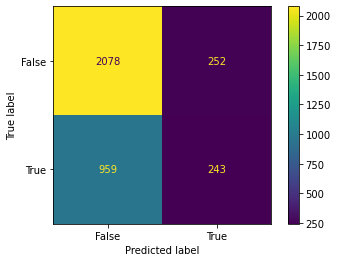

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = ge18_test_raw['cat_bin_actual']
predicted = ge18_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.6571347678369196

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.4909090909090909

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.2021630615640599

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.8918454935622318

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.2863877430760165

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.6571347678369196, 'Precision': 0.4909090909090909, 'Sensitivity_recall': 0.2021630615640599, 'Specificity': 0.8918454935622318, 'F1_score': 0.2863877430760165}


### TEST GE2018 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h20_model_topics[['Topic','Name']]
df1

Topic                                     Name
0     -1                -1_arsch_scheiß_halt_pack
1      0              0_porno_arsch_gratis_frauen
2      1   1_deutsche_nazis_deutschland_deutschen
3      2               2_grünen_grüne_grün_linken
4      3        3_politiker_politik_brauchen_dumm
5      4        4_islam_moslems_religion_kopftuch
6      5  5_medien_journalisten_grünen_staatsfunk
7      6            6_retweet_tweet_hashtag_magst
8      7              7_bus_auto_wegfahren_blinkt

In [ ]:
ge18_test_pred_values_true_pos['Topic'] = ge18_test_pred_values_true_pos.index
ge18_test_pred_values_true_pos

pred    percent  Topic
-1   128  52.674897     -1
 0    46  18.930041      0
 1    33  13.580247      1
 4    12   4.938272      4
 3    11   4.526749      3
 2    10   4.115226      2
 5     2   0.823045      5
 6     1   0.411523      6

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE18TP', 'percent':'%GE18TP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_pos['Topic'] = ge18_test_pred_values_false_pos.index
ge18_test_pred_values_false_pos

pred    percent  Topic
-1   139  55.158730     -1
 0    50  19.841270      0
 1    45  17.857143      1
 3     6   2.380952      3
 6     4   1.587302      6
 2     4   1.587302      2
 5     2   0.793651      5
 7     1   0.396825      7
 4     1   0.396825      4

In [ ]:
df3 = ge18_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE18FP', 'percent':'%GE18FP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_true_neg['Topic'] = ge18_test_pred_values_true_neg.index
ge18_test_pred_values_true_neg

pred    percent  Topic
-1  1193  57.410972     -1
 0   372  17.901829      0
 1   285  13.715111      1
 3    78   3.753609      3
 2    43   2.069297      2
 6    39   1.876805      6
 4    35   1.684312      4
 5    23   1.106833      5
 7    10   0.481232      7

In [ ]:
df4 = ge18_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE18TN', 'percent':'%GE18TN', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_neg['Topic'] = ge18_test_pred_values_false_neg.index
ge18_test_pred_values_false_neg

pred    percent  Topic
-1   520  54.223149     -1
 0   169  17.622523      0
 1   167  17.413973      1
 4    49   5.109489      4
 2    24   2.502607      2
 3    19   1.981230      3
 5     9   0.938478      5
 7     1   0.104275      7
 6     1   0.104275      6

In [ ]:
df5 = ge18_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE18FN', 'percent':'%GE18FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']] = df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']].astype(float).round(2)
df_merged
#df_to_round = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE18', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                     Name predGE18TP  %GE18TP  \
0     -1                -1_arsch_scheiß_halt_pack      128.0    52.67   
1      0              0_porno_arsch_gratis_frauen       46.0    18.93   
2      1   1_deutsche_nazis_deutschland_deutschen       33.0    13.58   
3      2               2_grünen_grüne_grün_linken       10.0     4.12   
4      3        3_politiker_politik_brauchen_dumm       11.0     4.53   
5      4        4_islam_moslems_religion_kopftuch       12.0     4.94   
6      5  5_medien_journalisten_grünen_staatsfunk        2.0     0.82   
7      6            6_retweet_tweet_hashtag_magst        1.0     0.41   
8      7              7_bus_auto_wegfahren_blinkt          0     0.00   

   predGE18FP  %GE18FP  predGE18TN  %GE18TN  predGE18FN  %GE18FN  
0         139    55.16        1193    57.41         520    54.22  
1          50    19.84         372    17.90         169    17.62  
2          45    17.86         285    13.72         167    17.41  
3           4     1.59          43     2.07          24     2.50  
4           6     2.38          78     3.75          19     1.98  
5           1     0.40          35     1.68          49     5.11  
6           2     0.79          23     1.11           9     0.94  
7           4     1.59          39     1.88           1     0.10  
8           1     0.40          10     0.48           1     0.10

In [ ]:
df_merged

Topic                                     Name predGE18TP  %GE18TP  \
0     -1                -1_arsch_scheiß_halt_pack      128.0    52.67   
1      0              0_porno_arsch_gratis_frauen       46.0    18.93   
2      1   1_deutsche_nazis_deutschland_deutschen       33.0    13.58   
3      2               2_grünen_grüne_grün_linken       10.0     4.12   
4      3        3_politiker_politik_brauchen_dumm       11.0     4.53   
5      4        4_islam_moslems_religion_kopftuch       12.0     4.94   
6      5  5_medien_journalisten_grünen_staatsfunk        2.0     0.82   
7      6            6_retweet_tweet_hashtag_magst        1.0     0.41   
8      7              7_bus_auto_wegfahren_blinkt          0     0.00   

   predGE18FP  %GE18FP  predGE18TN  %GE18TN  predGE18FN  %GE18FN  
0         139    55.16        1193    57.41         520    54.22  
1          50    19.84         372    17.90         169    17.62  
2          45    17.86         285    13.72         167    17.41  
3           4     1.59          43     2.07          24     2.50  
4           6     2.38          78     3.75          19     1.98  
5           1     0.40          35     1.68          49     5.11  
6           2     0.79          23     1.11           9     0.94  
7           4     1.59          39     1.88           1     0.10  
8           1     0.40          10     0.48           1     0.10

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE18TP": int, "predGE18TN":int, "predGE18FP":int, "predGE18FN":int})
df_merged

Topic                                     Name  predGE18TP  %GE18TP  \
0     -1                -1_arsch_scheiß_halt_pack         128    52.67   
1      0              0_porno_arsch_gratis_frauen          46    18.93   
2      1   1_deutsche_nazis_deutschland_deutschen          33    13.58   
3      2               2_grünen_grüne_grün_linken          10     4.12   
4      3        3_politiker_politik_brauchen_dumm          11     4.53   
5      4        4_islam_moslems_religion_kopftuch          12     4.94   
6      5  5_medien_journalisten_grünen_staatsfunk           2     0.82   
7      6            6_retweet_tweet_hashtag_magst           1     0.41   
8      7              7_bus_auto_wegfahren_blinkt           0     0.00   

   predGE18FP  %GE18FP  predGE18TN  %GE18TN  predGE18FN  %GE18FN  
0         139    55.16        1193    57.41         520    54.22  
1          50    19.84         372    17.90         169    17.62  
2          45    17.86         285    13.72         167    17.41  
3           4     1.59          43     2.07          24     2.50  
4           6     2.38          78     3.75          19     1.98  
5           1     0.40          35     1.68          49     5.11  
6           2     0.79          23     1.11           9     0.94  
7           4     1.59          39     1.88           1     0.10  
8           1     0.40          10     0.48           1     0.10

In [ ]:
df_percent = df_merged[['Topic','%GE18TP', '%GE18TN','%GE18FP', '%GE18FN','Name']]
df_percent

Topic  %GE18TP  %GE18TN  %GE18FP  %GE18FN  \
0     -1    52.67    57.41    55.16    54.22   
1      0    18.93    17.90    19.84    17.62   
2      1    13.58    13.72    17.86    17.41   
3      2     4.12     2.07     1.59     2.50   
4      3     4.53     3.75     2.38     1.98   
5      4     4.94     1.68     0.40     5.11   
6      5     0.82     1.11     0.79     0.94   
7      6     0.41     1.88     1.59     0.10   
8      7     0.00     0.48     0.40     0.10   

                                      Name  
0                -1_arsch_scheiß_halt_pack  
1              0_porno_arsch_gratis_frauen  
2   1_deutsche_nazis_deutschland_deutschen  
3               2_grünen_grüne_grün_linken  
4        3_politiker_politik_brauchen_dumm  
5        4_islam_moslems_religion_kopftuch  
6  5_medien_journalisten_grünen_staatsfunk  
7            6_retweet_tweet_hashtag_magst  
8              7_bus_auto_wegfahren_blinkt

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

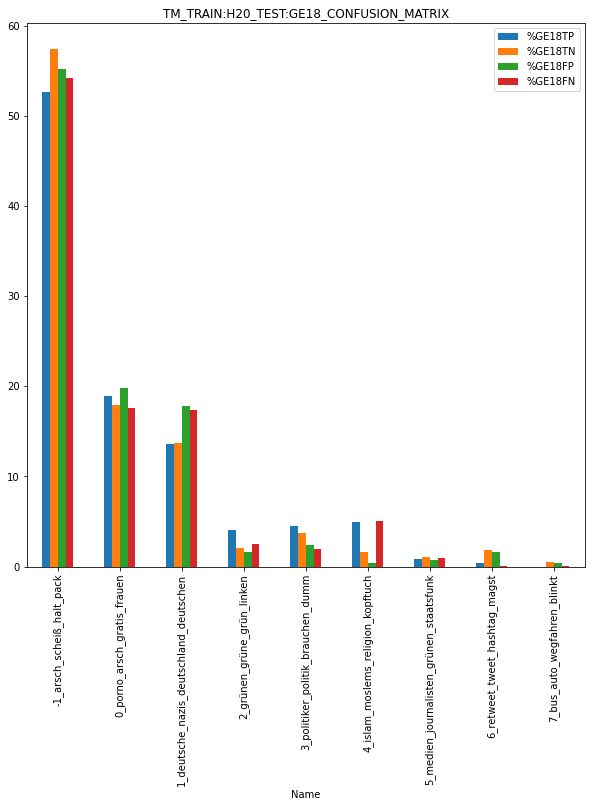

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX.plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:GE18_CONFUSION_MATRIX")

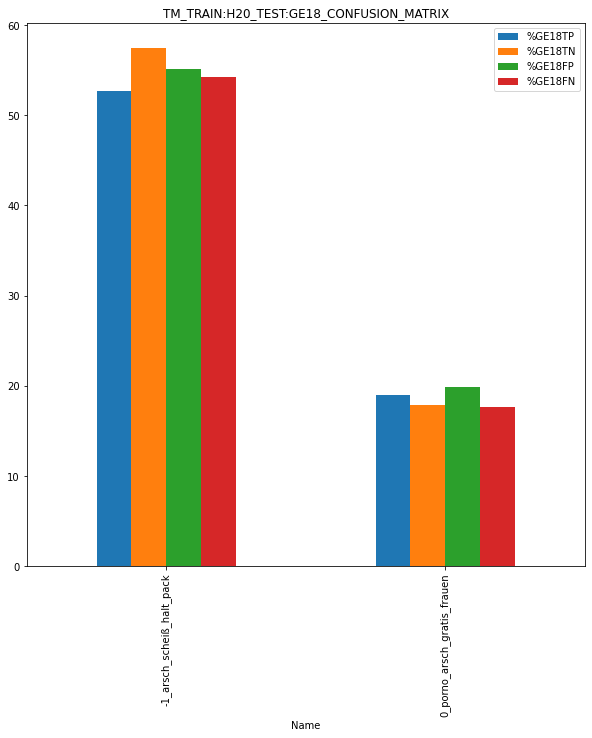

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:GE18_CONFUSION_MATRIX")

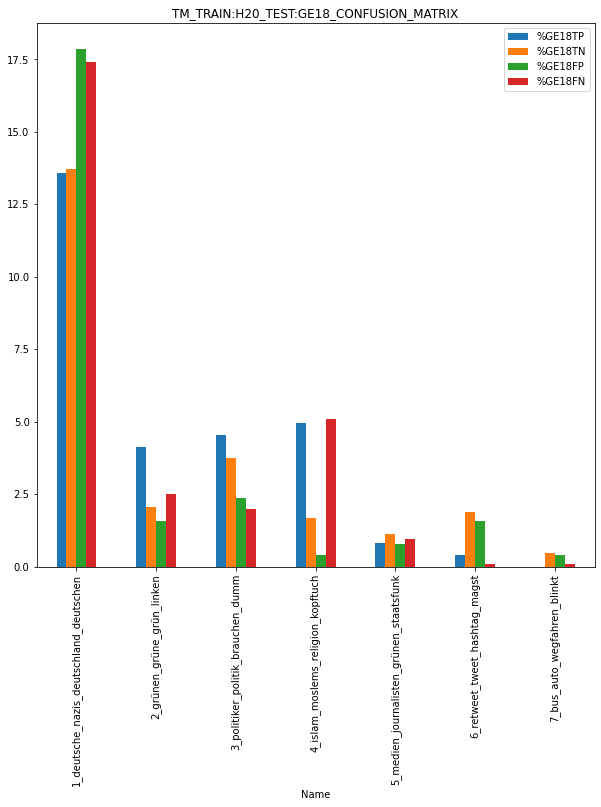

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:GE18_CONFUSION_MATRIX")

In [ ]:
#test_ge18_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:H20_TEST:GE18_CONFUSION_MATRIX")

### Test GE2019

In [ ]:
train_h20_class_ge19 = pd.read_csv('/content/NSIT_Train_HASOC2020_Test_GermEval2019_Task_A_submission_DE_A.csv')
train_h20_class_ge19

task1
0         1
1         0
2         0
3         1
4         0
...     ...
3026      1
3027      1
3028      1
3029      1
3030      1

[3031 rows x 1 columns]

In [ ]:
train_h20_class_ge19['task1'] = train_h20_class_ge19['task1'].map({0: 1, 1: 0}).astype(int)
train_h20_class_ge19

task1
0         0
1         1
2         1
3         0
4         1
...     ...
3026      0
3027      0
3028      0
3029      0
3030      0

[3031 rows x 1 columns]

In [ ]:
ge19_test_class_values = pd.DataFrame(train_h20_class_ge19['task1'].value_counts())
ge19_test_class_values

task1
0   2563
1    468

In [ ]:

ge19_test_raw['class'] = train_h20_class_ge19['task1']
ge19_test_raw

TWEET      OFF     CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE  INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE   ABUSE   
2     @DLFNachrichten Die Gesichter, Namen, Religion...    OTHER   OTHER   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE   ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
3026  Es fand aber nie eine Emanzipierungs-Phase der...    OTHER   OTHER   
3027  Um es klar zu stellen: Ich will hier kein Whit...    OTHER   OTHER   
3028  Und dann habe ich da noch die McArthur-Briefe ...    OTHER   OTHER   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...    OTHER   OTHER   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...    OTHER   OTHER   

      pred  class  cat_bin_actual  cat_bin_predicted  
0       -1      0               1                  0  
1       -1      1               1                  1  
2        4      1               0                  1  
3       -1      0               1                  0  
4       -1      1               1                  1  
...    ...    ...             ...                ...  
3026     1      0               0                  0  
3027    -1      0               0                  0  
3028    -1      0               0                  0  
3029    -1      0               0                  0  
3030    -1      0               0                  0  

[3031 rows x 7 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge19_test_true_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 1)]
ge19_test_true_pos

TWEET      OFF        CAT  \
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE      ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE      ABUSE   
10    @rbbabendschau Nun, Eigentum verpflichtet, das...  OFFENSE      ABUSE   
11    @ZDFheute Birmingham hatte eine ganz andere Kl...  OFFENSE      ABUSE   
24    @Tagesspiegel Da Berlin Schmarotzer und Nehmer...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
2838  Lucke würde selbst im Paradies stänkern.. zu v...  OFFENSE     INSULT   
2846      arie wo bist du du alte Arsch Geburt #krone18  OFFENSE     INSULT   
2852  War lächerlich, ist lächerlich und wird lächer...  OFFENSE     INSULT   
2870  eine Fresse wie viel Fritierfett hat #markusla...  OFFENSE  PROFANITY   
2877  In Köln können die eine Moschee bauen, stellst...  OFFENSE      ABUSE   

      pred  class  cat_bin_actual  cat_bin_predicted  
1       -1      1               1                  1  
4       -1      1               1                  1  
10       1      1               1                  1  
11      -1      1               1                  1  
24       1      1               1                  1  
...    ...    ...             ...                ...  
2838    -1      1               1                  1  
2846     0      1               1                  1  
2852    -1      1               1                  1  
2870     0      1               1                  1  
2877    -1      1               1                  1  

[219 rows x 7 columns]

In [ ]:
ge19_test_pred_values_true_pos = pd.DataFrame(ge19_test_true_pos['pred'].value_counts())
ge19_test_pred_values_true_pos['percent'] = (ge19_test_pred_values_true_pos['pred'] / ge19_test_pred_values_true_pos['pred'].sum()) * 100
ge19_test_pred_values_true_pos

pred    percent
-1   114  52.054795
 1    47  21.461187
 0    29  13.242009
 2     8   3.652968
 3     8   3.652968
 6     5   2.283105
 5     4   1.826484
 4     4   1.826484

In [ ]:
ge19_test_false_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 1)]
ge19_test_false_pos

TWEET    OFF    CAT  pred  \
2     @DLFNachrichten Die Gesichter, Namen, Religion...  OTHER  OTHER     4   
25    @TAG24LE Wenn sich Linke Linke zu Feinden mach...  OTHER  OTHER    -1   
96    @mopo Hier die echten 10 Gründe 1.Nahles 2.Nah...  OTHER  OTHER    -1   
123   In Deutschland bestimmen wir Deutsche was in u...  OTHER  OTHER     1   
124   Familien Nachzug nein wenn die Grünen es wolle...  OTHER  OTHER     1   
...                                                 ...    ...    ...   ...   
2920  “@Welcome_FFM: Morgen: |LBR| #welcomeffm Vollv...  OTHER  OTHER     0   
2922  @Welcome_FFM: Nächste Vollversammlung: Mittwoc...  OTHER  OTHER    -1   
2931  Heute 19h Veranstaltung \""Keine #Drohnen über...  OTHER  OTHER     1   
2996  Hm, das erste Er bezieht sich auf den Twittere...  OTHER  OTHER     6   
3009  @realJohr Pariser Frauen sind nur im Regen sch...  OTHER  OTHER     1   

      class  cat_bin_actual  cat_bin_predicted  
2         1               0                  1  
25        1               0                  1  
96        1               0                  1  
123       1               0                  1  
124       1               0                  1  
...     ...             ...                ...  
2920      1               0                  1  
2922      1               0                  1  
2931      1               0                  1  
2996      1               0                  1  
3009      1               0                  1  

[249 rows x 7 columns]

In [ ]:
ge19_test_pred_values_false_pos = pd.DataFrame(ge19_test_false_pos['pred'].value_counts())
ge19_test_pred_values_false_pos['percent'] = (ge19_test_pred_values_false_pos['pred'] / ge19_test_pred_values_false_pos['pred'].sum()) * 100
ge19_test_pred_values_false_pos

pred    percent
-1   134  53.815261
 1    56  22.489960
 0    30  12.048193
 6    11   4.417671
 4     7   2.811245
 3     6   2.409639
 2     5   2.008032

In [ ]:
ge19_test_true_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 0)]
ge19_test_true_neg

TWEET    OFF    CAT  pred  \
5     @aktuelle_stunde Also beim Fall Birmingham, En...  OTHER  OTHER    -1   
6     @StZ_NEWS Aber bei läppischen 130.000 Euro der...  OTHER  OTHER     1   
12    @BR24 Wie viele werden durch Gas Unfälle getöt...  OTHER  OTHER     7   
30    @faznet In England, Birmingham war mehr Täter,...  OTHER  OTHER    -1   
48    @mz_quedlinburg @mzwebde Warum genau muss man ...  OTHER  OTHER     0   
...                                                 ...    ...    ...   ...   
3026  Es fand aber nie eine Emanzipierungs-Phase der...  OTHER  OTHER     1   
3027  Um es klar zu stellen: Ich will hier kein Whit...  OTHER  OTHER    -1   
3028  Und dann habe ich da noch die McArthur-Briefe ...  OTHER  OTHER    -1   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...  OTHER  OTHER    -1   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...  OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
5         0               0                  0  
6         0               0                  0  
12        0               0                  0  
30        0               0                  0  
48        0               0                  0  
...     ...             ...                ...  
3026      0               0                  0  
3027      0               0                  0  
3028      0               0                  0  
3029      0               0                  0  
3030      0               0                  0  

[1812 rows x 7 columns]

In [ ]:
ge19_test_pred_values_true_neg = pd.DataFrame(ge19_test_true_neg['pred'].value_counts())
ge19_test_pred_values_true_neg['percent'] = (ge19_test_pred_values_true_neg['pred'] / ge19_test_pred_values_true_neg['pred'].sum()) * 100
ge19_test_pred_values_true_neg

pred    percent
-1  1033  57.008830
 0   343  18.929360
 1   248  13.686534
 3    53   2.924945
 6    52   2.869757
 2    29   1.600442
 7    20   1.103753
 4    19   1.048565
 5    15   0.827815

In [ ]:
ge19_test_false_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 0)]
ge19_test_false_neg

TWEET      OFF        CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE     INSULT   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE      ABUSE   
7     @StZ_NEWS Schäuble wird wissen woher dieses Na...  OFFENSE      ABUSE   
8     @welt Komisch, wäre dieser Betrug in der Nähe ...  OFFENSE      ABUSE   
9     @investigativ_de @welt @Tim_Roehn @ChSchweppe ...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
2889  Diese sogenannten Aktivisten sind Straftäter d...  OFFENSE      ABUSE   
2949    #Erdogan ist einfach eine Pest für die #Türkei.  OFFENSE     INSULT   
2976  @sixtus Irgend so ein charakterloser brauner M...  OFFENSE     INSULT   
2978  Das mag dem einen oder anderen harsch vorkomme...  OFFENSE     INSULT   
2988  Ich frage mich mittlerweile was Saudi Arabien ...  OFFENSE  PROFANITY   

      pred  class  cat_bin_actual  cat_bin_predicted  
0       -1      0               1                  0  
3       -1      0               1                  0  
7        1      0               1                  0  
8       -1      0               1                  0  
9        3      0               1                  0  
...    ...    ...             ...                ...  
2889    -1      0               1                  0  
2949     1      0               1                  0  
2976    -1      0               1                  0  
2978     0      0               1                  0  
2988     4      0               1                  0  

[751 rows x 7 columns]

In [ ]:
ge19_test_pred_values_false_neg = pd.DataFrame(ge19_test_false_neg['pred'].value_counts())
ge19_test_pred_values_false_neg['percent'] = (ge19_test_pred_values_false_neg['pred'] / ge19_test_pred_values_false_neg['pred'].sum()) * 100
ge19_test_pred_values_false_neg

pred    percent
-1   411  54.727031
 1   153  20.372836
 0   109  14.513981
 3    23   3.062583
 4    20   2.663116
 5    14   1.864181
 2    10   1.331558
 6     9   1.198402
 7     2   0.266312

In [ ]:
ge19_test_raw['cat_bin_actual'] = ge19_test_raw['OFF'].map({'OTHER': 0, 'OFFENSE': 1}).astype(int)
ge19_test_raw['cat_bin_predicted'] = ge19_test_raw['class'].astype(int)


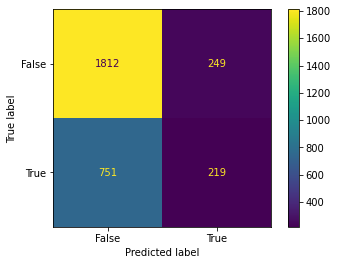

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
#import matplotlib.pyplot as plt
#import numpy
#from sklearn import metrics

actual = ge19_test_raw['cat_bin_actual']
predicted = ge19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.6700758825470142

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.46794871794871795

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.22577319587628866

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.8791848617176128

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.3045897079276773

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.6700758825470142, 'Precision': 0.46794871794871795, 'Sensitivity_recall': 0.22577319587628866, 'Specificity': 0.8791848617176128, 'F1_score': 0.3045897079276773}


### TEST GE2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h20_model_topics[['Topic','Name']]
df1

Topic                                     Name
0     -1                -1_arsch_scheiß_halt_pack
1      0              0_porno_arsch_gratis_frauen
2      1   1_deutsche_nazis_deutschland_deutschen
3      2               2_grünen_grüne_grün_linken
4      3        3_politiker_politik_brauchen_dumm
5      4        4_islam_moslems_religion_kopftuch
6      5  5_medien_journalisten_grünen_staatsfunk
7      6            6_retweet_tweet_hashtag_magst
8      7              7_bus_auto_wegfahren_blinkt

In [ ]:
ge19_test_pred_values_true_pos['Topic'] = ge19_test_pred_values_true_pos.index
ge19_test_pred_values_true_pos

pred    percent  Topic
-1   114  52.054795     -1
 1    47  21.461187      1
 0    29  13.242009      0
 2     8   3.652968      2
 3     8   3.652968      3
 6     5   2.283105      6
 5     4   1.826484      5
 4     4   1.826484      4

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE19TP', 'percent':'%GE19TP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_pos['Topic'] = ge19_test_pred_values_false_pos.index
ge19_test_pred_values_false_pos

pred    percent  Topic
-1   134  53.815261     -1
 1    56  22.489960      1
 0    30  12.048193      0
 6    11   4.417671      6
 4     7   2.811245      4
 3     6   2.409639      3
 2     5   2.008032      2

In [ ]:
df3 = ge19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE19FP', 'percent':'%GE19FP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_true_neg['Topic'] = ge19_test_pred_values_true_neg.index
ge19_test_pred_values_true_neg

pred    percent  Topic
-1  1033  57.008830     -1
 0   343  18.929360      0
 1   248  13.686534      1
 3    53   2.924945      3
 6    52   2.869757      6
 2    29   1.600442      2
 7    20   1.103753      7
 4    19   1.048565      4
 5    15   0.827815      5

In [ ]:
df4 = ge19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE19TN', 'percent':'%GE19TN', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_neg['Topic'] = ge19_test_pred_values_false_neg.index
ge19_test_pred_values_false_neg

pred    percent  Topic
-1   411  54.727031     -1
 1   153  20.372836      1
 0   109  14.513981      0
 3    23   3.062583      3
 4    20   2.663116      4
 5    14   1.864181      5
 2    10   1.331558      2
 6     9   1.198402      6
 7     2   0.266312      7

In [ ]:
df5 = ge19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE19FN', 'percent':'%GE19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']] = df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%GE19', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE19', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                     Name predGE19TP  %GE19TP  \
0     -1                -1_arsch_scheiß_halt_pack      114.0    52.05   
1      0              0_porno_arsch_gratis_frauen       29.0    13.24   
2      1   1_deutsche_nazis_deutschland_deutschen       47.0    21.46   
3      2               2_grünen_grüne_grün_linken        8.0     3.65   
4      3        3_politiker_politik_brauchen_dumm        8.0     3.65   
5      4        4_islam_moslems_religion_kopftuch        4.0     1.83   
6      5  5_medien_journalisten_grünen_staatsfunk        4.0     1.83   
7      6            6_retweet_tweet_hashtag_magst        5.0     2.28   
8      7              7_bus_auto_wegfahren_blinkt          0     0.00   

  predGE19FP  %GE19FP  predGE19TN  %GE19TN  predGE19FN  %GE19FN  
0      134.0    53.82        1033    57.01         411    54.73  
1       30.0    12.05         343    18.93         109    14.51  
2       56.0    22.49         248    13.69         153    20.37  
3        5.0     2.01          29     1.60          10     1.33  
4        6.0     2.41          53     2.92          23     3.06  
5        7.0     2.81          19     1.05          20     2.66  
6          0     0.00          15     0.83          14     1.86  
7       11.0     4.42          52     2.87           9     1.20  
8          0     0.00          20     1.10           2     0.27

In [ ]:
df_merged

Topic                                     Name predGE19TP  %GE19TP  \
0     -1                -1_arsch_scheiß_halt_pack      114.0    52.05   
1      0              0_porno_arsch_gratis_frauen       29.0    13.24   
2      1   1_deutsche_nazis_deutschland_deutschen       47.0    21.46   
3      2               2_grünen_grüne_grün_linken        8.0     3.65   
4      3        3_politiker_politik_brauchen_dumm        8.0     3.65   
5      4        4_islam_moslems_religion_kopftuch        4.0     1.83   
6      5  5_medien_journalisten_grünen_staatsfunk        4.0     1.83   
7      6            6_retweet_tweet_hashtag_magst        5.0     2.28   
8      7              7_bus_auto_wegfahren_blinkt          0     0.00   

  predGE19FP  %GE19FP  predGE19TN  %GE19TN  predGE19FN  %GE19FN  
0      134.0    53.82        1033    57.01         411    54.73  
1       30.0    12.05         343    18.93         109    14.51  
2       56.0    22.49         248    13.69         153    20.37  
3        5.0     2.01          29     1.60          10     1.33  
4        6.0     2.41          53     2.92          23     3.06  
5        7.0     2.81          19     1.05          20     2.66  
6          0     0.00          15     0.83          14     1.86  
7       11.0     4.42          52     2.87           9     1.20  
8          0     0.00          20     1.10           2     0.27

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE19TP": int, "predGE19TN":int, "predGE19FP":int, "predGE19FN":int})
df_merged

Topic                                     Name  predGE19TP  %GE19TP  \
0     -1                -1_arsch_scheiß_halt_pack         114    52.05   
1      0              0_porno_arsch_gratis_frauen          29    13.24   
2      1   1_deutsche_nazis_deutschland_deutschen          47    21.46   
3      2               2_grünen_grüne_grün_linken           8     3.65   
4      3        3_politiker_politik_brauchen_dumm           8     3.65   
5      4        4_islam_moslems_religion_kopftuch           4     1.83   
6      5  5_medien_journalisten_grünen_staatsfunk           4     1.83   
7      6            6_retweet_tweet_hashtag_magst           5     2.28   
8      7              7_bus_auto_wegfahren_blinkt           0     0.00   

   predGE19FP  %GE19FP  predGE19TN  %GE19TN  predGE19FN  %GE19FN  
0         134    53.82        1033    57.01         411    54.73  
1          30    12.05         343    18.93         109    14.51  
2          56    22.49         248    13.69         153    20.37  
3           5     2.01          29     1.60          10     1.33  
4           6     2.41          53     2.92          23     3.06  
5           7     2.81          19     1.05          20     2.66  
6           0     0.00          15     0.83          14     1.86  
7          11     4.42          52     2.87           9     1.20  
8           0     0.00          20     1.10           2     0.27

In [ ]:
df_percent = df_merged[['Topic','%GE19TP', '%GE19TN','%GE19FP', '%GE19FN','Name']]
df_percent

Topic  %GE19TP  %GE19TN  %GE19FP  %GE19FN  \
0     -1    52.05    57.01    53.82    54.73   
1      0    13.24    18.93    12.05    14.51   
2      1    21.46    13.69    22.49    20.37   
3      2     3.65     1.60     2.01     1.33   
4      3     3.65     2.92     2.41     3.06   
5      4     1.83     1.05     2.81     2.66   
6      5     1.83     0.83     0.00     1.86   
7      6     2.28     2.87     4.42     1.20   
8      7     0.00     1.10     0.00     0.27   

                                      Name  
0                -1_arsch_scheiß_halt_pack  
1              0_porno_arsch_gratis_frauen  
2   1_deutsche_nazis_deutschland_deutschen  
3               2_grünen_grüne_grün_linken  
4        3_politiker_politik_brauchen_dumm  
5        4_islam_moslems_religion_kopftuch  
6  5_medien_journalisten_grünen_staatsfunk  
7            6_retweet_tweet_hashtag_magst  
8              7_bus_auto_wegfahren_blinkt

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

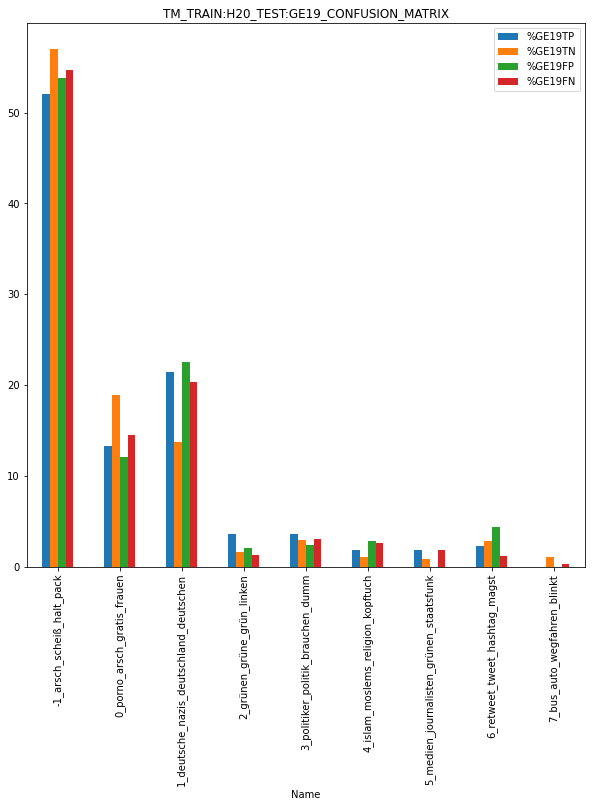

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX.plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:GE19_CONFUSION_MATRIX")

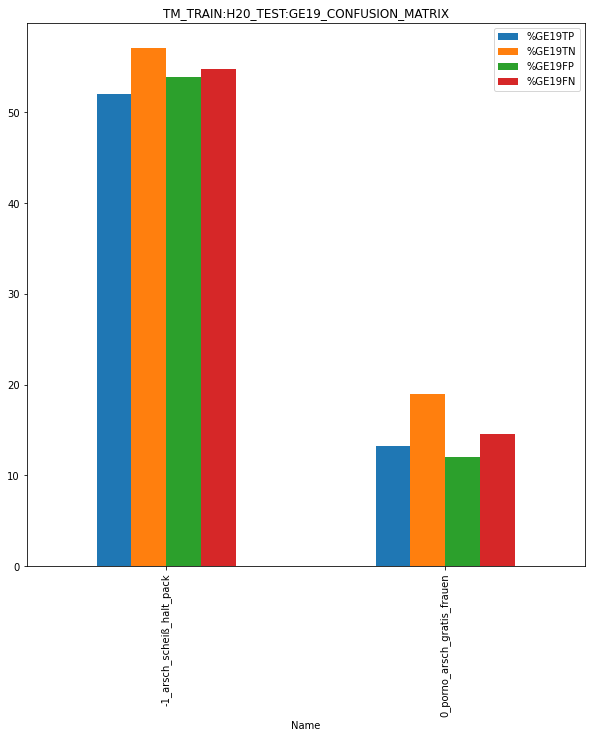

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:GE19_CONFUSION_MATRIX")

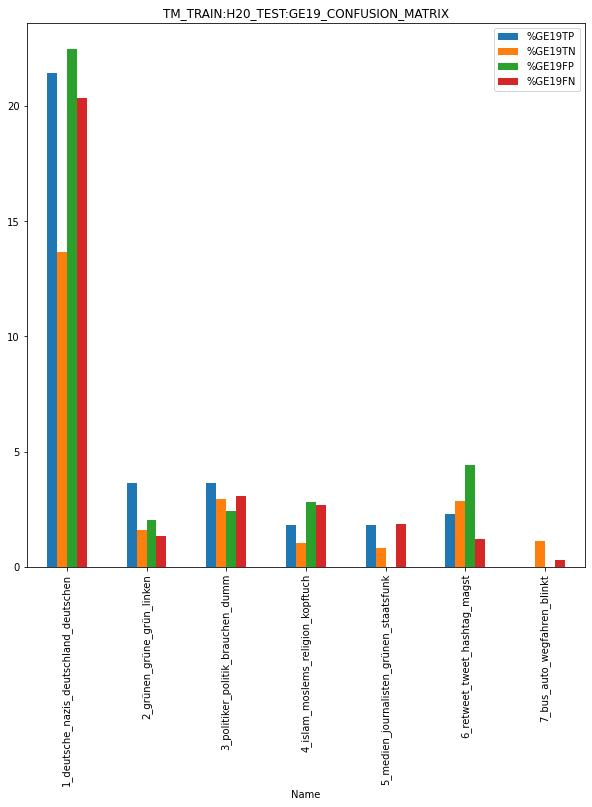

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:GE19_CONFUSION_MATRIX")

In [ ]:
#test_ge19_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:H20_TEST:GE19_CONFUSION_MATRIX")

### Test H2019

In [ ]:
train_h20_class_h19 = pd.read_csv('/content/NSIT_submission_DE_Train_HASOC2020_Test_HASOC2019_TASK_A.csv')
train_h20_class_h19


task1
0        1
1        1
2        1
3        0
4        1
..     ...
845      1
846      1
847      1
848      1
849      1

[850 rows x 1 columns]

In [ ]:
train_h20_class_h19['task1'] = train_h20_class_h19['task1'].map({0: 1, 1: 0}).astype(int)
train_h20_class_h19

task1
0        0
1        0
2        0
3        1
4        0
..     ...
845      0
846      0
847      0
848      0
849      0

[850 rows x 1 columns]

In [ ]:
h19_test_class_values = pd.DataFrame(train_h20_class_h19['task1'].value_counts())
h19_test_class_values

task1
0    748
1    102

In [ ]:

h19_test_raw['class'] = train_h20_class_h19['task1']
h19_test_raw

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
..             ...                                                ...    ...   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
0     HATE     2      0               1                  0  
1     NONE     1      0               0                  0  
2     NONE     0      0               0                  0  
3     OFFN     3      1               1                  1  
4     OFFN    -1      0               1                  0  
..     ...   ...    ...             ...                ...  
845   OFFN    -1      0               1                  0  
846   OFFN     0      0               1                  0  
847   OFFN     1      0               1                  0  
848   OFFN    -1      0               1                  0  
849   NONE     0      0               0                  0  

[850 rows x 8 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h19_test_true_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 1)]
h19_test_true_pos

text_id                                               text task_1  \
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
57   hasoc_de_5327  @Kurzkommentar @manu_mie @Ralf_Stegner Sie ste...    HOF   
77   hasoc_de_5347  Ich wäre auch für die Abschaffung von Plastikv...    HOF   
78   hasoc_de_5348  Dreimal sagen,'Allah Akbars ' und dann noch 'i...    HOF   
224  hasoc_de_5494  2/2  Gelegenheit so richtig in die Fresse zu t...    HOF   
452  hasoc_de_5722  Was für eine armselige Kreatur! Kein Mitgefühl...    HOF   
501  hasoc_de_5771  Vier „Flüchtlinge“ überfallen einen Deutschen,...    HOF   
517  hasoc_de_5787  #Maas soll neuer Außenminister werden. 🤔  Pass...    HOF   
590  hasoc_de_5860  Das ist der absolute Gipfel! Lächerliche 2,5 J...    HOF   
609  hasoc_de_5879  'Wo sind die Kinder?“  “Auf der AfD-Demo: Stro...    HOF   
610  hasoc_de_5880  #Wiesbaden Ali #Bashar der mutmaßliche Mörder ...    HOF   
614  hasoc_de_5884  Das Video des Mädchens hat ihr Vater aufgenomm...    HOF   
685  hasoc_de_5955  @Uwe_Junge_MdL @pearwalts5 @Junge_Freiheit Es ...    HOF   
691  hasoc_de_5961  @Uwe_Junge_MdL @Junge_Freiheit Natürlich, denn...    HOF   
706  hasoc_de_5976  @Uwe_Junge_MdL Tja, wenn Leute wie Sie an der ...    HOF   
772  hasoc_de_6042  Haben die Parteien eine Produktwerbeagentur? D...    HOF   
782  hasoc_de_6052  Unser Bester hat wieder aufgedeckt. Der GUTE O...    HOF   
785  hasoc_de_6055  Ein Statement von 80+ Youtubern + ich.  Denn M...    HOF   
786  hasoc_de_6056  Wenn die Umweltschützer nicht zu allem den Sen...    HOF   
789  hasoc_de_6059  Was ist denn mit der sonst verkehrten 'Welt' l...    HOF   
793  hasoc_de_6063  „Sie glauben alles, was in der Zeitung steht.“...    HOF   
794  hasoc_de_6064  Warum legalisiert man das nicht alles, wie es ...    HOF   
805  hasoc_de_6075  #Wilfuziusine fragt:  Ist es denn wirklich so ...    HOF   
808  hasoc_de_6078  Ich liebe das Mädel &amp; Twitter genauso. Du ...    HOF   
809  hasoc_de_6079  Als Kind wohl einmal zu viel geimpft. Will Elt...    HOF   
810  hasoc_de_6080  Mein geistiger Vater lacht sich wieder lebendi...    HOF   
818  hasoc_de_6088  Ich kann die Kinder so gut verstehen. Denn die...    HOF   
820  hasoc_de_6090  Und direkt ab nach Guantanamo damit oder in ei...    HOF   
821  hasoc_de_6091  Kann Mann besser sagen  57 Länder/Staaten die ...    HOF   
822  hasoc_de_6092  Für Pipi in de Augen.  Das #EkelWilfred kann a...    HOF   
823  hasoc_de_6093  Das hätte sich mal einer im „Deutschland verre...    HOF   
827  hasoc_de_6097  In Deutschland geht man also sozusagen in den ...    HOF   
829  hasoc_de_6099  Neues aus 'Schlag die Merkel'  Mit einem angeb...    HOF   
831  hasoc_de_6101  Wem er wohl auf die Füße getreten ist oder sol...    HOF   
835  hasoc_de_6105  Wer mir mit ihrer Politik die und das Liebste ...    HOF   
843  hasoc_de_6113  Besser ein #echter #Komiker als #Führungsspitz...    HOF   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
3     OFFN     3      1               1                  1  
57    HATE     1      1               1                  1  
77    HATE     0      1               1                  1  
78    HATE     4      1               1                  1  
224   OFFN    -1      1               1                  1  
452   OFFN     1      1               1                  1  
501   OFFN     1      1               1                  1  
517   OFFN     3      1               1                  1  
590   PRFN    -1      1               1                  1  
609   PRFN     1      1               1                  1  
610   PRFN     1      1               1                  1  
614   OFFN    -1      1               1                  1  
685   HATE     1      1               1                  1  
691   PRFN     1      1               1                  1  
706   HATE    -1      1               1                  1  
772   OFFN     3      1               1                  1  
782   OFFN   

In [ ]:
h19_test_pred_values_true_pos = pd.DataFrame(h19_test_true_pos['pred'].value_counts())
h19_test_pred_values_true_pos['percent'] = (h19_test_pred_values_true_pos['pred'] / h19_test_pred_values_true_pos['pred'].sum()) * 100
h19_test_pred_values_true_pos

pred    percent
-1    13  36.111111
 1    11  30.555556
 0     6  16.666667
 3     4  11.111111
 4     1   2.777778
 6     1   2.777778

In [ ]:
h19_test_false_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 1)]
h19_test_false_pos

text_id                                               text task_1  \
7    hasoc_de_5277  Und genau das macht er und lässt sich Scheiden...    NOT   
8    hasoc_de_5278  Dann wird das Konto gesperrt und Du musst wied...    NOT   
40   hasoc_de_5310  Gestern bei Lanz,ehemalige Managerin,hat Ihr G...    NOT   
44   hasoc_de_5314  Altmaier will Gründungsoffensive mit Kredite f...    NOT   
63   hasoc_de_5333  @WolfgangNitzsc1 @Hessenschwabe @lawyerberlin ...    NOT   
..             ...                                                ...    ...   
749  hasoc_de_6019  +++ Stoppt den Großen Austausch! +++    Aktion...    NOT   
758  hasoc_de_6028  Warum wird der Hauptgrund des #Brexit nicht ge...    NOT   
771  hasoc_de_6041  Gibt es auf der Erde jetzt nur noch 33% Männer...    NOT   
792  hasoc_de_6062  Toller Kommentar.  Merkel hat das Land 14 Jahr...    NOT   
797  hasoc_de_6067  Wenn es hier nicht um ein Mädchenleben, zwei M...    NOT   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
7     NONE     0      1               0                  1  
8     NONE     0      1               0                  1  
40    NONE    -1      1               0                  1  
44    NONE     1      1               0                  1  
63    NONE    -1      1               0                  1  
..     ...   ...    ...             ...                ...  
749   NONE     1      1               0                  1  
758   NONE    -1      1               0                  1  
771   NONE    -1      1               0                  1  
792   NONE     1      1               0                  1  
797   NONE    -1      1               0                  1  

[66 rows x 8 columns]

In [ ]:
h19_test_pred_values_false_pos = pd.DataFrame(h19_test_false_pos['pred'].value_counts())
h19_test_pred_values_false_pos['percent'] = (h19_test_pred_values_false_pos['pred'] / h19_test_pred_values_false_pos['pred'].sum()) * 100
h19_test_pred_values_false_pos

pred    percent
-1    27  40.909091
 1    17  25.757576
 0    10  15.151515
 6     4   6.060606
 2     3   4.545455
 3     3   4.545455
 5     2   3.030303

In [ ]:
h19_test_true_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 0)]
h19_test_true_neg

text_id                                               text task_1  \
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
9    hasoc_de_5279         Dann bleib Single! https://t.co/TOP0spaU01    NOT   
10   hasoc_de_5280  Eben auf ZDF  Messerattacken 2017 3800  2018 3...    NOT   
11   hasoc_de_5281  @EUDebate   Steuergerechtigkeit, Google,Facebo...    NOT   
..             ...                                                ...    ...   
837  hasoc_de_6107  @Uwe_Junge_MdL @Beatrix_vStorch  @lsvd  @Nicol...    NOT   
838  hasoc_de_6108  @Uwe_Junge_MdL Ihr streitet es zwar immer ab, ...    NOT   
839  hasoc_de_6109  @Uwe_Junge_MdL Oh die AFD als Vertreter der Ho...    NOT   
840  hasoc_de_6110                                   @Uwe_Junge_MdL 🤣    NOT   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
1     NONE     1      0               0                  0  
2     NONE     0      0               0                  0  
9     NONE     0      0               0                  0  
10    NONE     3      0               0                  0  
11    NONE    -1      0               0                  0  
..     ...   ...    ...             ...                ...  
837   NONE    -1      0               0                  0  
838   NONE    -1      0               0                  0  
839   NONE     0      0               0                  0  
840   NONE     0      0               0                  0  
849   NONE     0      0               0                  0  

[648 rows x 8 columns]

In [ ]:
h19_test_pred_values_true_neg = pd.DataFrame(h19_test_true_neg['pred'].value_counts())
h19_test_pred_values_true_neg['percent'] = (h19_test_pred_values_true_neg['pred'] / h19_test_pred_values_true_neg['pred'].sum()) * 100
h19_test_pred_values_true_neg

pred    percent
-1   294  45.370370
 0   158  24.382716
 1   137  21.141975
 3    19   2.932099
 2    15   2.314815
 4    10   1.543210
 5     7   1.080247
 6     5   0.771605
 7     3   0.462963

In [ ]:
h19_test_false_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 0)]
h19_test_false_neg

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
5    hasoc_de_5275  #Bundeswehr  erst überzeugen Politische Linke,...    HOF   
6    hasoc_de_5276  Du bist ein Rassist,Du erhöhst Dich über ander...    HOF   
41   hasoc_de_5311  Lanz und Schwarzer,  neuerdings AfD Befürworte...    HOF   
..             ...                                                ...    ...   
844  hasoc_de_6114  Der/die/das große E ruft seine Mops wegen Unta...    HOF   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
0     HATE     2      0               1                  0  
4     OFFN    -1      0               1                  0  
5     HATE     3      0               1                  0  
6     OFFN    -1      0               1                  0  
41    HATE     1      0               1                  0  
..     ...   ...    ...             ...                ...  
844   OFFN     0      0               1                  0  
845   OFFN    -1      0               1                  0  
846   OFFN     0      0               1                  0  
847   OFFN     1      0               1                  0  
848   OFFN    -1      0               1                  0  

[100 rows x 8 columns]

In [ ]:
h19_test_pred_values_false_neg = pd.DataFrame(h19_test_false_neg['pred'].value_counts())
h19_test_pred_values_false_neg['percent'] = (h19_test_pred_values_false_neg['pred'] / h19_test_pred_values_false_neg['pred'].sum()) * 100
h19_test_pred_values_false_neg

pred  percent
-1    49     49.0
 1    28     28.0
 0    10     10.0
 3     5      5.0
 2     3      3.0
 4     3      3.0
 6     1      1.0
 5     1      1.0

In [ ]:
h19_test_raw['cat_bin_actual'] = h19_test_raw['task_1'].map({'NOT': 0, 'HOF': 1}).astype(int)
h19_test_raw['cat_bin_predicted'] = h19_test_raw['class'].astype(int)


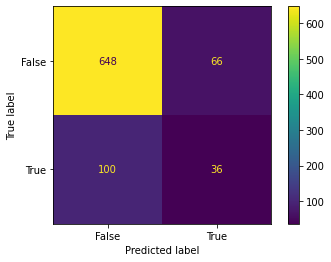

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h19_test_raw['cat_bin_actual']
predicted = h19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.8047058823529412

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.35294117647058826

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.2647058823529412

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.907563025210084

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.3025210084033613

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.8047058823529412, 'Precision': 0.35294117647058826, 'Sensitivity_recall': 0.2647058823529412, 'Specificity': 0.907563025210084, 'F1_score': 0.3025210084033613}


### TEST H2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h20_model_topics[['Topic','Name']]
df1

Topic                                     Name
0     -1                -1_arsch_scheiß_halt_pack
1      0              0_porno_arsch_gratis_frauen
2      1   1_deutsche_nazis_deutschland_deutschen
3      2               2_grünen_grüne_grün_linken
4      3        3_politiker_politik_brauchen_dumm
5      4        4_islam_moslems_religion_kopftuch
6      5  5_medien_journalisten_grünen_staatsfunk
7      6            6_retweet_tweet_hashtag_magst
8      7              7_bus_auto_wegfahren_blinkt

In [ ]:
h19_test_pred_values_true_pos['Topic'] = h19_test_pred_values_true_pos.index
h19_test_pred_values_true_pos

pred    percent  Topic
-1    13  36.111111     -1
 1    11  30.555556      1
 0     6  16.666667      0
 3     4  11.111111      3
 4     1   2.777778      4
 6     1   2.777778      6

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH19TP', 'percent':'%H19TP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_pos['Topic'] = h19_test_pred_values_false_pos.index
h19_test_pred_values_false_pos

pred    percent  Topic
-1    27  40.909091     -1
 1    17  25.757576      1
 0    10  15.151515      0
 6     4   6.060606      6
 2     3   4.545455      2
 3     3   4.545455      3
 5     2   3.030303      5

In [ ]:
df3 = h19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH19FP', 'percent':'%H19FP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_true_neg['Topic'] = h19_test_pred_values_true_neg.index
h19_test_pred_values_true_neg

pred    percent  Topic
-1   294  45.370370     -1
 0   158  24.382716      0
 1   137  21.141975      1
 3    19   2.932099      3
 2    15   2.314815      2
 4    10   1.543210      4
 5     7   1.080247      5
 6     5   0.771605      6
 7     3   0.462963      7

In [ ]:
df4 = h19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH19TN', 'percent':'%H19TN', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_neg['Topic'] = h19_test_pred_values_false_neg.index
h19_test_pred_values_false_neg

pred  percent  Topic
-1    49     49.0     -1
 1    28     28.0      1
 0    10     10.0      0
 3     5      5.0      3
 2     3      3.0      2
 4     3      3.0      4
 6     1      1.0      6
 5     1      1.0      5

In [ ]:
df5 = h19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH19FN', 'percent':'%H19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']] = df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H19', '%H19','%H19', '%H20']]
#df_to_round = df_to_round[['%H19', '%H19','%H19', '%H20']].round(2)
#df_to_round

Topic                                     Name predH19TP  %H19TP predH19FP  \
0     -1                -1_arsch_scheiß_halt_pack      13.0   36.11      27.0   
1      0              0_porno_arsch_gratis_frauen       6.0   16.67      10.0   
2      1   1_deutsche_nazis_deutschland_deutschen      11.0   30.56      17.0   
3      2               2_grünen_grüne_grün_linken         0    0.00       3.0   
4      3        3_politiker_politik_brauchen_dumm       4.0   11.11       3.0   
5      4        4_islam_moslems_religion_kopftuch       1.0    2.78         0   
6      5  5_medien_journalisten_grünen_staatsfunk         0    0.00       2.0   
7      6            6_retweet_tweet_hashtag_magst       1.0    2.78       4.0   
8      7              7_bus_auto_wegfahren_blinkt         0    0.00         0   

   %H19FP  predH19TN  %H19TN predH19FN  %H19FN  
0   40.91        294   45.37      49.0    49.0  
1   15.15        158   24.38      10.0    10.0  
2   25.76        137   21.14      28.0    28.0  
3    4.55         15    2.31       3.0     3.0  
4    4.55         19    2.93       5.0     5.0  
5    0.00         10    1.54       3.0     3.0  
6    3.03          7    1.08       1.0     1.0  
7    6.06          5    0.77       1.0     1.0  
8    0.00          3    0.46         0     0.0

In [ ]:
df_merged

Topic                                     Name predH19TP  %H19TP predH19FP  \
0     -1                -1_arsch_scheiß_halt_pack      13.0   36.11      27.0   
1      0              0_porno_arsch_gratis_frauen       6.0   16.67      10.0   
2      1   1_deutsche_nazis_deutschland_deutschen      11.0   30.56      17.0   
3      2               2_grünen_grüne_grün_linken         0    0.00       3.0   
4      3        3_politiker_politik_brauchen_dumm       4.0   11.11       3.0   
5      4        4_islam_moslems_religion_kopftuch       1.0    2.78         0   
6      5  5_medien_journalisten_grünen_staatsfunk         0    0.00       2.0   
7      6            6_retweet_tweet_hashtag_magst       1.0    2.78       4.0   
8      7              7_bus_auto_wegfahren_blinkt         0    0.00         0   

   %H19FP  predH19TN  %H19TN predH19FN  %H19FN  
0   40.91        294   45.37      49.0    49.0  
1   15.15        158   24.38      10.0    10.0  
2   25.76        137   21.14      28.0    28.0  
3    4.55         15    2.31       3.0     3.0  
4    4.55         19    2.93       5.0     5.0  
5    0.00         10    1.54       3.0     3.0  
6    3.03          7    1.08       1.0     1.0  
7    6.06          5    0.77       1.0     1.0  
8    0.00          3    0.46         0     0.0

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH19TP": int, "predH19TN":int, "predH19FP":int, "predH19FN":int})
df_merged

Topic                                     Name  predH19TP  %H19TP  \
0     -1                -1_arsch_scheiß_halt_pack         13   36.11   
1      0              0_porno_arsch_gratis_frauen          6   16.67   
2      1   1_deutsche_nazis_deutschland_deutschen         11   30.56   
3      2               2_grünen_grüne_grün_linken          0    0.00   
4      3        3_politiker_politik_brauchen_dumm          4   11.11   
5      4        4_islam_moslems_religion_kopftuch          1    2.78   
6      5  5_medien_journalisten_grünen_staatsfunk          0    0.00   
7      6            6_retweet_tweet_hashtag_magst          1    2.78   
8      7              7_bus_auto_wegfahren_blinkt          0    0.00   

   predH19FP  %H19FP  predH19TN  %H19TN  predH19FN  %H19FN  
0         27   40.91        294   45.37         49    49.0  
1         10   15.15        158   24.38         10    10.0  
2         17   25.76        137   21.14         28    28.0  
3          3    4.55         15    2.31          3     3.0  
4          3    4.55         19    2.93          5     5.0  
5          0    0.00         10    1.54          3     3.0  
6          2    3.03          7    1.08          1     1.0  
7          4    6.06          5    0.77          1     1.0  
8          0    0.00          3    0.46          0     0.0

In [ ]:
df_percent = df_merged[['Topic','%H19TP', '%H19TN','%H19FP', '%H19FN','Name']]
df_percent

Topic  %H19TP  %H19TN  %H19FP  %H19FN  \
0     -1   36.11   45.37   40.91    49.0   
1      0   16.67   24.38   15.15    10.0   
2      1   30.56   21.14   25.76    28.0   
3      2    0.00    2.31    4.55     3.0   
4      3   11.11    2.93    4.55     5.0   
5      4    2.78    1.54    0.00     3.0   
6      5    0.00    1.08    3.03     1.0   
7      6    2.78    0.77    6.06     1.0   
8      7    0.00    0.46    0.00     0.0   

                                      Name  
0                -1_arsch_scheiß_halt_pack  
1              0_porno_arsch_gratis_frauen  
2   1_deutsche_nazis_deutschland_deutschen  
3               2_grünen_grüne_grün_linken  
4        3_politiker_politik_brauchen_dumm  
5        4_islam_moslems_religion_kopftuch  
6  5_medien_journalisten_grünen_staatsfunk  
7            6_retweet_tweet_hashtag_magst  
8              7_bus_auto_wegfahren_blinkt

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

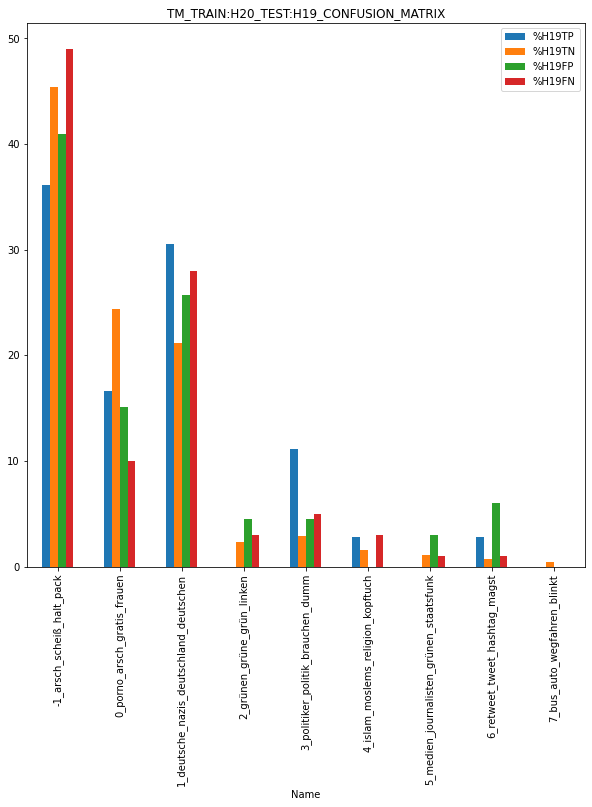

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX.plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:H19_CONFUSION_MATRIX")

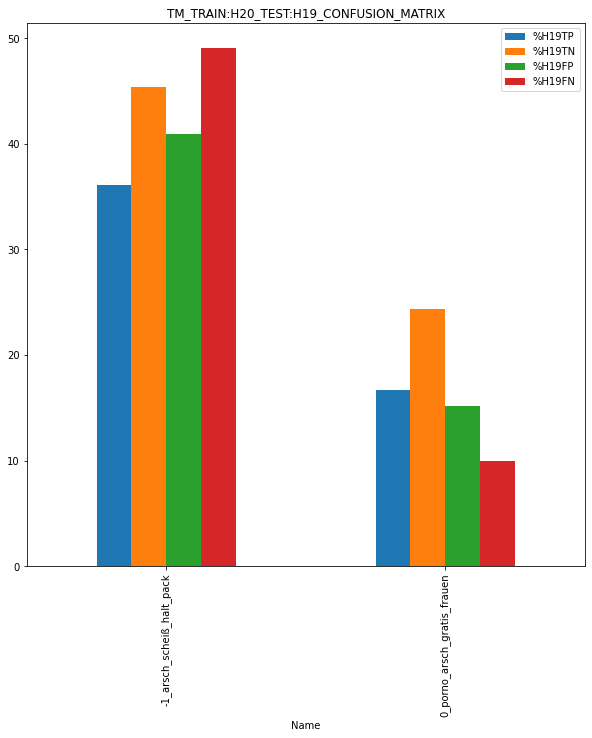

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:H19_CONFUSION_MATRIX")

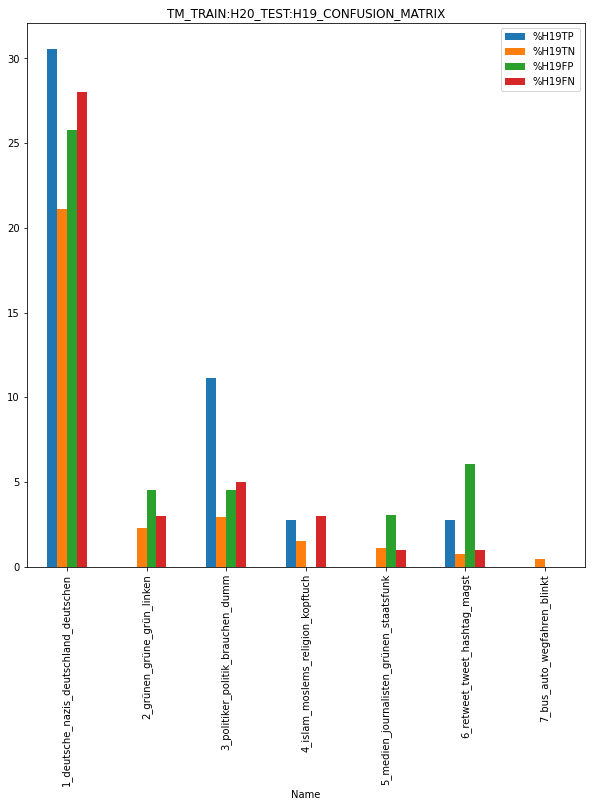

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:H19_CONFUSION_MATRIX")

In [ ]:
#test_h19_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:H20_TEST:H19_CONFUSION_MATRIX")

### Test H2020

In [ ]:
train_h20_class_h20 = pd.read_csv('/content/NSIT_submission_DE_HASOC2020_TASK_A.csv')
train_h20_class_h20

task1
0        1
1        1
2        1
3        1
4        1
..     ...
521      1
522      1
523      1
524      1
525      1

[526 rows x 1 columns]

In [ ]:
train_h20_class_h20['task1'] = train_h20_class_h20['task1'].map({0: 1, 1: 0}).astype(int)
train_h20_class_h20

task1
0        0
1        0
2        0
3        0
4        0
..     ...
521      0
522      0
523      0
524      0
525      0

[526 rows x 1 columns]

In [ ]:
h20_test_class_values = pd.DataFrame(train_h20_class_h20['task1'].value_counts())
h20_test_class_values

task1
0    406
1    120

In [ ]:

h20_test_raw['class'] = train_h20_class_h20['task1']
h20_test_raw

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
0    hasoc_2020_de_1053    -1      0               1                  1  
1     hasoc_2020_de_671     0      0               1                  1  
2    hasoc_2020_de_2977    -1      0               1                  1  
3    hasoc_2020_de_1746    -1      0               1                  1  
4    hasoc_2020_de_2416    -1      0               1                  1  
..                  ...   ...    ...             ...                ...  
521   hasoc_2020_de_486     0      0               1                  1  
522  hasoc_2020_de_3388     2      0               1                  1  
523  hasoc_2020_de_2745     1      0               1                  1  
524   hasoc_2020_de_236     0      0               1                  1  
525  hasoc_2020_de_2850     2      0               1                  1  

[526 rows x 10 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h20_test_true_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 1)]
h20_test_true_pos

Unnamed: 0             tweet_id  \
6             6  1123981478361219073   
22           22  1134444350027509766   
25           25  1131517942175289344   
32           32  1134408971081703424   
33           33  1126172771518746624   
..          ...                  ...   
500         500  1128321203075256320   
508         508  1129379774076473344   
511         511  1130096161212252162   
512         512  1124842568972288000   
517         517  1124379312264708101   

                                                  text task1 task2  \
6    @yooli_derechte @MontanaBlack Mich wundert es ...   HOF  OFFN   
22                 Scheiß. Hurensohn gam @FortniteGame   HOF  PRFN   
25   RT @Symon634: Ich ficke deine enkeltochter du ...   HOF  PRFN   
32   @Saufkumpel_ Ich kann andere als Hurensohn bet...   HOF  PRFN   
33   @ChrisEpunkt Erste ist doh net schlimm und 2. ...   HOF  PRFN   
..                                                 ...   ...   ...   
500                         @VizzionsXI halt dein maul   HOF  OFFN   
508                       Halt die fresse du hurensohn   HOF  PRFN   
511         @noelmgb_ @Sebbe2704 Richtiger Hurensohn 😂   HOF  PRFN   
512  Der Bass ist tief, die Atmosphäre sehr entspan...   HOF  PRFN   
517  RT @theunwantedpath: HABT IHR DEN ARSCH OFFEN ...   HOF  PRFN   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
6    hasoc_2020_de_2938    -1      1               0                  0  
22   hasoc_2020_de_2487     0      1               0                  0  
25   hasoc_2020_de_2382     0      1               0                  0  
32   hasoc_2020_de_2121     0      1               0                  0  
33   hasoc_2020_de_2301    -1      1               0                  0  
..                  ...   ...    ...             ...                ...  
500  hasoc_2020_de_1958     0      1               0                  0  
508  hasoc_2020_de_2465     0      1               0                  0  
511   hasoc_2020_de_958     0      1               0                  0  
512  hasoc_2020_de_2470    -1      1               0                  0  
517   hasoc_2020_de_986    -1      1               0                  0  

[89 rows x 10 columns]

In [ ]:
h20_test_pred_values_true_pos = pd.DataFrame(h20_test_true_pos['pred'].value_counts())
h20_test_pred_values_true_pos['percent'] = (h20_test_pred_values_true_pos['pred'] / h20_test_pred_values_true_pos['pred'].sum()) * 100
h20_test_pred_values_true_pos

pred    percent
 0    50  56.179775
-1    29  32.584270
 1     3   3.370787
 2     3   3.370787
 3     2   2.247191
 6     1   1.123596
 4     1   1.123596

In [ ]:
h20_test_false_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 1)]
h20_test_false_pos

Unnamed: 0             tweet_id  \
13           13  1129845081777889280   
23           23  1131658451371864064   
56           56  1133375347771228160   
58           58  1130207532578934785   
62           62  1124434324785455104   
76           76  1131157307549716480   
78           78  1129741025310892038   
99           99  1127226846221873152   
104         104  1129127889377681410   
107         107  1124749757392531456   
130         130  1126839556781826048   
133         133  1125518724319076352   
154         154  1126918384547971072   
157         157  1127363349870673926   
210         210  1131717423273582592   
216         216  1132333700753055744   
235         235  1131930372294488064   
257         257  1124758682867326977   
270         270  1132258098440224769   
279         279  1123860187457126401   
307         307  1125055937415454721   
317         317  1134424682923470848   
335         335  1126058636097282049   
350         350  1131558585010479104   
366         366  1127309721508220929   
369         369  1127086156678684672   
385         385  1131555326015266817   
406         406  1128403310761926661   
437         437  1130183218190323713   
444         444  1129334869883064320   
509         509  1124686842840981505   

                                                  text task1 task2  \
13   Er hat Pakinson in seiner linken Hand... #ESC2...   NOT  NONE   
23   Was haben Almans fürn Problem mit #gntm? Schau...   NOT  NONE   
56                           Alles nur dumme Kinder...   NOT  NONE   
58   RT @ExGruene: Martin von Mauschwitz möchte den...   NOT  NONE   
62   RT @mozart2018: ? "#Merkel sponsert den Bau" ?...   NOT  NONE   
76   Was in der momentanen Deutschen Politik abgeht...   NOT  NONE   
78   @drumheadberlin Am Unheil in Europa hat Frau M...   NOT  NONE   
99   RT @Buje78: Wir sind abgestiegen. Scheiß egal ...   NOT  NONE   
104  RT @_ragazzi___: Mir sind zu viele Moslems in ...   NOT  NONE   
107  RT @NebelNiek: Der Kopf will schlafen 😴🛏️🌙 abe...   NOT  NONE   
130  @drunkenraindrop Ich hab gefragt ob du dumm bist?   NOT  NONE   
133  RT @KMoneydom: Ab 10 likes wird die dunkle Jea...   NOT  NONE   
154  ich kann einfach nicht mit geld umgehen. ich h...   NOT  NONE   
157  RT @mimini97: @claudia_kade @welt Der Islam is...   NOT  NONE   
210  fetter arsch fickt deutsche gynkologe porno po...   NOT  NONE   
216  RT @chrisJcsgo: @fazeniko @ESLCS Thanks mit de...   NOT  NONE   
235  RT @ser0599: Was Merkel nie sagen würde... #Ma...   NOT  NONE   
257  RT @lukaschenkaver1: @nigromontanus_ Belgien h...   NOT  NONE   
270  RT @Lowl3v3l: @saftmoppel Ich hoffe das klingt...   NOT  NONE   
279  @ZDFheute Und die #Wohnungsbelegung zu regleme...   NOT  NONE   
307      @SawsanChebli Hat dir dein Papi Maas geholfen   NOT  NONE   
317  @Dr_Peter_Quick @bzberlin Dann stellt sich für...   NOT  NONE   
335  @BirnstinglausRo Ich bin für Mehrehe für alle!...   NOT  NONE   
350  Diese Arm/Reich-Schere stimmt auch nicht - was...   NOT  NONE   
366  @blubeIIa das geile is halt du kannst die sche...   NOT  NONE   
369        Merkels größte Lüge https://t.co/cdI7pSCdLL   NOT  NONE   
385  RT @schwultuete: Warum blickt ihr jetzt alle e...   NOT  NONE   
406  4)Und ja man versucht es durchaus mit Dawa,Auf...   NOT  NONE   
437  @Frank_Pasemann @AfD @MDR_SAN @AfDimBundestag ...   NOT  NONE   
444  klar weil Islam gabs schon vor Islam. Dümmer g...   NOT  NONE   
509  Heute nichts neues, keine Lügen, nichts über d...   NOT  NONE   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
13   hasoc_2020_de_1922     0      1               1                  0  
23    hasoc_2020_de_379     0      1               1                  0  
56   hasoc_2020_de_1119     0      1               1                  0  
58   hasoc_2020_de_3087     1      1               1                  0  
62   hasoc_2020_de_2798     1      1               1                  0  
76   hasoc_2020_de_2297     1      1   

In [ ]:
h20_test_pred_values_false_pos = pd.DataFrame(h20_test_false_pos['pred'].value_counts())
h20_test_pred_values_false_pos['percent'] = (h20_test_pred_values_false_pos['pred'] / h20_test_pred_values_false_pos['pred'].sum()) * 100
h20_test_pred_values_false_pos

pred    percent
-1    11  35.483871
 1     9  29.032258
 0     8  25.806452
 4     3   9.677419

In [ ]:
h20_test_true_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 0)]
h20_test_true_neg

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
0    hasoc_2020_de_1053    -1      0               1                  1  
1     hasoc_2020_de_671     0      0               1                  1  
2    hasoc_2020_de_2977    -1      0               1                  1  
3    hasoc_2020_de_1746    -1      0               1                  1  
4    hasoc_2020_de_2416    -1      0               1                  1  
..                  ...   ...    ...             ...                ...  
521   hasoc_2020_de_486     0      0               1                  1  
522  hasoc_2020_de_3388     2      0               1                  1  
523  hasoc_2020_de_2745     1      0               1                  1  
524   hasoc_2020_de_236     0      0               1                  1  
525  hasoc_2020_de_2850     2      0               1                  1  

[334 rows x 10 columns]

In [ ]:
h20_test_pred_values_true_neg = pd.DataFrame(h20_test_true_neg['pred'].value_counts())
h20_test_pred_values_true_neg['percent'] = (h20_test_pred_values_true_neg['pred'] / h20_test_pred_values_true_neg['pred'].sum()) * 100
h20_test_pred_values_true_neg

pred    percent
-1   126  37.724551
 0    96  28.742515
 1    68  20.359281
 2    28   8.383234
 4     9   2.694611
 3     5   1.497006
 5     2   0.598802

In [ ]:
h20_test_false_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 0)]
h20_test_false_neg

Unnamed: 0             tweet_id  \
5             5  1129712298531184641   
17           17  1126089577486323712   
21           21  1134130242786926592   
24           24  1124210944534614016   
35           35  1132234136364769280   
..          ...                  ...   
468         468  1124366339316092928   
476         476  1124278535730937858   
496         496  1131274676741836800   
497         497  1134619244107370496   
498         498  1129818645109116928   

                                                  text task1 task2  \
5    RT @VonSchwer: Ein guter Patriot geht von Bord...   HOF  OFFN   
17   RT @CWBWElias: @TheresaGesperrt Wollte meine N...   HOF  PRFN   
21   @sgepeeti Verdursten ist aber auch ein scheiß ...   HOF  PRFN   
24   @HyperBushido fr ich streu den scheiß überall ...   HOF  PRFN   
35   @IslamiQde Der #Islam gehört nicht zu Deutschl...   HOF  HATE   
..                                                 ...   ...   ...   
468  RT @_Migraene_: Die Muslim-Brüder bald Terrori...   HOF  HATE   
476  RT @lic_ang: Du bezahlst eine 18-Jährige damit...   HOF  OFFN   
496  RT @can65schalke: „Göt“ ist türkisch und heißt...   HOF  PRFN   
497  RT @maxotte_says: #Harvard war mal eine #Elite...   HOF  OFFN   
498  @ChHuegel @ManfredWeber Man kann doch den über...   HOF  HATE   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
5    hasoc_2020_de_1112    -1      0               0                  1  
17   hasoc_2020_de_2545    -1      0               0                  1  
21   hasoc_2020_de_1235     0      0               0                  1  
24   hasoc_2020_de_1691     0      0               0                  1  
35   hasoc_2020_de_1850     1      0               0                  1  
..                  ...   ...    ...             ...                ...  
468  hasoc_2020_de_2425     4      0               0                  1  
476  hasoc_2020_de_1243     0      0               0                  1  
496  hasoc_2020_de_1993     0      0               0                  1  
497  hasoc_2020_de_1606    -1      0               0                  1  
498  hasoc_2020_de_2580     2      0               0                  1  

[72 rows x 10 columns]

In [ ]:
h20_test_pred_values_false_neg = pd.DataFrame(h20_test_false_neg['pred'].value_counts())
h20_test_pred_values_false_neg['percent'] = (h20_test_pred_values_false_neg['pred'] / h20_test_pred_values_false_neg['pred'].sum()) * 100
h20_test_pred_values_false_neg

pred    percent
-1    35  48.611111
 0    22  30.555556
 1     8  11.111111
 2     4   5.555556
 3     2   2.777778
 4     1   1.388889

In [ ]:
h20_test_raw['cat_bin_actual'] = h20_test_raw['task1'].map({'NOT': 0, 'HOF': 1}).astype(int)
h20_test_raw['cat_bin_predicted'] = h20_test_raw['class'].astype(int)


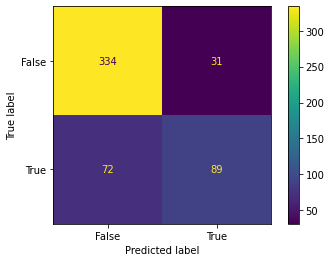

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h20_test_raw['cat_bin_actual']
predicted = h20_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.8041825095057035

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.7416666666666667

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.5527950310559007

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.915068493150685

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.6334519572953736

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.8041825095057035, 'Precision': 0.7416666666666667, 'Sensitivity_recall': 0.5527950310559007, 'Specificity': 0.915068493150685, 'F1_score': 0.6334519572953736}


### TEST H2020 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_h20_model_topics[['Topic','Name']]
df1

Topic                                     Name
0     -1                -1_arsch_scheiß_halt_pack
1      0              0_porno_arsch_gratis_frauen
2      1   1_deutsche_nazis_deutschland_deutschen
3      2               2_grünen_grüne_grün_linken
4      3        3_politiker_politik_brauchen_dumm
5      4        4_islam_moslems_religion_kopftuch
6      5  5_medien_journalisten_grünen_staatsfunk
7      6            6_retweet_tweet_hashtag_magst
8      7              7_bus_auto_wegfahren_blinkt

In [ ]:
h20_test_pred_values_true_pos['Topic'] = h20_test_pred_values_true_pos.index
h20_test_pred_values_true_pos

pred    percent  Topic
 0    50  56.179775      0
-1    29  32.584270     -1
 1     3   3.370787      1
 2     3   3.370787      2
 3     2   2.247191      3
 6     1   1.123596      6
 4     1   1.123596      4

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h20_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH20TP', 'percent':'%H20TP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_pos['Topic'] = h20_test_pred_values_false_pos.index
h20_test_pred_values_false_pos

pred    percent  Topic
-1    11  35.483871     -1
 1     9  29.032258      1
 0     8  25.806452      0
 4     3   9.677419      4

In [ ]:
df3 = h20_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH20FP', 'percent':'%H20FP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_true_neg['Topic'] = h20_test_pred_values_true_neg.index
h20_test_pred_values_true_neg

pred    percent  Topic
-1   126  37.724551     -1
 0    96  28.742515      0
 1    68  20.359281      1
 2    28   8.383234      2
 4     9   2.694611      4
 3     5   1.497006      3
 5     2   0.598802      5

In [ ]:
df4 = h20_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH20TN', 'percent':'%H20TN', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_neg['Topic'] = h20_test_pred_values_false_neg.index
h20_test_pred_values_false_neg

pred    percent  Topic
-1    35  48.611111     -1
 0    22  30.555556      0
 1     8  11.111111      1
 2     4   5.555556      2
 3     2   2.777778      3
 4     1   1.388889      4

In [ ]:
df5 = h20_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH20FN', 'percent':'%H20FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']] = df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H20', '%H20','%H20', '%H20']]
#df_to_round = df_to_round[['%H20', '%H20','%H20', '%H20']].round(2)
#df_to_round

Topic                                     Name predH20TP  %H20TP predH20FP  \
0     -1                -1_arsch_scheiß_halt_pack      29.0   32.58      11.0   
1      0              0_porno_arsch_gratis_frauen      50.0   56.18       8.0   
2      1   1_deutsche_nazis_deutschland_deutschen       3.0    3.37       9.0   
3      2               2_grünen_grüne_grün_linken       3.0    3.37         0   
4      3        3_politiker_politik_brauchen_dumm       2.0    2.25         0   
5      4        4_islam_moslems_religion_kopftuch       1.0    1.12       3.0   
6      5  5_medien_journalisten_grünen_staatsfunk         0    0.00         0   
7      6            6_retweet_tweet_hashtag_magst       1.0    1.12         0   
8      7              7_bus_auto_wegfahren_blinkt         0    0.00         0   

   %H20FP predH20TN  %H20TN predH20FN  %H20FN  
0   35.48     126.0   37.72      35.0   48.61  
1   25.81      96.0   28.74      22.0   30.56  
2   29.03      68.0   20.36       8.0   11.11  
3    0.00      28.0    8.38       4.0    5.56  
4    0.00       5.0    1.50       2.0    2.78  
5    9.68       9.0    2.69       1.0    1.39  
6    0.00       2.0    0.60         0    0.00  
7    0.00         0    0.00         0    0.00  
8    0.00         0    0.00         0    0.00

In [ ]:
df_merged

Topic                                     Name predH20TP  %H20TP predH20FP  \
0     -1                -1_arsch_scheiß_halt_pack      29.0   32.58      11.0   
1      0              0_porno_arsch_gratis_frauen      50.0   56.18       8.0   
2      1   1_deutsche_nazis_deutschland_deutschen       3.0    3.37       9.0   
3      2               2_grünen_grüne_grün_linken       3.0    3.37         0   
4      3        3_politiker_politik_brauchen_dumm       2.0    2.25         0   
5      4        4_islam_moslems_religion_kopftuch       1.0    1.12       3.0   
6      5  5_medien_journalisten_grünen_staatsfunk         0    0.00         0   
7      6            6_retweet_tweet_hashtag_magst       1.0    1.12         0   
8      7              7_bus_auto_wegfahren_blinkt         0    0.00         0   

   %H20FP predH20TN  %H20TN predH20FN  %H20FN  
0   35.48     126.0   37.72      35.0   48.61  
1   25.81      96.0   28.74      22.0   30.56  
2   29.03      68.0   20.36       8.0   11.11  
3    0.00      28.0    8.38       4.0    5.56  
4    0.00       5.0    1.50       2.0    2.78  
5    9.68       9.0    2.69       1.0    1.39  
6    0.00       2.0    0.60         0    0.00  
7    0.00         0    0.00         0    0.00  
8    0.00         0    0.00         0    0.00

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH20TP": int, "predH20TN":int, "predH20FP":int, "predH20FN":int})
df_merged

Topic                                     Name  predH20TP  %H20TP  \
0     -1                -1_arsch_scheiß_halt_pack         29   32.58   
1      0              0_porno_arsch_gratis_frauen         50   56.18   
2      1   1_deutsche_nazis_deutschland_deutschen          3    3.37   
3      2               2_grünen_grüne_grün_linken          3    3.37   
4      3        3_politiker_politik_brauchen_dumm          2    2.25   
5      4        4_islam_moslems_religion_kopftuch          1    1.12   
6      5  5_medien_journalisten_grünen_staatsfunk          0    0.00   
7      6            6_retweet_tweet_hashtag_magst          1    1.12   
8      7              7_bus_auto_wegfahren_blinkt          0    0.00   

   predH20FP  %H20FP  predH20TN  %H20TN  predH20FN  %H20FN  
0         11   35.48        126   37.72         35   48.61  
1          8   25.81         96   28.74         22   30.56  
2          9   29.03         68   20.36          8   11.11  
3          0    0.00         28    8.38          4    5.56  
4          0    0.00          5    1.50          2    2.78  
5          3    9.68          9    2.69          1    1.39  
6          0    0.00          2    0.60          0    0.00  
7          0    0.00          0    0.00          0    0.00  
8          0    0.00          0    0.00          0    0.00

In [ ]:
df_percent = df_merged[['Topic','%H20TP', '%H20TN','%H20FP', '%H20FN','Name']]
df_percent

Topic  %H20TP  %H20TN  %H20FP  %H20FN  \
0     -1   32.58   37.72   35.48   48.61   
1      0   56.18   28.74   25.81   30.56   
2      1    3.37   20.36   29.03   11.11   
3      2    3.37    8.38    0.00    5.56   
4      3    2.25    1.50    0.00    2.78   
5      4    1.12    2.69    9.68    1.39   
6      5    0.00    0.60    0.00    0.00   
7      6    1.12    0.00    0.00    0.00   
8      7    0.00    0.00    0.00    0.00   

                                      Name  
0                -1_arsch_scheiß_halt_pack  
1              0_porno_arsch_gratis_frauen  
2   1_deutsche_nazis_deutschland_deutschen  
3               2_grünen_grüne_grün_linken  
4        3_politiker_politik_brauchen_dumm  
5        4_islam_moslems_religion_kopftuch  
6  5_medien_journalisten_grünen_staatsfunk  
7            6_retweet_tweet_hashtag_magst  
8              7_bus_auto_wegfahren_blinkt

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

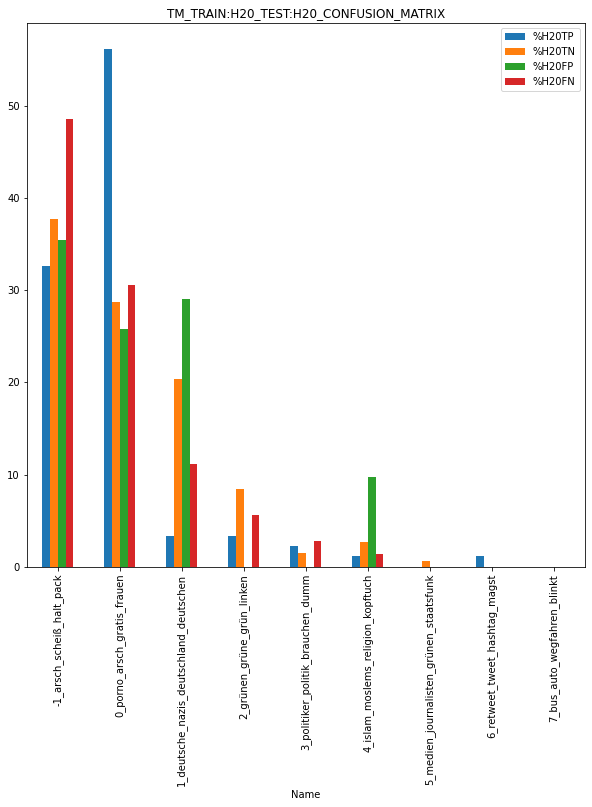

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX.plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:H20_CONFUSION_MATRIX")

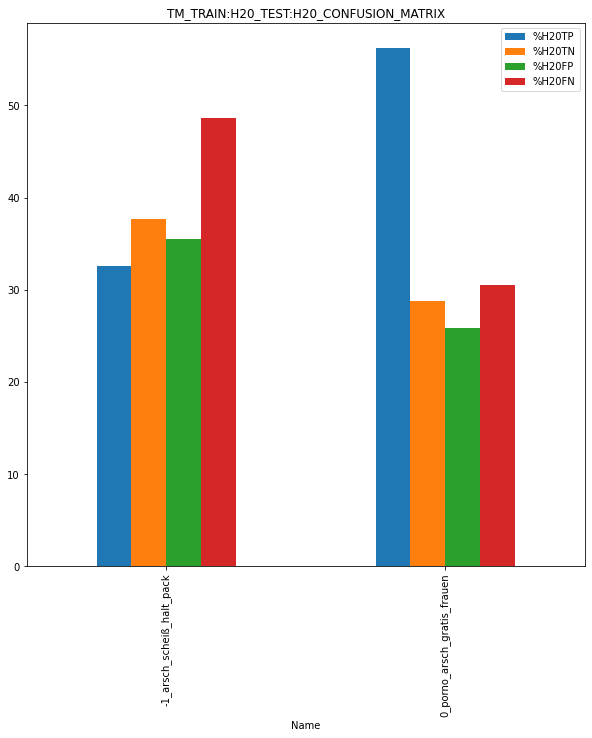

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:H20_CONFUSION_MATRIX")

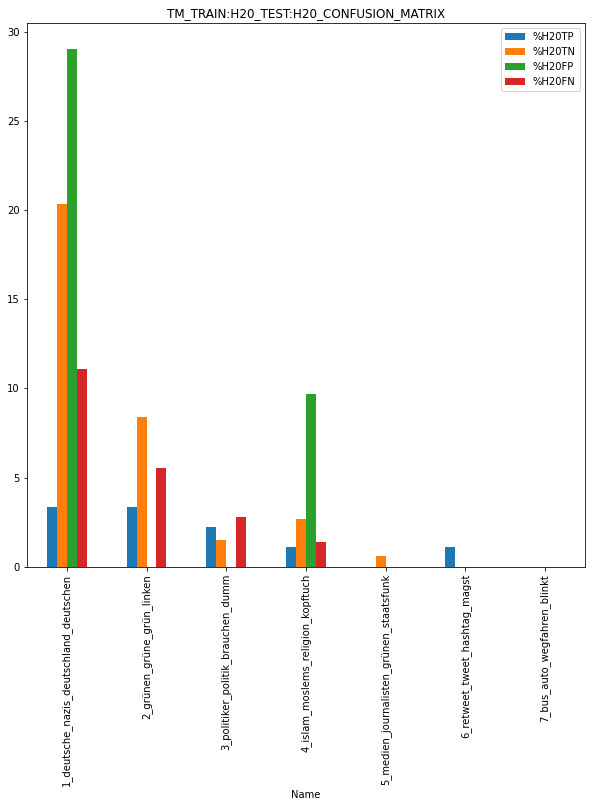

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:H20_TEST:H20_CONFUSION_MATRIX")

In [ ]:
#test_h20_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:H20_TEST:H20_CONFUSION_MATRIX")